In [1]:
import numpy as np
import pandas as pd
import keras

Using TensorFlow backend.


# Importing Data

In [2]:
BBB_Train = pd.read_csv("BBB_Train.csv", index_col=0)
DDD_Train = pd.read_csv("DDD_Train.csv", index_col=0)
FFF_Train = pd.read_csv("FFF_Train.csv", index_col=0)


C:\Users\Chris\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:463: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


# Transforming Data

#### Sort rows of dataframe based on id and date

In [3]:
BBB_Train.head(n=10)

,code_module,code_presentation,id_student,identifier,date,sum_click,asgmts,csum_asgmts,Avg_score,final_result
31138,BBB,2013B,23629,BBB 2013B 23629,-23,0,0,0,0.0,Fail
31139,BBB,2013B,23629,BBB 2013B 23629,-22,0,0,0,0.0,Fail
31140,BBB,2013B,23629,BBB 2013B 23629,-21,0,0,0,0.0,Fail
31141,BBB,2013B,23629,BBB 2013B 23629,-20,0,0,0,0.0,Fail
31142,BBB,2013B,23629,BBB 2013B 23629,-19,0,0,0,0.0,Fail
31143,BBB,2013B,23629,BBB 2013B 23629,-18,0,0,0,0.0,Fail
31144,BBB,2013B,23629,BBB 2013B 23629,-17,0,0,0,0.0,Fail
31145,BBB,2013B,23629,BBB 2013B 23629,-16,0,0,0,0.0,Fail
31146,BBB,2013B,23629,BBB 2013B 23629,-15,0,0,0,0.0,Fail
31147,BBB,2013B,23629,BBB 2013B 23629,-14,0,0,0,0.0,Fail


In [4]:
BBB_Train = BBB_Train.drop(["csum_asgmts"], axis = 1)
DDD_Train = DDD_Train.drop(["csum_asgmts"], axis = 1)
FFF_Train = FFF_Train.drop(["csum_asgmts"], axis = 1)


In [5]:
BBB_Test = BBB_Train[BBB_Train["code_presentation"] == "2014J"]
DDD_Test = DDD_Train[DDD_Train["code_presentation"] == "2014J"]
FFF_Test = FFF_Train[FFF_Train["code_presentation"] == "2014J"]

BBB_Train = BBB_Train[BBB_Train["code_presentation"] != "2014J"]
DDD_Train = DDD_Train[DDD_Train["code_presentation"] != "2014J"]
FFF_Train = FFF_Train[FFF_Train["code_presentation"] != "2014J"]

In [6]:
BBB_Train = BBB_Train.sort_values(by = ['identifier','date'])
DDD_Train = DDD_Train.sort_values(by = ['identifier','date'])
FFF_Train = FFF_Train.sort_values(by = ['identifier','date'])

BBB_Test = BBB_Test.sort_values(by = ['identifier','date'])
DDD_Test = DDD_Test.sort_values(by = ['identifier','date'])
FFF_Test = FFF_Test.sort_values(by = ['identifier','date'])

In [7]:
BBB_Train.head()

,code_module,code_presentation,id_student,identifier,date,sum_click,asgmts,Avg_score,final_result
1,BBB,2013B,1008675,BBB 2013B 1008675,-23,0,0,0.0,Pass
2,BBB,2013B,1008675,BBB 2013B 1008675,-22,0,0,0.0,Pass
3,BBB,2013B,1008675,BBB 2013B 1008675,-21,0,0,0.0,Pass
4,BBB,2013B,1008675,BBB 2013B 1008675,-20,0,0,0.0,Pass
5,BBB,2013B,1008675,BBB 2013B 1008675,-19,0,0,0.0,Pass


In [8]:
BBB_Train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1122969 entries, 1 to 1122969
Data columns (total 9 columns):
code_module          1122969 non-null object
code_presentation    1122969 non-null object
id_student           1122969 non-null int64
identifier           1122969 non-null object
date                 1122969 non-null int64
sum_click            1122969 non-null int64
asgmts               1122969 non-null int64
Avg_score            1122969 non-null float64
final_result         1122969 non-null object
dtypes: float64(1), int64(4), object(4)
memory usage: 85.7+ MB


In [9]:
BBB_LSTM_Train = BBB_Train.loc[:,["code_presentation","identifier","date","sum_click", "asgmts", "Avg_score", "final_result"]]
BBB_LSTM_Test = BBB_Test.loc[:,["code_presentation","identifier","date","sum_click", "asgmts", "Avg_score", "final_result"]]

DDD_LSTM_Train = DDD_Train.loc[:,["code_presentation","identifier","date","sum_click", "asgmts", "Avg_score", "final_result"]]
DDD_LSTM_Test = DDD_Test.loc[:,["code_presentation","identifier","date","sum_click", "asgmts", "Avg_score", "final_result"]]

FFF_LSTM_Train = FFF_Train.loc[:,["code_presentation","identifier","date","sum_click", "asgmts", "Avg_score", "final_result"]]
FFF_LSTM_Test = FFF_Test.loc[:,["code_presentation","identifier","date","sum_click", "asgmts", "Avg_score", "final_result"]]

In [10]:
BBB_LSTM_Train.head()

,code_presentation,identifier,date,sum_click,asgmts,Avg_score,final_result
1,2013B,BBB 2013B 1008675,-23,0,0,0.0,Pass
2,2013B,BBB 2013B 1008675,-22,0,0,0.0,Pass
3,2013B,BBB 2013B 1008675,-21,0,0,0.0,Pass
4,2013B,BBB 2013B 1008675,-20,0,0,0.0,Pass
5,2013B,BBB 2013B 1008675,-19,0,0,0.0,Pass


In [11]:
BBB_LSTM_Train.shape

(1122969, 7)

In [12]:
BBB_LSTM_Train.loc[:,["sum_click","asgmts","Avg_score"]][BBB_LSTM_Train["sum_click"]!=-1].shape

(1047040, 3)

#### Calculate percentile-groups based on a student's average daily clicks in a certain decile each semester
Necessary to alleviate effects from structural changes between semesters

In [13]:
BBB_LSTM_Train["Rank_Clicks"] = 0
DDD_LSTM_Train["Rank_Clicks"] = 0
FFF_LSTM_Train["Rank_Clicks"] = 0

BBB_LSTM_Test["Rank_Clicks"] = 0
DDD_LSTM_Test["Rank_Clicks"] = 0
FFF_LSTM_Test["Rank_Clicks"] = 0

BBB_LSTM_Train["Rank_Clicks"][BBB_LSTM_Train.sum_click == -1] = -1
DDD_LSTM_Train["Rank_Clicks"][DDD_LSTM_Train.sum_click == -1] = -1
FFF_LSTM_Train["Rank_Clicks"][FFF_LSTM_Train.sum_click == -1] = -1

BBB_LSTM_Test["Rank_Clicks"][BBB_LSTM_Test.sum_click == -1] = -1
DDD_LSTM_Test["Rank_Clicks"][DDD_LSTM_Test.sum_click == -1] = -1
FFF_LSTM_Test["Rank_Clicks"][FFF_LSTM_Test.sum_click == -1] = -1

C:\Users\Chris\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\Chris\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Chris\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Ch

In [14]:
Semesters_Train = BBB_LSTM_Train.code_presentation.unique()
dfs_Train = list([BBB_LSTM_Train, DDD_LSTM_Train, FFF_LSTM_Train])
Semesters_Test = BBB_LSTM_Test.code_presentation.unique()
dfs_Test = list([BBB_LSTM_Test, DDD_LSTM_Test, FFF_LSTM_Test])

In [15]:
Percentiles = [0.05, 0.1, 0.15, 0.20, 0.25, 0.30, 0.35, 0.40,0.45,0.50,0.55,0.60,0.65,0.70,0.75,0.80, 0.85,0.90,0.95,1]

In [16]:
percentile_limit = [0]

In [17]:
for i in range(0,len(dfs_Train)):
    for j in range(0,len(Semesters_Train)):
        for d in dfs_Train[i]["date"].unique():
            for p in range(0,len(Percentiles)):
                Rowclicks = dfs_Train[i]["sum_click"][dfs_Train[i].sum_click!=-1][dfs_Train[i].date == d][dfs_Train[i].code_presentation == Semesters_Train[j]][dfs_Train[i].sum_click>0]
                
                if Rowclicks.empty == False:
                    percentile_limit.append(np.percentile(Rowclicks,Percentiles[p]*100))
                    
                    dfs_Train[i]["Rank_Clicks"][(dfs_Train[i].sum_click != -1) &
                                                (dfs_Train[i].code_presentation == Semesters_Train[j]) &
                                                (dfs_Train[i].date == d) &
                                                (dfs_Train[i]["sum_click"] > percentile_limit[p]) &
                                                (dfs_Train[i]["sum_click"] <= percentile_limit[p+1])] = Percentiles[p]
                    
        print("Presentation " + str(j+1) + " out of "+ str(3) + " of course " + str(i+1))


C:\Users\Chris\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Presentation 1 out of 3 of course 1
Presentation 2 out of 3 of course 1
Presentation 3 out of 3 of course 1


C:\Users\Chris\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Presentation 1 out of 3 of course 2
Presentation 2 out of 3 of course 2
Presentation 3 out of 3 of course 2


C:\Users\Chris\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Presentation 1 out of 3 of course 3
Presentation 2 out of 3 of course 3
Presentation 3 out of 3 of course 3


In [18]:
for i in range(0,len(dfs_Test)):
    for j in range(0,len(Semesters_Test)):
        for d in dfs_Test[i]["date"].unique():
            for p in range(0,len(Percentiles)):
                Rowclicks = dfs_Test[i]["sum_click"][dfs_Test[i].sum_click!=-1][dfs_Test[i].date == d][dfs_Test[i].code_presentation == Semesters_Test[j]][dfs_Test[i].sum_click>0]
                
                if Rowclicks.empty == False:
                    percentile_limit.append(np.percentile(Rowclicks,Percentiles[p]*100))
                    
                    dfs_Test[i]["Rank_Clicks"][(dfs_Test[i].sum_click != -1) &
                                               (dfs_Test[i].code_presentation == Semesters_Test[j]) & 
                                               (dfs_Test[i].date == d) &
                                               (dfs_Test[i]["sum_click"] > percentile_limit[p]) &
                                               (dfs_Test[i]["sum_click"] <= percentile_limit[p+1])] = Percentiles[p]
                    
                    
        print("Presentation " + str(j+1) + " out of "+ str(1) + " of course " + str(i+1))

C:\Users\Chris\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Presentation 1 out of 4 of course 1


C:\Users\Chris\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Presentation 1 out of 4 of course 2


C:\Users\Chris\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Presentation 1 out of 4 of course 3


In [23]:
BBB_LSTM_Train["sum_click"] = BBB_LSTM_Train["Rank_Clicks"]
DDD_LSTM_Train["sum_click"] = DDD_LSTM_Train["Rank_Clicks"]
FFF_LSTM_Train["sum_click"] = FFF_LSTM_Train["Rank_Clicks"]

BBB_LSTM_Test["sum_click"] = BBB_LSTM_Test["Rank_Clicks"]
DDD_LSTM_Test["sum_click"] = DDD_LSTM_Test["Rank_Clicks"]
FFF_LSTM_Test["sum_click"] = FFF_LSTM_Test["Rank_Clicks"]

BBB_LSTM_Train = BBB_LSTM_Train.drop('Rank_Clicks',1)
DDD_LSTM_Train = DDD_LSTM_Train.drop('Rank_Clicks',1)
FFF_LSTM_Train = FFF_LSTM_Train.drop('Rank_Clicks',1)

BBB_LSTM_Test = BBB_LSTM_Test.drop('Rank_Clicks',1)
DDD_LSTM_Test = DDD_LSTM_Test.drop('Rank_Clicks',1)
FFF_LSTM_Test = FFF_LSTM_Test.drop('Rank_Clicks',1)

In [24]:
BBB_LSTM_Train.head(n=100)

,code_presentation,identifier,date,sum_click,asgmts,Avg_score,final_result
1,2013B,BBB 2013B 1008675,-23,0.00,0,0.00,Pass
2,2013B,BBB 2013B 1008675,-22,0.00,0,0.00,Pass
3,2013B,BBB 2013B 1008675,-21,0.00,0,0.00,Pass
4,2013B,BBB 2013B 1008675,-20,0.00,0,0.00,Pass
5,2013B,BBB 2013B 1008675,-19,0.00,0,0.00,Pass
6,2013B,BBB 2013B 1008675,-18,0.00,0,0.00,Pass
7,2013B,BBB 2013B 1008675,-17,0.00,0,0.00,Pass
8,2013B,BBB 2013B 1008675,-16,0.00,0,0.00,Pass
9,2013B,BBB 2013B 1008675,-15,0.00,0,0.00,Pass
10,2013B,BBB 2013B 1008675,-14,0.00,0,0.00,Pass


In [25]:
Semesters_Train = BBB_LSTM_Train.code_presentation.unique()
dfs_Train = list([BBB_LSTM_Train, DDD_LSTM_Train, FFF_LSTM_Train])
Semesters_Test = BBB_LSTM_Test.code_presentation.unique()
dfs_Test = list([BBB_LSTM_Test, DDD_LSTM_Test, FFF_LSTM_Test])

In [26]:
from sklearn.preprocessing import MinMaxScaler

In [27]:
scaler = MinMaxScaler(feature_range=(0,1))

for i in range(0,len(dfs_Train)):
    for j in range(0,len(Semesters_Train)):
        scaler.fit(dfs_Train[i].loc[(dfs_Train[i]["code_presentation"]==Semesters_Train[j]) & (dfs_Train[i]["asgmts"]!=-1), ["asgmts","Avg_score"]])
        dfs_Train[i].loc[(dfs_Train[i]["code_presentation"]==Semesters_Train[j]) & (dfs_Train[i]["asgmts"]!=-1), ["asgmts","Avg_score"]] = scaler.transform(dfs_Train[i].loc[(dfs_Train[i]["code_presentation"]==Semesters_Train[j]) & (dfs_Train[i]["asgmts"]!=-1), ["asgmts","Avg_score"]])


for i in range(0,len(dfs_Test)):
    for j in range(0,len(Semesters_Test)):
        scaler.fit(dfs_Test[i].loc[(dfs_Test[i]["code_presentation"]==Semesters_Test[j])  & (dfs_Test[i]["asgmts"]!=-1), ["asgmts","Avg_score"]])
        dfs_Test[i].loc[(dfs_Test[i]["code_presentation"]==Semesters_Test[j]) & (dfs_Test[i]["asgmts"]!=-1), ["asgmts","Avg_score"]] = scaler.transform(dfs_Test[i].loc[(dfs_Test[i]["code_presentation"]==Semesters_Test[j])  & (dfs_Test[i]["asgmts"]!=-1), ["asgmts","Avg_score"]])

In [28]:
BBB_Train.head(n=100)

,code_module,code_presentation,id_student,identifier,date,sum_click,asgmts,Avg_score,final_result
1,BBB,2013B,1008675,BBB 2013B 1008675,-23,0,0,0.00,Pass
2,BBB,2013B,1008675,BBB 2013B 1008675,-22,0,0,0.00,Pass
3,BBB,2013B,1008675,BBB 2013B 1008675,-21,0,0,0.00,Pass
4,BBB,2013B,1008675,BBB 2013B 1008675,-20,0,0,0.00,Pass
5,BBB,2013B,1008675,BBB 2013B 1008675,-19,0,0,0.00,Pass
6,BBB,2013B,1008675,BBB 2013B 1008675,-18,0,0,0.00,Pass
7,BBB,2013B,1008675,BBB 2013B 1008675,-17,0,0,0.00,Pass
8,BBB,2013B,1008675,BBB 2013B 1008675,-16,0,0,0.00,Pass
9,BBB,2013B,1008675,BBB 2013B 1008675,-15,0,0,0.00,Pass
10,BBB,2013B,1008675,BBB 2013B 1008675,-14,0,0,0.00,Pass


In [34]:
#BBB_LSTM_Train.to_csv("Normalized_BBB_Train.csv")
#DDD_LSTM_Train.to_csv("Normalized_DDD_Train.csv")
#FFF_LSTM_Train.to_csv("Normalized_FFF_Train.csv")

#BBB_LSTM_Test.to_csv("Normalized_BBB_Test.csv")
#DDD_LSTM_Test.to_csv("Normalized_DDD_Test.csv")
#FFF_LSTM_Test.to_csv("Normalized_FFF_Test.csv")

In [13]:
BBB_LSTM_Train = pd.read_csv("Normalized_BBB_Train.csv", index_col=0)
DDD_LSTM_Train = pd.read_csv("Normalized_DDD_Train.csv", index_col=0)
FFF_LSTM_Train = pd.read_csv("Normalized_FFF_Train.csv", index_col=0)

BBB_LSTM_Test = pd.read_csv("Normalized_BBB_Test.csv", index_col=0)
DDD_LSTM_Test = pd.read_csv("Normalized_DDD_Test.csv", index_col=0)
FFF_LSTM_Test = pd.read_csv("Normalized_FFF_Test.csv", index_col=0)

C:\Users\Chris\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:463: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


#### Normalize variables that are not -1 (-1 is padding)

In [14]:
BBB_LSTM_Train.shape

(1122969, 7)

In [15]:
BBB_LSTM_Train.head(n=100)

,code_presentation,identifier,date,sum_click,asgmts,Avg_score,final_result
1,2013B,BBB 2013B 1008675,-23,0.00,0.000000,0.0000,Pass
2,2013B,BBB 2013B 1008675,-22,0.00,0.000000,0.0000,Pass
3,2013B,BBB 2013B 1008675,-21,0.00,0.000000,0.0000,Pass
4,2013B,BBB 2013B 1008675,-20,0.00,0.000000,0.0000,Pass
5,2013B,BBB 2013B 1008675,-19,0.00,0.000000,0.0000,Pass
6,2013B,BBB 2013B 1008675,-18,0.00,0.000000,0.0000,Pass
7,2013B,BBB 2013B 1008675,-17,0.00,0.000000,0.0000,Pass
8,2013B,BBB 2013B 1008675,-16,0.00,0.000000,0.0000,Pass
9,2013B,BBB 2013B 1008675,-15,0.00,0.000000,0.0000,Pass
10,2013B,BBB 2013B 1008675,-14,0.00,0.000000,0.0000,Pass


In [16]:
BBB_AUX_Train = pd.concat((BBB_Train.loc[:,"identifier"],BBB_Train.loc[:,"final_result"]), axis = 1)
BBB_AUX_Test = pd.concat((BBB_Test.loc[:,"identifier"],BBB_Test.loc[:,"final_result"]), axis = 1)

DDD_AUX_Train = pd.concat((DDD_Train.loc[:,"identifier"],DDD_Train.loc[:,"final_result"]), axis = 1)
DDD_AUX_Test = pd.concat((DDD_Test.loc[:,"identifier"],DDD_Test.loc[:,"final_result"]), axis = 1)

FFF_AUX_Train = pd.concat((FFF_Train.loc[:,"identifier"],FFF_Train.loc[:,"final_result"]), axis = 1)
FFF_AUX_Test = pd.concat((FFF_Test.loc[:,"identifier"],FFF_Test.loc[:,"final_result"]), axis = 1)

In [17]:
BBB_AUX_Train = BBB_AUX_Train.drop_duplicates()
BBB_AUX_Test = BBB_AUX_Test.drop_duplicates()

DDD_AUX_Train = DDD_AUX_Train.drop_duplicates()
DDD_AUX_Test = DDD_AUX_Test.drop_duplicates()

FFF_AUX_Train = FFF_AUX_Train.drop_duplicates()
FFF_AUX_Test = FFF_AUX_Test.drop_duplicates()

In [18]:
FFF_AUX_Train.shape

(3819, 2)

In [19]:
BBB_AUX_Train

,identifier,final_result
1,BBB 2013B 1008675,Pass
292,BBB 2013B 104054,Distinction
583,BBB 2013B 108377,Pass
874,BBB 2013B 108589,Pass
1165,BBB 2013B 1098728,Fail
1456,BBB 2013B 109938,Distinction
1747,BBB 2013B 110881,Pass
2038,BBB 2013B 116603,Distinction
2329,BBB 2013B 117071,Fail
2620,BBB 2013B 120994,Fail


In [20]:
BBB_LSTM_Train_List = BBB_LSTM_Train['identifier'].unique().tolist()
BBB_LSTM_Test_List = BBB_LSTM_Test['identifier'].unique().tolist()

DDD_LSTM_Train_List = DDD_LSTM_Train['identifier'].unique().tolist()
DDD_LSTM_Test_List = DDD_LSTM_Test['identifier'].unique().tolist()

FFF_LSTM_Train_List = FFF_LSTM_Train['identifier'].unique().tolist()
FFF_LSTM_Test_List = FFF_LSTM_Test['identifier'].unique().tolist()

In [21]:
BBB_LSTM_Train_3D = np.asarray(list(BBB_LSTM_Train.groupby('identifier').apply(pd.DataFrame.as_matrix))) 
BBB_LSTM_Test_3D = np.asarray(list(BBB_LSTM_Test.groupby('identifier').apply(pd.DataFrame.as_matrix)))

DDD_LSTM_Train_3D = np.asarray(list(DDD_LSTM_Train.groupby('identifier').apply(pd.DataFrame.as_matrix))) 
DDD_LSTM_Test_3D = np.asarray(list(DDD_LSTM_Test.groupby('identifier').apply(pd.DataFrame.as_matrix)))

FFF_LSTM_Train_3D = np.asarray(list(FFF_LSTM_Train.groupby('identifier').apply(pd.DataFrame.as_matrix))) 
FFF_LSTM_Test_3D = np.asarray(list(FFF_LSTM_Test.groupby('identifier').apply(pd.DataFrame.as_matrix)))

In [22]:
BBB_LSTM_Train_3D

array([[['2013B', 'BBB 2013B 1008675', -23, ..., 0.0, 0.0, 'Pass'],
        ['2013B', 'BBB 2013B 1008675', -22, ..., 0.0, 0.0, 'Pass'],
        ['2013B', 'BBB 2013B 1008675', -21, ..., 0.0, 0.0, 'Pass'],
        ..., 
        ['2013B', 'BBB 2013B 1008675', 265, ..., -1.0, -1.0, 'Pass'],
        ['2013B', 'BBB 2013B 1008675', 266, ..., -1.0, -1.0, 'Pass'],
        ['2013B', 'BBB 2013B 1008675', 267, ..., -1.0, -1.0, 'Pass']],

       [['2013B', 'BBB 2013B 104054', -23, ..., -1.0, -1.0, 'Distinction'],
        ['2013B', 'BBB 2013B 104054', -22, ..., -1.0, -1.0, 'Distinction'],
        ['2013B', 'BBB 2013B 104054', -21, ..., -1.0, -1.0, 'Distinction'],
        ..., 
        ['2013B', 'BBB 2013B 104054', 265, ..., -1.0, -1.0, 'Distinction'],
        ['2013B', 'BBB 2013B 104054', 266, ..., -1.0, -1.0, 'Distinction'],
        ['2013B', 'BBB 2013B 104054', 267, ..., -1.0, -1.0, 'Distinction']],

       [['2013B', 'BBB 2013B 108377', -23, ..., 0.0, 0.0, 'Pass'],
        ['2013B', 'BBB 2013B 10

In [23]:
BBB_Train_3D = np.delete(BBB_LSTM_Train_3D,[0,1,2,6],axis=2)
BBB_Test_3D = np.delete(BBB_LSTM_Test_3D,[0,1,2,6],axis=2)

DDD_Train_3D = np.delete(DDD_LSTM_Train_3D,[0,1,2,6],axis=2)
DDD_Test_3D = np.delete(DDD_LSTM_Test_3D,[0,1,2,6],axis=2)

FFF_Train_3D = np.delete(FFF_LSTM_Train_3D,[0,1,2,6],axis=2)
FFF_Test_3D = np.delete(FFF_LSTM_Test_3D,[0,1,2,6],axis=2)

In [24]:
BBB_Train_3D

array([[[0.0, 0.0, 0.0],
        [0.0, 0.0, 0.0],
        [0.0, 0.0, 0.0],
        ..., 
        [-1.0, -1.0, -1.0],
        [-1.0, -1.0, -1.0],
        [-1.0, -1.0, -1.0]],

       [[-1.0, -1.0, -1.0],
        [-1.0, -1.0, -1.0],
        [-1.0, -1.0, -1.0],
        ..., 
        [-1.0, -1.0, -1.0],
        [-1.0, -1.0, -1.0],
        [-1.0, -1.0, -1.0]],

       [[0.0, 0.0, 0.0],
        [0.0, 0.0, 0.0],
        [0.0, 0.0, 0.0],
        ..., 
        [-1.0, -1.0, -1.0],
        [-1.0, -1.0, -1.0],
        [-1.0, -1.0, -1.0]],

       ..., 
       [[0.0, 0.0, 0.0],
        [0.0, 0.0, 0.0],
        [0.0, 0.0, 0.0],
        ..., 
        [-1.0, -1.0, -1.0],
        [-1.0, -1.0, -1.0],
        [-1.0, -1.0, -1.0]],

       [[0.0, 0.0, 0.0],
        [0.0, 0.0, 0.0],
        [0.0, 0.0, 0.0],
        ..., 
        [-1.0, -1.0, -1.0],
        [-1.0, -1.0, -1.0],
        [-1.0, -1.0, -1.0]],

       [[0.0, 0.0, 0.0],
        [0.0, 0.0, 0.0],
        [0.0, 0.0, 0.0],
        ..., 
        [-1.0,

In [25]:
BBB_Train_Targets = BBB_AUX_Train.iloc[:,-1]
DDD_Train_Targets = DDD_AUX_Train.iloc[:,-1]
FFF_Train_Targets = FFF_AUX_Train.iloc[:,-1]

BBB_Test_Targets = BBB_AUX_Test.iloc[:,-1]
DDD_Test_Targets = DDD_AUX_Test.iloc[:,-1]
FFF_Test_Targets = FFF_AUX_Test.iloc[:,-1]

In [26]:
BBB_AUX_Train = BBB_AUX_Train.iloc[:,1:30]
DDD_AUX_Train = DDD_AUX_Train.iloc[:,1:30]
FFF_AUX_Train = FFF_AUX_Train.iloc[:,1:30]

BBB_AUX_Test = BBB_AUX_Test.iloc[:,1:30]
DDD_AUX_Test = DDD_AUX_Test.iloc[:,1:30]
FFF_AUX_Test = FFF_AUX_Test.iloc[:,1:30]

In [27]:
DDD_Train_Targets

1565581           Fail
1565868    Distinction
1566155           Pass
1566442           Pass
1566729           Pass
1567016           Fail
1567303           Fail
1567590           Fail
1567877           Pass
1568164           Fail
1568451           Fail
1568738           Fail
1569025           Fail
1569312           Fail
1569599           Pass
1569886           Pass
1570173    Distinction
1570460           Pass
1570747           Fail
1571034           Pass
1571321           Pass
1571608           Pass
1571895           Fail
1572182           Fail
1572469           Pass
1572756           Pass
1573043           Fail
1573330           Fail
1573617           Fail
1573904           Fail
              ...     
2369468           Pass
2369755           Pass
2370042           Fail
2370329           Pass
2370616    Distinction
2370903           Fail
2371190           Pass
2371477           Pass
2371764           Pass
2372051    Distinction
2372338           Pass
2372625    Distinction
2372912    

#### Number of students in the courses across all 4 semesters

#### Convert dataframes into 2D arrays

#### Normalize variables

#### Reshape 2D arrays to 3D arrays
Format : samples (students), timesteps (deciles), features (clicks & assignments)

### Exclude timestep(s) in sequences to be able to build the models for multiple points in time

In [28]:
BBB_Train_Targets_1D = np.array(BBB_Train_Targets)
DDD_Train_Targets_1D = np.array(DDD_Train_Targets)
FFF_Train_Targets_1D = np.array(FFF_Train_Targets)

BBB_Test_Targets_1D = np.array(BBB_Test_Targets)
DDD_Test_Targets_1D = np.array(DDD_Test_Targets)
FFF_Test_Targets_1D = np.array(FFF_Test_Targets)


In [29]:
BBB_Train_Targets_1D[BBB_Train_Targets_1D == "Fail"] = 0
BBB_Train_Targets_1D[BBB_Train_Targets_1D == "Pass"] = 1
BBB_Train_Targets_1D[BBB_Train_Targets_1D == "Distinction"] = 1

DDD_Train_Targets_1D[DDD_Train_Targets_1D == "Fail"] = 0
DDD_Train_Targets_1D[DDD_Train_Targets_1D == "Pass"] = 1
DDD_Train_Targets_1D[DDD_Train_Targets_1D == "Distinction"] = 1

FFF_Train_Targets_1D[FFF_Train_Targets_1D == "Fail"] = 0
FFF_Train_Targets_1D[FFF_Train_Targets_1D == "Pass"] = 1
FFF_Train_Targets_1D[FFF_Train_Targets_1D == "Distinction"] = 1

BBB_Test_Targets_1D[BBB_Test_Targets_1D == "Fail"] = 0
BBB_Test_Targets_1D[BBB_Test_Targets_1D == "Pass"] = 1
BBB_Test_Targets_1D[BBB_Test_Targets_1D == "Distinction"] = 1

DDD_Test_Targets_1D[DDD_Test_Targets_1D == "Fail"] = 0
DDD_Test_Targets_1D[DDD_Test_Targets_1D == "Pass"] = 1
DDD_Test_Targets_1D[DDD_Test_Targets_1D == "Distinction"] = 1

FFF_Test_Targets_1D[FFF_Test_Targets_1D == "Fail"] = 0
FFF_Test_Targets_1D[FFF_Test_Targets_1D == "Pass"] = 1
FFF_Test_Targets_1D[FFF_Test_Targets_1D == "Distinction"] = 1

In [30]:
BBB_Train_Targets_1D = BBB_Train_Targets_1D.astype('int64')
DDD_Train_Targets_1D = DDD_Train_Targets_1D.astype('int64')
FFF_Train_Targets_1D = FFF_Train_Targets_1D.astype('int64')

BBB_Test_Targets_1D = BBB_Test_Targets_1D.astype('int64')
DDD_Test_Targets_1D = DDD_Test_Targets_1D.astype('int64')
FFF_Test_Targets_1D = FFF_Test_Targets_1D.astype('int64')

In [31]:
print(FFF_Train_Targets_1D.shape)

(3819,)


In [32]:
print(FFF_Train_3D.shape)

(3819, 259, 3)


In [33]:
print(FFF_AUX_Train.shape)

(3819, 1)


#### Exclude timestep(s) in sequences to be able to build the models for multiple points in time

In [34]:
Precourse_days_BBB = abs(BBB_Train["date"].min())
Precourse_days_DDD = abs(DDD_Train["date"].min())
Precourse_days_FFF = abs(FFF_Train["date"].min())

cut_off_BBB = int(round((BBB_Train_3D.shape[1] - Precourse_days_BBB)/10))
cut_off_DDD = int(round((DDD_Train_3D.shape[1] - Precourse_days_DDD)/10))
cut_off_FFF = int(round((FFF_Train_3D.shape[1] - Precourse_days_FFF)/10))

In [35]:
BBB_Train_Decile0 = BBB_Train_3D[:,0:Precourse_days_BBB,:]
BBB_Train_Decile1 = BBB_Train_3D[:,0:(Precourse_days_BBB+cut_off_BBB),:]
BBB_Train_Decile2 = BBB_Train_3D[:,0:(Precourse_days_BBB+cut_off_BBB*2),:]
BBB_Train_Decile3 = BBB_Train_3D[:,0:(Precourse_days_BBB+cut_off_BBB*3),:]
BBB_Train_Decile4 = BBB_Train_3D[:,0:(Precourse_days_BBB+cut_off_BBB*4),:]
BBB_Train_Decile5 = BBB_Train_3D[:,0:(Precourse_days_BBB+cut_off_BBB*5),:]
BBB_Train_Decile6 = BBB_Train_3D[:,0:(Precourse_days_BBB+cut_off_BBB*6),:]
BBB_Train_Decile7 = BBB_Train_3D[:,0:(Precourse_days_BBB+cut_off_BBB*7),:]
BBB_Train_Decile8 = BBB_Train_3D[:,0:(Precourse_days_BBB+cut_off_BBB*8),:]
BBB_Train_Decile9 = BBB_Train_3D[:,0:(Precourse_days_BBB+cut_off_BBB*9),:]
BBB_Train_Decile10 = BBB_Train_3D

BBB_Test_Decile0 = BBB_Test_3D[:,0:Precourse_days_BBB,:]
BBB_Test_Decile1 = BBB_Test_3D[:,0:(Precourse_days_BBB+cut_off_BBB),:]
BBB_Test_Decile2 = BBB_Test_3D[:,0:(Precourse_days_BBB+cut_off_BBB*2),:]
BBB_Test_Decile3 = BBB_Test_3D[:,0:(Precourse_days_BBB+cut_off_BBB*3),:]
BBB_Test_Decile4 = BBB_Test_3D[:,0:(Precourse_days_BBB+cut_off_BBB*4),:]
BBB_Test_Decile5 = BBB_Test_3D[:,0:(Precourse_days_BBB+cut_off_BBB*5),:]
BBB_Test_Decile6 = BBB_Test_3D[:,0:(Precourse_days_BBB+cut_off_BBB*6),:]
BBB_Test_Decile7 = BBB_Test_3D[:,0:(Precourse_days_BBB+cut_off_BBB*7),:]
BBB_Test_Decile8 = BBB_Test_3D[:,0:(Precourse_days_BBB+cut_off_BBB*8),:]
BBB_Test_Decile9 = BBB_Test_3D[:,0:(Precourse_days_BBB+cut_off_BBB*9),:]
BBB_Test_Decile10 = BBB_Test_3D

In [36]:
DDD_Train_Decile0 = DDD_Train_3D[:,0:Precourse_days_DDD,:]
DDD_Train_Decile1 = DDD_Train_3D[:,0:(Precourse_days_DDD+cut_off_DDD),:]
DDD_Train_Decile2 = DDD_Train_3D[:,0:(Precourse_days_DDD+cut_off_DDD*2),:]
DDD_Train_Decile3 = DDD_Train_3D[:,0:(Precourse_days_DDD+cut_off_DDD*3),:]
DDD_Train_Decile4 = DDD_Train_3D[:,0:(Precourse_days_DDD+cut_off_DDD*4),:]
DDD_Train_Decile5 = DDD_Train_3D[:,0:(Precourse_days_DDD+cut_off_DDD*5),:]
DDD_Train_Decile6 = DDD_Train_3D[:,0:(Precourse_days_DDD+cut_off_DDD*6),:]
DDD_Train_Decile7 = DDD_Train_3D[:,0:(Precourse_days_DDD+cut_off_DDD*7),:]
DDD_Train_Decile8 = DDD_Train_3D[:,0:(Precourse_days_DDD+cut_off_DDD*8),:]
DDD_Train_Decile9 = DDD_Train_3D[:,0:(Precourse_days_DDD+cut_off_DDD*9),:]
DDD_Train_Decile10 = DDD_Train_3D

DDD_Test_Decile0 = DDD_Test_3D[:,0:Precourse_days_DDD,:]
DDD_Test_Decile1 = DDD_Test_3D[:,0:(Precourse_days_DDD+cut_off_DDD),:]
DDD_Test_Decile2 = DDD_Test_3D[:,0:(Precourse_days_DDD+cut_off_DDD*2),:]
DDD_Test_Decile3 = DDD_Test_3D[:,0:(Precourse_days_DDD+cut_off_DDD*3),:]
DDD_Test_Decile4 = DDD_Test_3D[:,0:(Precourse_days_DDD+cut_off_DDD*4),:]
DDD_Test_Decile5 = DDD_Test_3D[:,0:(Precourse_days_DDD+cut_off_DDD*5),:]
DDD_Test_Decile6 = DDD_Test_3D[:,0:(Precourse_days_DDD+cut_off_DDD*6),:]
DDD_Test_Decile7 = DDD_Test_3D[:,0:(Precourse_days_DDD+cut_off_DDD*7),:]
DDD_Test_Decile8 = DDD_Test_3D[:,0:(Precourse_days_DDD+cut_off_DDD*8),:]
DDD_Test_Decile9 = DDD_Test_3D[:,0:(Precourse_days_DDD+cut_off_DDD*9),:]
DDD_Test_Decile10 = DDD_Test_3D

In [37]:
FFF_Train_Decile0 = FFF_Train_3D[:,0:Precourse_days_FFF,:]
FFF_Train_Decile1 = FFF_Train_3D[:,0:(Precourse_days_FFF+cut_off_FFF),:]
FFF_Train_Decile2 = FFF_Train_3D[:,0:(Precourse_days_FFF+cut_off_FFF*2),:]
FFF_Train_Decile3 = FFF_Train_3D[:,0:(Precourse_days_FFF+cut_off_FFF*3),:]
FFF_Train_Decile4 = FFF_Train_3D[:,0:(Precourse_days_FFF+cut_off_FFF*4),:]
FFF_Train_Decile5 = FFF_Train_3D[:,0:(Precourse_days_FFF+cut_off_FFF*5),:]
FFF_Train_Decile6 = FFF_Train_3D[:,0:(Precourse_days_FFF+cut_off_FFF*6),:]
FFF_Train_Decile7 = FFF_Train_3D[:,0:(Precourse_days_FFF+cut_off_FFF*7),:]
FFF_Train_Decile8 = FFF_Train_3D[:,0:(Precourse_days_FFF+cut_off_FFF*8),:]
FFF_Train_Decile9 = FFF_Train_3D[:,0:(Precourse_days_FFF+cut_off_FFF*9),:]
FFF_Train_Decile10 = FFF_Train_3D

FFF_Test_Decile0 = FFF_Test_3D[:,0:Precourse_days_FFF,:]
FFF_Test_Decile1 = FFF_Test_3D[:,0:(Precourse_days_FFF+cut_off_FFF),:]
FFF_Test_Decile2 = FFF_Test_3D[:,0:(Precourse_days_FFF+cut_off_FFF*2),:]
FFF_Test_Decile3 = FFF_Test_3D[:,0:(Precourse_days_FFF+cut_off_FFF*3),:]
FFF_Test_Decile4 = FFF_Test_3D[:,0:(Precourse_days_FFF+cut_off_FFF*4),:]
FFF_Test_Decile5 = FFF_Test_3D[:,0:(Precourse_days_FFF+cut_off_FFF*5),:]
FFF_Test_Decile6 = FFF_Test_3D[:,0:(Precourse_days_FFF+cut_off_FFF*6),:]
FFF_Test_Decile7 = FFF_Test_3D[:,0:(Precourse_days_FFF+cut_off_FFF*7),:]
FFF_Test_Decile8 = FFF_Test_3D[:,0:(Precourse_days_FFF+cut_off_FFF*8),:]
FFF_Test_Decile9 = FFF_Test_3D[:,0:(Precourse_days_FFF+cut_off_FFF*9),:]
FFF_Test_Decile10 = FFF_Test_3D

In [45]:
DDD_Test_Decile10.shape

(1150, 287, 3)

In [59]:
DDD_Train_Decile1[1,:,:].shape

(51, 3)

In [62]:
DDD_Train_3D.shape[1]-25

262

In [67]:
DDD_Train_Decile0[1,:,:].shape

(25, 3)

In [66]:
287 - (Precourse_days_DDD+cut_off_DDD*9)

28

In [69]:
Precourse_days_FFF

18

In [72]:
cut_off_FFF

24

26

# LSTM

In [38]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight
from keras import Sequential
from keras.layers import Input,Embedding, LSTM, Dense, Masking
from keras.callbacks import ReduceLROnPlateau
from keras.models import Model
from keras.optimizers import SGD, Adam, RMSprop, Adadelta
from matplotlib import pyplot
np.random.seed(7)
%matplotlib inline  
#np.set_printoptions(threshold=np.nan)

# BBB LSTMs for every timestep

### BBB Pre-course (Decile 0)

Fit LSTM Course BBB - 2 Target Classes
Train on 3087 samples, validate on 772 samples
Epoch 1/40
3087/3087 [==============================] - 5s 2ms/step - loss: 0.6422 - acc: 0.6709 - val_loss: 0.6273 - val_acc: 0.6878
Epoch 2/40
3087/3087 [==============================] - 2s 730us/step - loss: 0.6345 - acc: 0.6709 - val_loss: 0.6243 - val_acc: 0.6878
Epoch 3/40
3087/3087 [==============================] - 2s 778us/step - loss: 0.6340 - acc: 0.6709 - val_loss: 0.6241 - val_acc: 0.6878
Epoch 4/40
3087/3087 [==============================] - 2s 804us/step - loss: 0.6340 - acc: 0.6709 - val_loss: 0.6240 - val_acc: 0.6878
Epoch 5/40
3087/3087 [==============================] - 2s 793us/step - loss: 0.6341 - acc: 0.6709 - val_loss: 0.6240 - val_acc: 0.6878
Epoch 6/40
3087/3087 [==============================] - 2s 765us/step - loss: 0.6340 - acc: 0.6709 - val_loss: 0.6241 - val_acc: 0.6878
Epoch 7/40
3087/3087 [==============================] - 2s 798us/step - loss: 0.6340 - acc: 0.6709 -

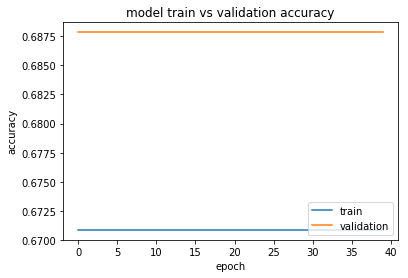

-------------------------------------------
Validate LSTM Course BBB - 2 Target Classes
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.00      0.00      0.00       241
          1       0.69      1.00      0.82       531

avg / total       0.47      0.69      0.56       772

Accuracy score: 0.687823834197


C:\Users\Chris\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


-------------------------------------------
Test LSTM Course BBB - 2 Target Classes
-------------------------------------------
Confusion Matrix for LSTM predictions:
[[   0  369]
 [   0 1152]]
-------------------------------------------
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.00      0.00      0.00       369
          1       0.76      1.00      0.86      1152

avg / total       0.57      0.76      0.65      1521

Accuracy score: 0.757396449704


In [87]:
# Split train & validation set
X_train, X_val, y_train, y_val = train_test_split(BBB_Train_Decile0, BBB_Train_Targets_1D, test_size=0.20, random_state=7)
X_train = X_train.astype('float32')
X_val = X_val.astype('float32')


BBB_model = Sequential()
BBB_model.add(Masking(mask_value=-1, input_shape =(BBB_Train_Decile0.shape[1],3) ))
BBB_model.add(LSTM(32, activation='sigmoid', return_sequences = True))
BBB_model.add(LSTM(32, activation='sigmoid', return_sequences = True))
BBB_model.add(LSTM(32, activation='sigmoid'))
BBB_model.add(Dense(1, activation='sigmoid'))

BBB_model.compile(optimizer=Adam(lr=0.0001), loss='binary_crossentropy',metrics = ['accuracy'])
    
# Fit model for each timestep
ES = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=3, verbose=0, mode='auto')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5,
                              patience=20, verbose = 1, min_lr=0.000001, mode = "min", min_delta=0.001)
print('Fit LSTM Course BBB - 2 Target Classes')
    
history = BBB_model.fit(X_train, y_train, epochs=40, batch_size=32, verbose=1,
                       validation_data = (X_val, y_val), callbacks = [reduce_lr])

# plot train vs validation accuracy
pyplot.plot(history.history['acc'])
pyplot.plot(history.history['val_acc'])
pyplot.title('model train vs validation accuracy')
pyplot.ylabel('accuracy')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='lower right')
pyplot.show()
    
# Validate model
y_pred_BBB_val = BBB_model.predict(X_val)
y_classes_BBB_val = np.round(y_pred_BBB_val)
    
print('-------------------------------------------')
print('Validate LSTM Course BBB - 2 Target Classes')
print('Classification Report for LSTM predictions:')
print('-------------------------------------------')
print(classification_report(y_pred=y_classes_BBB_val, y_true=y_val))
print("Accuracy score: " + str(accuracy_score(y_pred=y_classes_BBB_val, y_true=y_val)))


# Test model
y_pred_BBB = BBB_model.predict(BBB_Test_Decile0)
y_classes_BBB = np.round(y_pred_BBB)
    
print('-------------------------------------------')
print('Test LSTM Course BBB - 2 Target Classes')
print('-------------------------------------------')
print('Confusion Matrix for LSTM predictions:')
print(confusion_matrix(y_pred=y_classes_BBB, y_true=BBB_Test_Targets_1D))
print('-------------------------------------------')
print('Classification Report for LSTM predictions:')
print('-------------------------------------------')
print(classification_report(y_pred=y_classes_BBB, y_true=BBB_Test_Targets_1D))
print("Accuracy score: " + str(accuracy_score(y_pred=y_classes_BBB, y_true=BBB_Test_Targets_1D)))



### BBB Decile 1

Fit LSTM Course BBB - 2 Target Classes
Train on 3087 samples, validate on 772 samples
Epoch 1/100
3087/3087 [==============================] - 15s 5ms/step - loss: 0.6778 - acc: 0.5756 - val_loss: 0.6415 - val_acc: 0.6865
Epoch 2/100
3087/3087 [==============================] - 5s 2ms/step - loss: 0.6381 - acc: 0.6712 - val_loss: 0.6239 - val_acc: 0.6878
Epoch 3/100
3087/3087 [==============================] - 5s 2ms/step - loss: 0.6336 - acc: 0.6709 - val_loss: 0.6222 - val_acc: 0.6878
Epoch 4/100
3087/3087 [==============================] - 5s 2ms/step - loss: 0.6337 - acc: 0.6709 - val_loss: 0.6227 - val_acc: 0.6878
Epoch 5/100
3087/3087 [==============================] - 6s 2ms/step - loss: 0.6335 - acc: 0.6709 - val_loss: 0.6224 - val_acc: 0.6878
Epoch 6/100
3087/3087 [==============================] - 6s 2ms/step - loss: 0.6336 - acc: 0.6709 - val_loss: 0.6219 - val_acc: 0.6878
Epoch 7/100
3087/3087 [==============================] - 5s 2ms/step - loss: 0.6335 - acc: 0.6709 - val

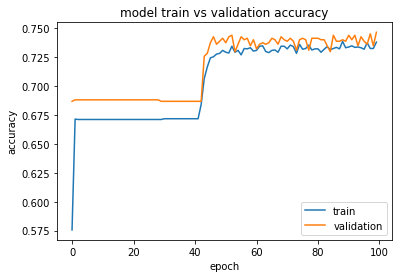

-------------------------------------------
Validate LSTM Course BBB - 2 Target Classes
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.69      0.34      0.45       241
          1       0.76      0.93      0.83       531

avg / total       0.74      0.75      0.72       772

Accuracy score: 0.746113989637
-------------------------------------------
Test LSTM Course BBB - 2 Target Classes
-------------------------------------------
Confusion Matrix for LSTM predictions:
[[175 194]
 [417 735]]
-------------------------------------------
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.30      0.47      0.36       369
          1       0.79      0.64      0.71      1152

avg / total       0.67      0.60      0.62      1521

Accuracy score: 0.598290598291


In [77]:
# Split train & validation set
X_train, X_val, y_train, y_val = train_test_split(BBB_Train_Decile1, BBB_Train_Targets_1D, test_size=0.20, random_state=7)
X_train = X_train.astype('float32')
X_val = X_val.astype('float32')


BBB_model = Sequential()
BBB_model.add(Masking(mask_value=-1, input_shape =(BBB_Train_Decile1.shape[1],3) ))
BBB_model.add(LSTM(32, activation='sigmoid', return_sequences = True))
BBB_model.add(LSTM(32, activation='sigmoid', return_sequences = True))
BBB_model.add(LSTM(32, activation='sigmoid'))
BBB_model.add(Dense(1, activation='sigmoid'))

BBB_model.compile(optimizer=Adam(lr=0.0001), loss='binary_crossentropy',metrics = ['accuracy'])
    
# Fit model for each timestep
ES = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=3, verbose=0, mode='auto')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5,
                              patience=20, verbose = 1, min_lr=0.000001, mode = "min", min_delta=0.001)
print('Fit LSTM Course BBB - 2 Target Classes')
    
history = BBB_model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1,
                       validation_data = (X_val, y_val), callbacks = [reduce_lr])

# plot train vs validation accuracy
pyplot.plot(history.history['acc'])
pyplot.plot(history.history['val_acc'])
pyplot.title('model train vs validation accuracy')
pyplot.ylabel('accuracy')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='lower right')
pyplot.show()
    
# Validate model
y_pred_BBB_val = BBB_model.predict(X_val)
y_classes_BBB_val = np.round(y_pred_BBB_val)
    
print('-------------------------------------------')
print('Validate LSTM Course BBB - 2 Target Classes')
print('Classification Report for LSTM predictions:')
print('-------------------------------------------')
print(classification_report(y_pred=y_classes_BBB_val, y_true=y_val))
print("Accuracy score: " + str(accuracy_score(y_pred=y_classes_BBB_val, y_true=y_val)))


# Test model
y_pred_BBB = BBB_model.predict(BBB_Test_Decile1)
y_classes_BBB = np.round(y_pred_BBB)
    
print('-------------------------------------------')
print('Test LSTM Course BBB - 2 Target Classes')
print('-------------------------------------------')
print('Confusion Matrix for LSTM predictions:')
print(confusion_matrix(y_pred=y_classes_BBB, y_true=BBB_Test_Targets_1D))
print('-------------------------------------------')
print('Classification Report for LSTM predictions:')
print('-------------------------------------------')
print(classification_report(y_pred=y_classes_BBB, y_true=BBB_Test_Targets_1D))
print("Accuracy score: " + str(accuracy_score(y_pred=y_classes_BBB, y_true=BBB_Test_Targets_1D)))



### BBB Decile 2

Fit LSTM Course BBB - 2 Target Classes
Train on 3087 samples, validate on 772 samples
Epoch 1/100
3087/3087 [==============================] - 9s 3ms/step - loss: 0.6374 - acc: 0.6709 - val_loss: 0.6207 - val_acc: 0.6878
Epoch 2/100
3087/3087 [==============================] - 7s 2ms/step - loss: 0.6132 - acc: 0.6842 - val_loss: 0.5343 - val_acc: 0.7383
Epoch 3/100
3087/3087 [==============================] - 7s 2ms/step - loss: 0.5303 - acc: 0.7457 - val_loss: 0.4989 - val_acc: 0.7604
Epoch 4/100
3087/3087 [==============================] - 6s 2ms/step - loss: 0.5191 - acc: 0.7554 - val_loss: 0.4944 - val_acc: 0.7578
Epoch 5/100
3087/3087 [==============================] - 6s 2ms/step - loss: 0.5189 - acc: 0.7528 - val_loss: 0.4917 - val_acc: 0.7630
Epoch 6/100
3087/3087 [==============================] - 6s 2ms/step - loss: 0.5376 - acc: 0.7357 - val_loss: 0.4945 - val_acc: 0.7630
Epoch 7/100
3087/3087 [==============================] - 6s 2ms/step - loss: 0.5158 - acc: 0.7567 - val_

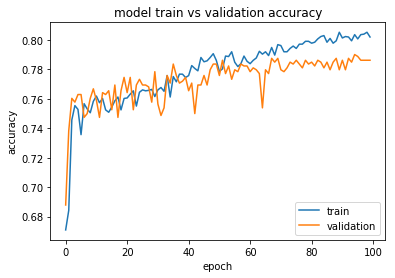

-------------------------------------------
Validate LSTM Course BBB - 2 Target Classes
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.73      0.50      0.59       241
          1       0.80      0.92      0.86       531

avg / total       0.78      0.79      0.77       772

Accuracy score: 0.786269430052
-------------------------------------------
Test LSTM Course BBB - 2 Target Classes
-------------------------------------------
Confusion Matrix for LSTM predictions:
[[206 163]
 [529 623]]
-------------------------------------------
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.28      0.56      0.37       369
          1       0.79      0.54      0.64      1152

avg / total       0.67      0.55      0.58      1521

Accuracy score: 0.545036160421


In [ ]:
# Split train & validation set
X_train, X_val, y_train, y_val = train_test_split(BBB_Train_Decile2, BBB_Train_Targets_1D, test_size=0.20, random_state=7)
X_train = X_train.astype('float32')
X_val = X_val.astype('float32')


BBB_model = Sequential()
BBB_model.add(Masking(mask_value=-1, input_shape =(BBB_Train_Decile2.shape[1],3) ))
BBB_model.add(LSTM(32, activation='sigmoid', return_sequences = True))
BBB_model.add(LSTM(32, activation='sigmoid', return_sequences = True))
BBB_model.add(LSTM(32, activation='sigmoid'))
BBB_model.add(Dense(1, activation='sigmoid'))

BBB_model.compile(optimizer=Adam(lr=0.005), loss='binary_crossentropy',metrics = ['accuracy'])
    
# Fit model for each timestep
ES = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=3, verbose=0, mode='auto')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5,
                              patience=20, verbose = 1, min_lr=0.000001, mode = "min", min_delta=0.001)
print('Fit LSTM Course BBB - 2 Target Classes')
    
history = BBB_model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1,
                       validation_data = (X_val, y_val), callbacks = [reduce_lr])

# plot train vs validation accuracy
pyplot.plot(history.history['acc'])
pyplot.plot(history.history['val_acc'])
pyplot.title('model train vs validation accuracy')
pyplot.ylabel('accuracy')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='lower right')
pyplot.show()
    
# Validate model
y_pred_BBB_val = BBB_model.predict(X_val)
y_classes_BBB_val = np.round(y_pred_BBB_val)
    
print('-------------------------------------------')
print('Validate LSTM Course BBB - 2 Target Classes')
print('Classification Report for LSTM predictions:')
print('-------------------------------------------')
print(classification_report(y_pred=y_classes_BBB_val, y_true=y_val))
print("Accuracy score: " + str(accuracy_score(y_pred=y_classes_BBB_val, y_true=y_val)))


# Test model
y_pred_BBB = BBB_model.predict(BBB_Test_Decile2)
y_classes_BBB = np.round(y_pred_BBB)
    
print('-------------------------------------------')
print('Test LSTM Course BBB - 2 Target Classes')
print('-------------------------------------------')
print('Confusion Matrix for LSTM predictions:')
print(confusion_matrix(y_pred=y_classes_BBB, y_true=BBB_Test_Targets_1D))
print('-------------------------------------------')
print('Classification Report for LSTM predictions:')
print('-------------------------------------------')
print(classification_report(y_pred=y_classes_BBB, y_true=BBB_Test_Targets_1D))
print("Accuracy score: " + str(accuracy_score(y_pred=y_classes_BBB, y_true=BBB_Test_Targets_1D)))



### BBB Decile 3

Fit LSTM Course BBB - 2 Target Classes
Train on 3087 samples, validate on 772 samples
Epoch 1/100
3087/3087 [==============================] - 18s 6ms/step - loss: 0.7459 - acc: 0.3291 - val_loss: 0.6932 - val_acc: 0.3122
Epoch 2/100
3087/3087 [==============================] - 9s 3ms/step - loss: 0.6627 - acc: 0.6686 - val_loss: 0.6348 - val_acc: 0.6878
Epoch 3/100
3087/3087 [==============================] - 9s 3ms/step - loss: 0.6359 - acc: 0.6712 - val_loss: 0.6223 - val_acc: 0.6878
Epoch 4/100
3087/3087 [==============================] - 9s 3ms/step - loss: 0.6334 - acc: 0.6712 - val_loss: 0.6217 - val_acc: 0.6878
Epoch 5/100
3087/3087 [==============================] - 9s 3ms/step - loss: 0.6331 - acc: 0.6712 - val_loss: 0.6214 - val_acc: 0.6878
Epoch 6/100
3087/3087 [==============================] - 9s 3ms/step - loss: 0.6331 - acc: 0.6712 - val_loss: 0.6210 - val_acc: 0.6878
Epoch 7/100
3087/3087 [==============================] - 9s 3ms/step - loss: 0.6330 - acc: 0.6712 - val

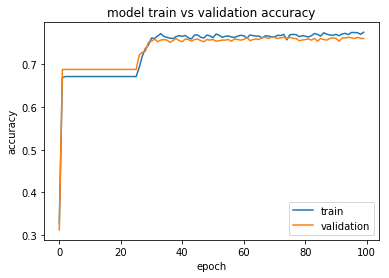

-------------------------------------------
Validate LSTM Course BBB - 2 Target Classes
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.70      0.40      0.51       241
          1       0.77      0.92      0.84       531

avg / total       0.75      0.76      0.74       772

Accuracy score: 0.760362694301
-------------------------------------------
Test LSTM Course BBB - 2 Target Classes
-------------------------------------------
Confusion Matrix for LSTM predictions:
[[180 189]
 [450 702]]
-------------------------------------------
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.29      0.49      0.36       369
          1       0.79      0.61      0.69      1152

avg / total       0.67      0.58      0.61      1521

Accuracy score: 0.579881656805


In [71]:
# Split train & validation set
X_train, X_val, y_train, y_val = train_test_split(BBB_Train_Decile3, BBB_Train_Targets_1D, test_size=0.20, random_state=7)
X_train = X_train.astype('float32')
X_val = X_val.astype('float32')


BBB_model = Sequential()
BBB_model.add(Masking(mask_value=-1, input_shape =(BBB_Train_Decile3.shape[1],3) ))
BBB_model.add(LSTM(32, activation='sigmoid', return_sequences = True))
BBB_model.add(LSTM(32, activation='sigmoid', return_sequences = True))
BBB_model.add(LSTM(32, activation='sigmoid'))
BBB_model.add(Dense(1, activation='sigmoid'))

BBB_model.compile(optimizer=Adam(lr=0.0001), loss='binary_crossentropy',metrics = ['accuracy'])
    
# Fit model for each timestep
ES = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=3, verbose=0, mode='auto')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5,
                              patience=10, verbose = 1, min_lr=0.000001, mode = "min", min_delta=0.001)
print('Fit LSTM Course BBB - 2 Target Classes')
    
history = BBB_model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1,
                       validation_data = (X_val, y_val), callbacks = [reduce_lr])

# plot train vs validation accuracy
pyplot.plot(history.history['acc'])
pyplot.plot(history.history['val_acc'])
pyplot.title('model train vs validation accuracy')
pyplot.ylabel('accuracy')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='lower right')
pyplot.show()
    
# Validate model
y_pred_BBB_val = BBB_model.predict(X_val)
y_classes_BBB_val = np.round(y_pred_BBB_val)
    
print('-------------------------------------------')
print('Validate LSTM Course BBB - 2 Target Classes')
print('Classification Report for LSTM predictions:')
print('-------------------------------------------')
print(classification_report(y_pred=y_classes_BBB_val, y_true=y_val))
print("Accuracy score: " + str(accuracy_score(y_pred=y_classes_BBB_val, y_true=y_val)))


# Test model
y_pred_BBB = BBB_model.predict(BBB_Test_Decile3)
y_classes_BBB = np.round(y_pred_BBB)
    
print('-------------------------------------------')
print('Test LSTM Course BBB - 2 Target Classes')
print('-------------------------------------------')
print('Confusion Matrix for LSTM predictions:')
print(confusion_matrix(y_pred=y_classes_BBB, y_true=BBB_Test_Targets_1D))
print('-------------------------------------------')
print('Classification Report for LSTM predictions:')
print('-------------------------------------------')
print(classification_report(y_pred=y_classes_BBB, y_true=BBB_Test_Targets_1D))
print("Accuracy score: " + str(accuracy_score(y_pred=y_classes_BBB, y_true=BBB_Test_Targets_1D)))



### BBB Decile 4

Fit LSTM Course BBB - 2 Target Classes
Train on 3087 samples, validate on 772 samples
Epoch 1/200
3087/3087 [==============================] - 18s 6ms/step - loss: 0.6350 - acc: 0.6709 - val_loss: 0.6208 - val_acc: 0.6878
Epoch 2/200
3087/3087 [==============================] - 15s 5ms/step - loss: 0.6342 - acc: 0.6709 - val_loss: 0.6229 - val_acc: 0.6878
Epoch 3/200
3087/3087 [==============================] - 15s 5ms/step - loss: 0.6344 - acc: 0.6709 - val_loss: 0.6209 - val_acc: 0.6878
Epoch 4/200
3087/3087 [==============================] - 16s 5ms/step - loss: 0.6343 - acc: 0.6709 - val_loss: 0.6208 - val_acc: 0.6878
Epoch 5/200
3087/3087 [==============================] - 15s 5ms/step - loss: 0.6333 - acc: 0.6709 - val_loss: 0.6204 - val_acc: 0.6878
Epoch 6/200
3087/3087 [==============================] - 15s 5ms/step - loss: 0.6330 - acc: 0.6709 - val_loss: 0.6188 - val_acc: 0.6878
Epoch 7/200
3087/3087 [==============================] - 15s 5ms/step - loss: 0.6308 - acc: 0.6709

3087/3087 [==============================] - 13s 4ms/step - loss: 0.4402 - acc: 0.8037 - val_loss: 0.4490 - val_acc: 0.7940
Epoch 117/200
3087/3087 [==============================] - 12s 4ms/step - loss: 0.4402 - acc: 0.8030 - val_loss: 0.4492 - val_acc: 0.7953
Epoch 118/200
3087/3087 [==============================] - 12s 4ms/step - loss: 0.4401 - acc: 0.8037 - val_loss: 0.4494 - val_acc: 0.7927
Epoch 119/200
3087/3087 [==============================] - 12s 4ms/step - loss: 0.4396 - acc: 0.8037 - val_loss: 0.4501 - val_acc: 0.7953

Epoch 00119: ReduceLROnPlateau reducing learning rate to 7.812500371073838e-06.
Epoch 120/200
3087/3087 [==============================] - 12s 4ms/step - loss: 0.4401 - acc: 0.8011 - val_loss: 0.4491 - val_acc: 0.7953
Epoch 121/200
3087/3087 [==============================] - 13s 4ms/step - loss: 0.4399 - acc: 0.8040 - val_loss: 0.4489 - val_acc: 0.7966
Epoch 122/200
3087/3087 [==============================] - 12s 4ms/step - loss: 0.4398 - acc: 0.8056 - va

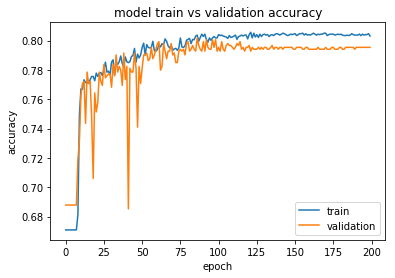

-------------------------------------------
Validate LSTM Course BBB - 2 Target Classes
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.75      0.51      0.61       241
          1       0.81      0.92      0.86       531

avg / total       0.79      0.80      0.78       772

Accuracy score: 0.795336787565
-------------------------------------------
Test LSTM Course BBB - 2 Target Classes
-------------------------------------------
Confusion Matrix for LSTM predictions:
[[225 144]
 [407 745]]
-------------------------------------------
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.36      0.61      0.45       369
          1       0.84      0.65      0.73      1152

avg / total       0.72      0.64      0.66      1521

Accuracy score: 0.637738330046


In [ ]:
# Split train & validation set
X_train, X_val, y_train, y_val = train_test_split(BBB_Train_Decile4, BBB_Train_Targets_1D, test_size=0.20, random_state=7)
X_train = X_train.astype('float32')
X_val = X_val.astype('float32')


BBB_model = Sequential()
BBB_model.add(Masking(mask_value=-1, input_shape =(BBB_Train_Decile4.shape[1],3) ))
BBB_model.add(LSTM(32, activation='sigmoid', return_sequences = True))
BBB_model.add(LSTM(32, activation='sigmoid', return_sequences = True))
BBB_model.add(LSTM(32, activation='sigmoid'))
BBB_model.add(Dense(1, activation='sigmoid'))

BBB_model.compile(optimizer=RMSprop(lr=0.0005), loss='binary_crossentropy',metrics = ['accuracy'])
    
# Fit model for each timestep
ES = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=3, verbose=0, mode='auto')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5,
                              patience=10, verbose = 1, min_lr=0.000001, mode = "min", min_delta=0.001)
print('Fit LSTM Course BBB - 2 Target Classes')
    
history = BBB_model.fit(X_train, y_train, epochs=200, batch_size=32, verbose=1,
                       validation_data = (X_val, y_val), callbacks = [reduce_lr])

# plot train vs validation accuracy
pyplot.plot(history.history['acc'])
pyplot.plot(history.history['val_acc'])
pyplot.title('model train vs validation accuracy')
pyplot.ylabel('accuracy')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='lower right')
pyplot.show()
    
# Validate model
y_pred_BBB_val = BBB_model.predict(X_val)
y_classes_BBB_val = np.round(y_pred_BBB_val)
    
print('-------------------------------------------')
print('Validate LSTM Course BBB - 2 Target Classes')
print('Classification Report for LSTM predictions:')
print('-------------------------------------------')
print(classification_report(y_pred=y_classes_BBB_val, y_true=y_val))
print("Accuracy score: " + str(accuracy_score(y_pred=y_classes_BBB_val, y_true=y_val)))


# Test model
y_pred_BBB = BBB_model.predict(BBB_Test_Decile4)
y_classes_BBB = np.round(y_pred_BBB)
    
print('-------------------------------------------')
print('Test LSTM Course BBB - 2 Target Classes')
print('-------------------------------------------')
print('Confusion Matrix for LSTM predictions:')
print(confusion_matrix(y_pred=y_classes_BBB, y_true=BBB_Test_Targets_1D))
print('-------------------------------------------')
print('Classification Report for LSTM predictions:')
print('-------------------------------------------')
print(classification_report(y_pred=y_classes_BBB, y_true=BBB_Test_Targets_1D))
print("Accuracy score: " + str(accuracy_score(y_pred=y_classes_BBB, y_true=BBB_Test_Targets_1D)))



### BBB Decile 5

Fit LSTM Course BBB - 2 Target Classes
Train on 3087 samples, validate on 772 samples
Epoch 1/100
3087/3087 [==============================] - 21s 7ms/step - loss: 0.6351 - acc: 0.6709 - val_loss: 0.6208 - val_acc: 0.6878
Epoch 2/100
3087/3087 [==============================] - 15s 5ms/step - loss: 0.6353 - acc: 0.6709 - val_loss: 0.6204 - val_acc: 0.6878
Epoch 3/100
3087/3087 [==============================] - 16s 5ms/step - loss: 0.6339 - acc: 0.6709 - val_loss: 0.6198 - val_acc: 0.6878
Epoch 4/100
3087/3087 [==============================] - 15s 5ms/step - loss: 0.6274 - acc: 0.6709 - val_loss: 0.6168 - val_acc: 0.6878
Epoch 5/100
3087/3087 [==============================] - 14s 5ms/step - loss: 0.5486 - acc: 0.7302 - val_loss: 0.5005 - val_acc: 0.7824
Epoch 6/100
3087/3087 [==============================] - 14s 5ms/step - loss: 0.4926 - acc: 0.7700 - val_loss: 0.5714 - val_acc: 0.7448
Epoch 7/100
3087/3087 [==============================] - 14s 5ms/step - loss: 0.4831 - acc: 0.7781

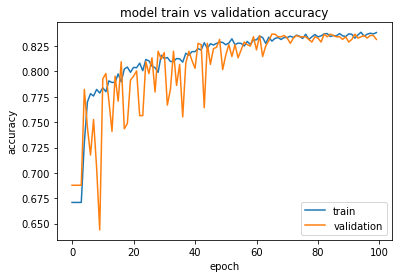

-------------------------------------------
Validate LSTM Course BBB - 2 Target Classes
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.84      0.57      0.68       241
          1       0.83      0.95      0.89       531

avg / total       0.83      0.83      0.82       772

Accuracy score: 0.831606217617
-------------------------------------------
Test LSTM Course BBB - 2 Target Classes
-------------------------------------------
Confusion Matrix for LSTM predictions:
[[209 160]
 [216 936]]
-------------------------------------------
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.49      0.57      0.53       369
          1       0.85      0.81      0.83      1152

avg / total       0.77      0.75      0.76      1521

Accuracy score: 0.752794214333


In [74]:
# Split train & validation set
X_train, X_val, y_train, y_val = train_test_split(BBB_Train_Decile5, BBB_Train_Targets_1D, test_size=0.20, random_state=7)
X_train = X_train.astype('float32')
X_val = X_val.astype('float32')


BBB_model = Sequential()
BBB_model.add(Masking(mask_value=-1, input_shape =(BBB_Train_Decile5.shape[1],3) ))
BBB_model.add(LSTM(32, activation='sigmoid', return_sequences = True))
BBB_model.add(LSTM(32, activation='sigmoid', return_sequences = True))
BBB_model.add(LSTM(32, activation='sigmoid'))
BBB_model.add(Dense(1, activation='sigmoid'))

BBB_model.compile(optimizer=RMSprop(lr=0.001), loss='binary_crossentropy',metrics = ['accuracy'])
    
# Fit model for each timestep
ES = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=3, verbose=0, mode='auto')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5,
                              patience=10, verbose = 1, min_lr=0.000001, mode = "min", min_delta=0.001)
print('Fit LSTM Course BBB - 2 Target Classes')
    
history = BBB_model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1,
                       validation_data = (X_val, y_val), callbacks = [reduce_lr])

# plot train vs validation accuracy
pyplot.plot(history.history['acc'])
pyplot.plot(history.history['val_acc'])
pyplot.title('model train vs validation accuracy')
pyplot.ylabel('accuracy')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='lower right')
pyplot.show()
    
# Validate model
y_pred_BBB_val = BBB_model.predict(X_val)
y_classes_BBB_val = np.round(y_pred_BBB_val)
    
print('-------------------------------------------')
print('Validate LSTM Course BBB - 2 Target Classes')
print('Classification Report for LSTM predictions:')
print('-------------------------------------------')
print(classification_report(y_pred=y_classes_BBB_val, y_true=y_val))
print("Accuracy score: " + str(accuracy_score(y_pred=y_classes_BBB_val, y_true=y_val)))


# Test model
y_pred_BBB = BBB_model.predict(BBB_Test_Decile5)
y_classes_BBB = np.round(y_pred_BBB)
    
print('-------------------------------------------')
print('Test LSTM Course BBB - 2 Target Classes')
print('-------------------------------------------')
print('Confusion Matrix for LSTM predictions:')
print(confusion_matrix(y_pred=y_classes_BBB, y_true=BBB_Test_Targets_1D))
print('-------------------------------------------')
print('Classification Report for LSTM predictions:')
print('-------------------------------------------')
print(classification_report(y_pred=y_classes_BBB, y_true=BBB_Test_Targets_1D))
print("Accuracy score: " + str(accuracy_score(y_pred=y_classes_BBB, y_true=BBB_Test_Targets_1D)))



### BBB Decile 6

Fit LSTM Course BBB - 2 Target Classes
Train on 3087 samples, validate on 772 samples
Epoch 1/70
3087/3087 [==============================] - 19s 6ms/step - loss: 0.6351 - acc: 0.6709 - val_loss: 0.6208 - val_acc: 0.6878
Epoch 2/70
3087/3087 [==============================] - 15s 5ms/step - loss: 0.6338 - acc: 0.6709 - val_loss: 0.6205 - val_acc: 0.6878
Epoch 3/70
3087/3087 [==============================] - 16s 5ms/step - loss: 0.6323 - acc: 0.6709 - val_loss: 0.6113 - val_acc: 0.6878
Epoch 4/70
3087/3087 [==============================] - 15s 5ms/step - loss: 0.5703 - acc: 0.7172 - val_loss: 0.4812 - val_acc: 0.7733
Epoch 5/70
3087/3087 [==============================] - 15s 5ms/step - loss: 0.4665 - acc: 0.7865 - val_loss: 0.4471 - val_acc: 0.7966
Epoch 6/70
3087/3087 [==============================] - 15s 5ms/step - loss: 0.4359 - acc: 0.8008 - val_loss: 0.4362 - val_acc: 0.7966
Epoch 7/70
3087/3087 [==============================] - 16s 5ms/step - loss: 0.4313 - acc: 0.7992 - val_

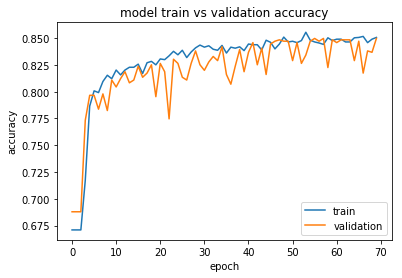

-------------------------------------------
Validate LSTM Course BBB - 2 Target Classes
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.83      0.65      0.73       241
          1       0.86      0.94      0.90       531

avg / total       0.85      0.85      0.84       772

Accuracy score: 0.849740932642
-------------------------------------------
Test LSTM Course BBB - 2 Target Classes
-------------------------------------------
Confusion Matrix for LSTM predictions:
[[ 230  139]
 [  56 1096]]
-------------------------------------------
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.80      0.62      0.70       369
          1       0.89      0.95      0.92      1152

avg / total       0.87      0.87      0.87      1521

Accuracy score: 0.871794871795


In [ ]:
# Split train & validation set
X_train, X_val, y_train, y_val = train_test_split(BBB_Train_Decile6, BBB_Train_Targets_1D, test_size=0.20, random_state=7)
X_train = X_train.astype('float32')
X_val = X_val.astype('float32')


BBB_model = Sequential()
BBB_model.add(Masking(mask_value=-1, input_shape =(BBB_Train_Decile6.shape[1],3) ))
BBB_model.add(LSTM(32, activation='sigmoid', return_sequences = True))
BBB_model.add(LSTM(32, activation='sigmoid', return_sequences = True))
BBB_model.add(LSTM(32, activation='sigmoid'))
BBB_model.add(Dense(1, activation='sigmoid'))

BBB_model.compile(optimizer=Adam(lr=0.001), loss='binary_crossentropy',metrics = ['accuracy'])
    
# Fit model for each timestep
ES = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=3, verbose=0, mode='auto')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5,
                              patience=10, verbose = 1, min_lr=0.000001, mode = "min", min_delta=0.001)
print('Fit LSTM Course BBB - 2 Target Classes')
    
history = BBB_model.fit(X_train, y_train, epochs=70, batch_size=32, verbose=1,
                       validation_data = (X_val, y_val), callbacks = [reduce_lr])

# plot train vs validation accuracy
pyplot.plot(history.history['acc'])
pyplot.plot(history.history['val_acc'])
pyplot.title('model train vs validation accuracy')
pyplot.ylabel('accuracy')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='lower right')
pyplot.show()
    
# Validate model
y_pred_BBB_val = BBB_model.predict(X_val)
y_classes_BBB_val = np.round(y_pred_BBB_val)
    
print('-------------------------------------------')
print('Validate LSTM Course BBB - 2 Target Classes')
print('Classification Report for LSTM predictions:')
print('-------------------------------------------')
print(classification_report(y_pred=y_classes_BBB_val, y_true=y_val))
print("Accuracy score: " + str(accuracy_score(y_pred=y_classes_BBB_val, y_true=y_val)))


# Test model
y_pred_BBB = BBB_model.predict(BBB_Test_Decile6)
y_classes_BBB = np.round(y_pred_BBB)
    
print('-------------------------------------------')
print('Test LSTM Course BBB - 2 Target Classes')
print('-------------------------------------------')
print('Confusion Matrix for LSTM predictions:')
print(confusion_matrix(y_pred=y_classes_BBB, y_true=BBB_Test_Targets_1D))
print('-------------------------------------------')
print('Classification Report for LSTM predictions:')
print('-------------------------------------------')
print(classification_report(y_pred=y_classes_BBB, y_true=BBB_Test_Targets_1D))
print("Accuracy score: " + str(accuracy_score(y_pred=y_classes_BBB, y_true=BBB_Test_Targets_1D)))



### BBB Decile 7

Fit LSTM Course BBB - 2 Target Classes
Train on 3087 samples, validate on 772 samples
Epoch 1/100
3087/3087 [==============================] - 25s 8ms/step - loss: 0.6422 - acc: 0.6579 - val_loss: 0.6212 - val_acc: 0.6878
Epoch 2/100
3087/3087 [==============================] - 18s 6ms/step - loss: 0.6343 - acc: 0.6709 - val_loss: 0.6223 - val_acc: 0.6878
Epoch 3/100
3087/3087 [==============================] - 18s 6ms/step - loss: 0.6321 - acc: 0.6709 - val_loss: 0.6281 - val_acc: 0.6878
Epoch 4/100
3087/3087 [==============================] - 18s 6ms/step - loss: 0.6196 - acc: 0.6709 - val_loss: 0.5660 - val_acc: 0.6878
Epoch 5/100
3087/3087 [==============================] - 17s 6ms/step - loss: 0.5447 - acc: 0.7328 - val_loss: 0.4624 - val_acc: 0.7915
Epoch 6/100
3087/3087 [==============================] - 17s 6ms/step - loss: 0.4463 - acc: 0.7956 - val_loss: 0.4297 - val_acc: 0.8096
Epoch 7/100
3087/3087 [==============================] - 18s 6ms/step - loss: 0.4186 - acc: 0.8098

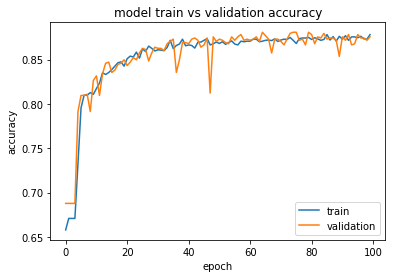

-------------------------------------------
Validate LSTM Course BBB - 2 Target Classes
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.96      0.63      0.76       241
          1       0.85      0.99      0.92       531

avg / total       0.89      0.88      0.87       772

Accuracy score: 0.875647668394
-------------------------------------------
Test LSTM Course BBB - 2 Target Classes
-------------------------------------------
Confusion Matrix for LSTM predictions:
[[ 258  111]
 [ 137 1015]]
-------------------------------------------
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.65      0.70      0.68       369
          1       0.90      0.88      0.89      1152

avg / total       0.84      0.84      0.84      1521

Accuracy score: 0.836949375411


In [70]:
# Split train & validation set
X_train, X_val, y_train, y_val = train_test_split(BBB_Train_Decile7, BBB_Train_Targets_1D, test_size=0.20, random_state=7)
X_train = X_train.astype('float32')
X_val = X_val.astype('float32')


BBB_model = Sequential()
BBB_model.add(Masking(mask_value=-1, input_shape =(BBB_Train_Decile7.shape[1],3) ))
BBB_model.add(LSTM(32, activation='sigmoid', return_sequences = True))
BBB_model.add(LSTM(32, activation='sigmoid', return_sequences = True))
BBB_model.add(LSTM(32, activation='sigmoid'))
BBB_model.add(Dense(1, activation='sigmoid'))

BBB_model.compile(optimizer=Adam(lr=0.001), loss='binary_crossentropy',metrics = ['accuracy'])
    
# Fit model for each timestep
ES = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=3, verbose=0, mode='auto')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5,
                              patience=10, verbose = 1, min_lr=0.000001, mode = "min", min_delta=0.001)
print('Fit LSTM Course BBB - 2 Target Classes')
    
history = BBB_model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1,
                       validation_data = (X_val, y_val), callbacks = [reduce_lr])

# plot train vs validation accuracy
pyplot.plot(history.history['acc'])
pyplot.plot(history.history['val_acc'])
pyplot.title('model train vs validation accuracy')
pyplot.ylabel('accuracy')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='lower right')
pyplot.show()
    
# Validate model
y_pred_BBB_val = BBB_model.predict(X_val)
y_classes_BBB_val = np.round(y_pred_BBB_val)
    
print('-------------------------------------------')
print('Validate LSTM Course BBB - 2 Target Classes')
print('Classification Report for LSTM predictions:')
print('-------------------------------------------')
print(classification_report(y_pred=y_classes_BBB_val, y_true=y_val))
print("Accuracy score: " + str(accuracy_score(y_pred=y_classes_BBB_val, y_true=y_val)))


# Test model
y_pred_BBB = BBB_model.predict(BBB_Test_Decile7)
y_classes_BBB = np.round(y_pred_BBB)
    
print('-------------------------------------------')
print('Test LSTM Course BBB - 2 Target Classes')
print('-------------------------------------------')
print('Confusion Matrix for LSTM predictions:')
print(confusion_matrix(y_pred=y_classes_BBB, y_true=BBB_Test_Targets_1D))
print('-------------------------------------------')
print('Classification Report for LSTM predictions:')
print('-------------------------------------------')
print(classification_report(y_pred=y_classes_BBB, y_true=BBB_Test_Targets_1D))
print("Accuracy score: " + str(accuracy_score(y_pred=y_classes_BBB, y_true=BBB_Test_Targets_1D)))



### BBB Decile 8

Fit LSTM Course BBB - 2 Target Classes
Train on 3087 samples, validate on 772 samples
Epoch 1/100
3087/3087 [==============================] - 22s 7ms/step - loss: 0.6360 - acc: 0.6709 - val_loss: 0.6248 - val_acc: 0.6878
Epoch 2/100
3087/3087 [==============================] - 18s 6ms/step - loss: 0.6352 - acc: 0.6709 - val_loss: 0.6205 - val_acc: 0.6878
Epoch 3/100
3087/3087 [==============================] - 18s 6ms/step - loss: 0.6328 - acc: 0.6709 - val_loss: 0.6192 - val_acc: 0.6878
Epoch 4/100
3087/3087 [==============================] - 19s 6ms/step - loss: 0.6021 - acc: 0.6790 - val_loss: 0.4954 - val_acc: 0.7902
Epoch 5/100
3087/3087 [==============================] - 19s 6ms/step - loss: 0.4753 - acc: 0.7859 - val_loss: 0.4413 - val_acc: 0.7889
Epoch 6/100
3087/3087 [==============================] - 18s 6ms/step - loss: 0.4060 - acc: 0.8170 - val_loss: 0.4198 - val_acc: 0.8031
Epoch 7/100
3087/3087 [==============================] - 19s 6ms/step - loss: 0.4032 - acc: 0.8092

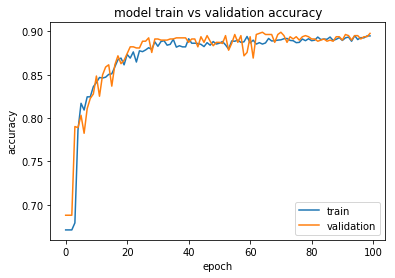

-------------------------------------------
Validate LSTM Course BBB - 2 Target Classes
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.95      0.71      0.81       241
          1       0.88      0.98      0.93       531

avg / total       0.90      0.90      0.89       772

Accuracy score: 0.897668393782
-------------------------------------------
Test LSTM Course BBB - 2 Target Classes
-------------------------------------------
Confusion Matrix for LSTM predictions:
[[ 261  108]
 [  23 1129]]
-------------------------------------------
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.92      0.71      0.80       369
          1       0.91      0.98      0.95      1152

avg / total       0.91      0.91      0.91      1521

Accuracy score: 0.913872452334


In [ ]:
# Split train & validation set
X_train, X_val, y_train, y_val = train_test_split(BBB_Train_Decile8, BBB_Train_Targets_1D, test_size=0.20, random_state=7)
X_train = X_train.astype('float32')
X_val = X_val.astype('float32')


BBB_model = Sequential()
BBB_model.add(Masking(mask_value=-1, input_shape =(BBB_Train_Decile8.shape[1],3) ))
BBB_model.add(LSTM(32, activation='sigmoid', return_sequences = True))
BBB_model.add(LSTM(32, activation='sigmoid', return_sequences = True))
BBB_model.add(LSTM(32, activation='sigmoid'))
BBB_model.add(Dense(1, activation='sigmoid'))

BBB_model.compile(optimizer=Adam(lr=0.001), loss='binary_crossentropy',metrics = ['accuracy'])
    
# Fit model for each timestep
ES = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=3, verbose=0, mode='auto')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5,
                              patience=10, verbose = 1, min_lr=0.000001, mode = "min", min_delta=0.001)
print('Fit LSTM Course BBB - 2 Target Classes')
    
history = BBB_model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1,
                       validation_data = (X_val, y_val), callbacks = [reduce_lr])

# plot train vs validation accuracy
pyplot.plot(history.history['acc'])
pyplot.plot(history.history['val_acc'])
pyplot.title('model train vs validation accuracy')
pyplot.ylabel('accuracy')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='lower right')
pyplot.show()
    
# Validate model
y_pred_BBB_val = BBB_model.predict(X_val)
y_classes_BBB_val = np.round(y_pred_BBB_val)
    
print('-------------------------------------------')
print('Validate LSTM Course BBB - 2 Target Classes')
print('Classification Report for LSTM predictions:')
print('-------------------------------------------')
print(classification_report(y_pred=y_classes_BBB_val, y_true=y_val))
print("Accuracy score: " + str(accuracy_score(y_pred=y_classes_BBB_val, y_true=y_val)))


# Test model
y_pred_BBB = BBB_model.predict(BBB_Test_Decile8)
y_classes_BBB = np.round(y_pred_BBB)
    
print('-------------------------------------------')
print('Test LSTM Course BBB - 2 Target Classes')
print('-------------------------------------------')
print('Confusion Matrix for LSTM predictions:')
print(confusion_matrix(y_pred=y_classes_BBB, y_true=BBB_Test_Targets_1D))
print('-------------------------------------------')
print('Classification Report for LSTM predictions:')
print('-------------------------------------------')
print(classification_report(y_pred=y_classes_BBB, y_true=BBB_Test_Targets_1D))
print("Accuracy score: " + str(accuracy_score(y_pred=y_classes_BBB, y_true=BBB_Test_Targets_1D)))



### BBB Decile 9

Fit LSTM Course BBB - 2 Target Classes
Train on 3087 samples, validate on 772 samples
Epoch 1/100
3087/3087 [==============================] - 24s 8ms/step - loss: 0.6396 - acc: 0.6709 - val_loss: 0.6258 - val_acc: 0.6878
Epoch 2/100
3087/3087 [==============================] - 21s 7ms/step - loss: 0.6338 - acc: 0.6709 - val_loss: 0.6207 - val_acc: 0.6878
Epoch 3/100
3087/3087 [==============================] - 20s 6ms/step - loss: 0.6342 - acc: 0.6709 - val_loss: 0.6202 - val_acc: 0.6878
Epoch 4/100
3087/3087 [==============================] - 20s 6ms/step - loss: 0.6336 - acc: 0.6709 - val_loss: 0.6193 - val_acc: 0.6878
Epoch 5/100
3087/3087 [==============================] - 20s 7ms/step - loss: 0.6288 - acc: 0.6709 - val_loss: 0.6069 - val_acc: 0.6878
Epoch 6/100
3087/3087 [==============================] - 20s 6ms/step - loss: 0.5984 - acc: 0.6728 - val_loss: 0.5495 - val_acc: 0.6878
Epoch 7/100
3087/3087 [==============================] - 20s 6ms/step - loss: 0.5058 - acc: 0.7583

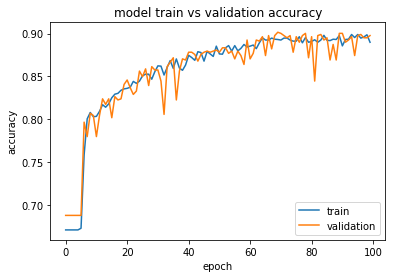

-------------------------------------------
Validate LSTM Course BBB - 2 Target Classes
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.93      0.73      0.82       241
          1       0.89      0.97      0.93       531

avg / total       0.90      0.90      0.89       772

Accuracy score: 0.897668393782
-------------------------------------------
Test LSTM Course BBB - 2 Target Classes
-------------------------------------------
Confusion Matrix for LSTM predictions:
[[ 285   84]
 [  53 1099]]
-------------------------------------------
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.84      0.77      0.81       369
          1       0.93      0.95      0.94      1152

avg / total       0.91      0.91      0.91      1521

Accuracy score: 0.909927679158


In [55]:
# Split train & validation set
X_train, X_val, y_train, y_val = train_test_split(BBB_Train_Decile9, BBB_Train_Targets_1D, test_size=0.20, random_state=7)
X_train = X_train.astype('float32')
X_val = X_val.astype('float32')


BBB_model = Sequential()
BBB_model.add(Masking(mask_value=-1, input_shape =(BBB_Train_Decile9.shape[1],3) ))
BBB_model.add(LSTM(32, activation='sigmoid', return_sequences = True))
BBB_model.add(LSTM(32, activation='sigmoid', return_sequences = True))
BBB_model.add(LSTM(32, activation='sigmoid'))
BBB_model.add(Dense(1, activation='sigmoid'))

BBB_model.compile(optimizer=Adam(lr=0.0005), loss='binary_crossentropy',metrics = ['accuracy'])
    
# Fit model for each timestep
ES = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=3, verbose=0, mode='auto')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5,
                              patience=10, verbose = 1, min_lr=0.0000025, mode = "min", min_delta=0.001)
print('Fit LSTM Course BBB - 2 Target Classes')
    
history = BBB_model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1,
                       validation_data = (X_val, y_val), callbacks = [reduce_lr])

# plot train vs validation accuracy
pyplot.plot(history.history['acc'])
pyplot.plot(history.history['val_acc'])
pyplot.title('model train vs validation accuracy')
pyplot.ylabel('accuracy')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='lower right')
pyplot.show()
    
# Validate model
y_pred_BBB_val = BBB_model.predict(X_val)
y_classes_BBB_val = np.round(y_pred_BBB_val)
    
print('-------------------------------------------')
print('Validate LSTM Course BBB - 2 Target Classes')
print('Classification Report for LSTM predictions:')
print('-------------------------------------------')
print(classification_report(y_pred=y_classes_BBB_val, y_true=y_val))
print("Accuracy score: " + str(accuracy_score(y_pred=y_classes_BBB_val, y_true=y_val)))


# Test model
y_pred_BBB = BBB_model.predict(BBB_Test_Decile9)
y_classes_BBB = np.round(y_pred_BBB)
    
print('-------------------------------------------')
print('Test LSTM Course BBB - 2 Target Classes')
print('-------------------------------------------')
print('Confusion Matrix for LSTM predictions:')
print(confusion_matrix(y_pred=y_classes_BBB, y_true=BBB_Test_Targets_1D))
print('-------------------------------------------')
print('Classification Report for LSTM predictions:')
print('-------------------------------------------')
print(classification_report(y_pred=y_classes_BBB, y_true=BBB_Test_Targets_1D))
print("Accuracy score: " + str(accuracy_score(y_pred=y_classes_BBB, y_true=BBB_Test_Targets_1D)))



### BBB Decile 10 (full dataset)

Fit LSTM Course BBB - 2 Target Classes
Train on 3087 samples, validate on 772 samples
Epoch 1/100
3087/3087 [==============================] - 33s 11ms/step - loss: 0.6367 - acc: 0.6709 - val_loss: 0.6208 - val_acc: 0.6878
Epoch 2/100
3087/3087 [==============================] - 26s 8ms/step - loss: 0.6342 - acc: 0.6709 - val_loss: 0.6207 - val_acc: 0.6878
Epoch 3/100
3087/3087 [==============================] - 26s 9ms/step - loss: 0.6339 - acc: 0.6709 - val_loss: 0.6204 - val_acc: 0.6878
Epoch 4/100
3087/3087 [==============================] - 25s 8ms/step - loss: 0.6226 - acc: 0.6709 - val_loss: 0.5594 - val_acc: 0.6878
Epoch 5/100
3087/3087 [==============================] - 24s 8ms/step - loss: 0.5224 - acc: 0.7353 - val_loss: 0.4874 - val_acc: 0.7927
Epoch 6/100
3087/3087 [==============================] - 24s 8ms/step - loss: 0.4446 - acc: 0.7849 - val_loss: 0.4498 - val_acc: 0.7850
Epoch 7/100
3087/3087 [==============================] - 27s 9ms/step - loss: 0.4341 - acc: 0.796

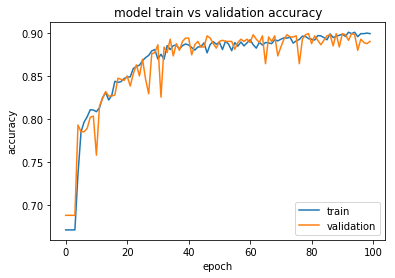

-------------------------------------------
Validate LSTM Course BBB - 2 Target Classes
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.92      0.71      0.80       241
          1       0.88      0.97      0.92       531

avg / total       0.89      0.89      0.89       772

Accuracy score: 0.889896373057
-------------------------------------------
Test LSTM Course BBB - 2 Target Classes
-------------------------------------------
Confusion Matrix for LSTM predictions:
[[ 302   67]
 [  78 1074]]
-------------------------------------------
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.79      0.82      0.81       369
          1       0.94      0.93      0.94      1152

avg / total       0.91      0.90      0.91      1521

Accuracy score: 0.904667981591


In [69]:
# Split train & validation set
X_train, X_val, y_train, y_val = train_test_split(BBB_Train_3D, BBB_Train_Targets_1D, test_size=0.20, random_state=7)
X_train = X_train.astype('float32')
X_val = X_val.astype('float32')


BBB_model = Sequential()
BBB_model.add(Masking(mask_value=-1, input_shape =(BBB_Train_Decile10.shape[1],3) ))
BBB_model.add(LSTM(32, activation='sigmoid', return_sequences = True))
BBB_model.add(LSTM(32, activation='sigmoid', return_sequences = True))
BBB_model.add(LSTM(32, activation='sigmoid'))
BBB_model.add(Dense(1, activation='sigmoid'))

BBB_model.compile(optimizer=Adam(lr=0.001), loss='binary_crossentropy',metrics = ['accuracy'])
    
# Fit model for each timestep
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5,
                              patience=10, verbose = 1, min_lr=0.0000025, mode = "min", min_delta=0.001)
print('Fit LSTM Course BBB - 2 Target Classes')
    
history = BBB_model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1,
                       validation_data = (X_val, y_val), callbacks = [reduce_lr])

# plot train vs validation accuracy
pyplot.plot(history.history['acc'])
pyplot.plot(history.history['val_acc'])
pyplot.title('model train vs validation accuracy')
pyplot.ylabel('accuracy')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='lower right')
pyplot.show()
    
# Validate model
y_pred_BBB_val = BBB_model.predict(X_val)
y_classes_BBB_val = np.round(y_pred_BBB_val)
    
print('-------------------------------------------')
print('Validate LSTM Course BBB - 2 Target Classes')
print('Classification Report for LSTM predictions:')
print('-------------------------------------------')
print(classification_report(y_pred=y_classes_BBB_val, y_true=y_val))
print("Accuracy score: " + str(accuracy_score(y_pred=y_classes_BBB_val, y_true=y_val)))


# Test model
y_pred_BBB = BBB_model.predict(BBB_Test_3D)
y_classes_BBB = np.round(y_pred_BBB)
    
print('-------------------------------------------')
print('Test LSTM Course BBB - 2 Target Classes')
print('-------------------------------------------')
print('Confusion Matrix for LSTM predictions:')
print(confusion_matrix(y_pred=y_classes_BBB, y_true=BBB_Test_Targets_1D))
print('-------------------------------------------')
print('Classification Report for LSTM predictions:')
print('-------------------------------------------')
print(classification_report(y_pred=y_classes_BBB, y_true=BBB_Test_Targets_1D))
print("Accuracy score: " + str(accuracy_score(y_pred=y_classes_BBB, y_true=BBB_Test_Targets_1D)))



In [50]:
BBB_Train_Decile0.shape

(3859, 23, 3)

In [48]:
DDD_Train_Targets_

(2831,)

In [47]:
DDD_Train_Decile0.shape

(3859, 25, 3)

# DDD LSTMs for every timestep

### DDD Pre-course (Decile 0)

Fit LSTM Course DDD - 2 Target Classes
Train on 2264 samples, validate on 567 samples
Epoch 1/200
2264/2264 [==============================] - 3s 1ms/step - loss: 0.6601 - acc: 0.6215 - val_loss: 0.6533 - val_acc: 0.6402
Epoch 2/200
2264/2264 [==============================] - 2s 700us/step - loss: 0.6522 - acc: 0.6427 - val_loss: 0.6539 - val_acc: 0.6402
Epoch 3/200
2264/2264 [==============================] - 2s 704us/step - loss: 0.6533 - acc: 0.6427 - val_loss: 0.6532 - val_acc: 0.6402
Epoch 4/200
2264/2264 [==============================] - 2s 759us/step - loss: 0.6518 - acc: 0.6427 - val_loss: 0.6533 - val_acc: 0.6402
Epoch 5/200
2264/2264 [==============================] - 2s 731us/step - loss: 0.6513 - acc: 0.6427 - val_loss: 0.6566 - val_acc: 0.6402
Epoch 6/200
2264/2264 [==============================] - 2s 713us/step - loss: 0.6507 - acc: 0.6427 - val_loss: 0.6539 - val_acc: 0.6402
Epoch 7/200
2264/2264 [==============================] - 2s 711us/step - loss: 0.6520 - acc: 0

2264/2264 [==============================] - 2s 780us/step - loss: 0.6138 - acc: 0.6634 - val_loss: 0.6053 - val_acc: 0.6667
Epoch 59/200
2264/2264 [==============================] - 2s 763us/step - loss: 0.6142 - acc: 0.6634 - val_loss: 0.6055 - val_acc: 0.6684
Epoch 60/200
2264/2264 [==============================] - 2s 705us/step - loss: 0.6144 - acc: 0.6705 - val_loss: 0.6048 - val_acc: 0.6614
Epoch 61/200
2264/2264 [==============================] - 2s 716us/step - loss: 0.6143 - acc: 0.6701 - val_loss: 0.6048 - val_acc: 0.6596
Epoch 62/200
2264/2264 [==============================] - 2s 744us/step - loss: 0.6139 - acc: 0.6731 - val_loss: 0.6045 - val_acc: 0.6631
Epoch 63/200
2264/2264 [==============================] - 1s 659us/step - loss: 0.6138 - acc: 0.6643 - val_loss: 0.6044 - val_acc: 0.6561
Epoch 64/200
2264/2264 [==============================] - 1s 663us/step - loss: 0.6138 - acc: 0.6665 - val_loss: 0.6045 - val_acc: 0.6631
Epoch 65/200
2264/2264 [=======================

Epoch 172/200
2264/2264 [==============================] - 2s 753us/step - loss: 0.6130 - acc: 0.6678 - val_loss: 0.6046 - val_acc: 0.6631
Epoch 173/200
2264/2264 [==============================] - 2s 752us/step - loss: 0.6130 - acc: 0.6678 - val_loss: 0.6046 - val_acc: 0.6649
Epoch 174/200
2264/2264 [==============================] - 2s 752us/step - loss: 0.6130 - acc: 0.6678 - val_loss: 0.6046 - val_acc: 0.6649
Epoch 175/200
2264/2264 [==============================] - 2s 752us/step - loss: 0.6130 - acc: 0.6683 - val_loss: 0.6046 - val_acc: 0.6631
Epoch 176/200
2264/2264 [==============================] - 2s 733us/step - loss: 0.6130 - acc: 0.6687 - val_loss: 0.6046 - val_acc: 0.6649
Epoch 177/200
2264/2264 [==============================] - 2s 737us/step - loss: 0.6130 - acc: 0.6683 - val_loss: 0.6046 - val_acc: 0.6631
Epoch 178/200
2264/2264 [==============================] - 2s 847us/step - loss: 0.6130 - acc: 0.6683 - val_loss: 0.6046 - val_acc: 0.6631
Epoch 179/200
2264/2264 [==

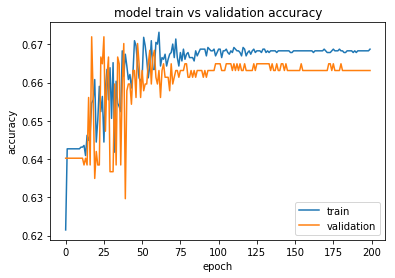

-------------------------------------------
Validate LSTM Course DDD - 2 Target Classes
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.56      0.31      0.40       204
          1       0.69      0.86      0.77       363

avg / total       0.64      0.66      0.63       567

Accuracy score: 0.663139329806
-------------------------------------------
Test LSTM Course DDD - 2 Target Classes
-------------------------------------------
Confusion Matrix for LSTM predictions:
[[113 245]
 [101 691]]
-------------------------------------------
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.53      0.32      0.40       358
          1       0.74      0.87      0.80       792

avg / total       0.67      0.70      0.67      1150

Accuracy score: 0.699130434783


In [77]:
# Split train & validation set
X_train, X_val, y_train, y_val = train_test_split(DDD_Train_Decile0, DDD_Train_Targets_1D, test_size=0.20, random_state=7)
X_train = X_train.astype('float32')
X_val = X_val.astype('float32')

DDD_model = Sequential()
DDD_model.add(Masking(mask_value=-1, input_shape =(DDD_Train_Decile0.shape[1],3) ))
DDD_model.add(LSTM(32, activation='sigmoid', return_sequences = True))
DDD_model.add(LSTM(32, activation='sigmoid', return_sequences = True))
DDD_model.add(LSTM(32, activation='sigmoid'))
DDD_model.add(Dense(1, activation='sigmoid'))

DDD_model.compile(optimizer=Adam(lr=0.001), loss='binary_crossentropy',metrics = ['accuracy'])
    
# Fit model for each timestep
ES = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=3, verbose=1, mode='auto')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5,
                              patience=10, verbose = 1, min_lr=0.000001, mode = "min", min_delta=0.001)
print('Fit LSTM Course DDD - 2 Target Classes')
    
history = DDD_model.fit(X_train, y_train, epochs=200, batch_size=32, verbose=1,
                       validation_data = (X_val, y_val), callbacks = [reduce_lr])

# plot train vs validation accuracy
pyplot.plot(history.history['acc'])
pyplot.plot(history.history['val_acc'])
pyplot.title('model train vs validation accuracy')
pyplot.ylabel('accuracy')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='lower right')
pyplot.show()
    
# Validate model
y_pred_DDD_val = DDD_model.predict(X_val)
y_classes_DDD_val = np.round(y_pred_DDD_val)
    
print('-------------------------------------------')
print('Validate LSTM Course DDD - 2 Target Classes')
print('Classification Report for LSTM predictions:')
print('-------------------------------------------')
print(classification_report(y_pred=y_classes_DDD_val, y_true=y_val))
print("Accuracy score: " + str(accuracy_score(y_pred=y_classes_DDD_val, y_true=y_val)))


# Test model
y_pred_DDD = DDD_model.predict(DDD_Test_Decile0)
y_classes_DDD = np.round(y_pred_DDD)
    
print('-------------------------------------------')
print('Test LSTM Course DDD - 2 Target Classes')
print('-------------------------------------------')
print('Confusion Matrix for LSTM predictions:')
print(confusion_matrix(y_pred=y_classes_DDD, y_true=DDD_Test_Targets_1D))
print('-------------------------------------------')
print('Classification Report for LSTM predictions:')
print('-------------------------------------------')
print(classification_report(y_pred=y_classes_DDD, y_true=DDD_Test_Targets_1D))
print("Accuracy score: " + str(accuracy_score(y_pred=y_classes_DDD, y_true=DDD_Test_Targets_1D)))

### DDD Decile 1

Fit LSTM Course DDD - 2 Target Classes
Train on 2264 samples, validate on 567 samples
Epoch 1/100
2264/2264 [==============================] - 5s 2ms/step - loss: 0.6590 - acc: 0.6427 - val_loss: 0.6530 - val_acc: 0.6402
Epoch 2/100
2264/2264 [==============================] - 3s 1ms/step - loss: 0.6554 - acc: 0.6427 - val_loss: 0.6496 - val_acc: 0.6402
Epoch 3/100
2264/2264 [==============================] - 3s 1ms/step - loss: 0.6041 - acc: 0.6745 - val_loss: 0.5482 - val_acc: 0.7390
Epoch 4/100
2264/2264 [==============================] - 3s 1ms/step - loss: 0.5440 - acc: 0.7376 - val_loss: 0.5312 - val_acc: 0.7584
Epoch 5/100
2264/2264 [==============================] - 3s 1ms/step - loss: 0.5332 - acc: 0.7363 - val_loss: 0.5224 - val_acc: 0.7654
Epoch 6/100
2264/2264 [==============================] - 3s 1ms/step - loss: 0.5222 - acc: 0.7527 - val_loss: 0.5175 - val_acc: 0.7690
Epoch 7/100
2264/2264 [==============================] - 3s 1ms/step - loss: 0.5180 - acc: 0.7473 - val_

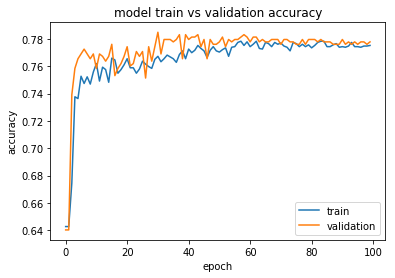

-------------------------------------------
Validate LSTM Course DDD - 2 Target Classes
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.73      0.61      0.66       204
          1       0.80      0.87      0.83       363

avg / total       0.77      0.78      0.77       567

Accuracy score: 0.777777777778
-------------------------------------------
Test LSTM Course DDD - 2 Target Classes
-------------------------------------------
Confusion Matrix for LSTM predictions:
[[152 206]
 [ 84 708]]
-------------------------------------------
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.64      0.42      0.51       358
          1       0.77      0.89      0.83       792

avg / total       0.73      0.75      0.73      1150

Accuracy score: 0.747826086957


In [78]:
# Split train & validation set
X_train, X_val, y_train, y_val = train_test_split(DDD_Train_Decile1, DDD_Train_Targets_1D, test_size=0.20, random_state=7)
X_train = X_train.astype('float32')
X_val = X_val.astype('float32')

DDD_model = Sequential()
DDD_model.add(Masking(mask_value=-1, input_shape =(DDD_Train_Decile1.shape[1],3) ))
DDD_model.add(LSTM(32, activation='sigmoid', return_sequences = True))
DDD_model.add(LSTM(32, activation='sigmoid', return_sequences = True))
DDD_model.add(LSTM(32, activation='sigmoid'))
DDD_model.add(Dense(1, activation='sigmoid'))

DDD_model.compile(optimizer=Adam(lr=0.005), loss='binary_crossentropy',metrics = ['accuracy'])
    
# Fit model for each timestep
ES = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=3, verbose=1, mode='auto')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5,
                              patience=10, verbose = 1, min_lr=0.000001, mode = "min", min_delta=0.001)
print('Fit LSTM Course DDD - 2 Target Classes')
    
history = DDD_model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1,
                       validation_data = (X_val, y_val), callbacks = [reduce_lr])

# plot train vs validation accuracy
pyplot.plot(history.history['acc'])
pyplot.plot(history.history['val_acc'])
pyplot.title('model train vs validation accuracy')
pyplot.ylabel('accuracy')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='lower right')
pyplot.show()
    
# Validate model
y_pred_DDD_val = DDD_model.predict(X_val)
y_classes_DDD_val = np.round(y_pred_DDD_val)
    
print('-------------------------------------------')
print('Validate LSTM Course DDD - 2 Target Classes')
print('Classification Report for LSTM predictions:')
print('-------------------------------------------')
print(classification_report(y_pred=y_classes_DDD_val, y_true=y_val))
print("Accuracy score: " + str(accuracy_score(y_pred=y_classes_DDD_val, y_true=y_val)))


# Test model
y_pred_DDD = DDD_model.predict(DDD_Test_Decile1)
y_classes_DDD = np.round(y_pred_DDD)
    
print('-------------------------------------------')
print('Test LSTM Course DDD - 2 Target Classes')
print('-------------------------------------------')
print('Confusion Matrix for LSTM predictions:')
print(confusion_matrix(y_pred=y_classes_DDD, y_true=DDD_Test_Targets_1D))
print('-------------------------------------------')
print('Classification Report for LSTM predictions:')
print('-------------------------------------------')
print(classification_report(y_pred=y_classes_DDD, y_true=DDD_Test_Targets_1D))
print("Accuracy score: " + str(accuracy_score(y_pred=y_classes_DDD, y_true=DDD_Test_Targets_1D)))

### DDD Decile 2

Fit LSTM Course DDD - 2 Target Classes
Train on 2264 samples, validate on 567 samples
Epoch 1/100
2264/2264 [==============================] - 6s 3ms/step - loss: 0.6628 - acc: 0.6369 - val_loss: 0.6532 - val_acc: 0.6402
Epoch 2/100
2264/2264 [==============================] - 4s 2ms/step - loss: 0.6543 - acc: 0.6427 - val_loss: 0.6527 - val_acc: 0.6402
Epoch 3/100
2264/2264 [==============================] - 4s 2ms/step - loss: 0.6153 - acc: 0.6758 - val_loss: 0.5198 - val_acc: 0.7407
Epoch 4/100
2264/2264 [==============================] - 4s 2ms/step - loss: 0.5158 - acc: 0.7602 - val_loss: 0.5034 - val_acc: 0.7566
Epoch 5/100
2264/2264 [==============================] - 4s 2ms/step - loss: 0.4864 - acc: 0.7716 - val_loss: 0.4934 - val_acc: 0.7549
Epoch 6/100
2264/2264 [==============================] - 4s 2ms/step - loss: 0.4876 - acc: 0.7686 - val_loss: 0.5040 - val_acc: 0.7478
Epoch 7/100
2264/2264 [==============================] - 4s 2ms/step - loss: 0.4960 - acc: 0.7725 - val_

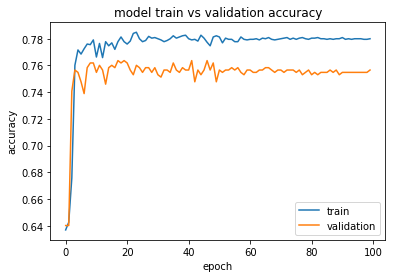

-------------------------------------------
Validate LSTM Course DDD - 2 Target Classes
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.71      0.55      0.62       204
          1       0.78      0.87      0.82       363

avg / total       0.75      0.76      0.75       567

Accuracy score: 0.756613756614
-------------------------------------------
Test LSTM Course DDD - 2 Target Classes
-------------------------------------------
Confusion Matrix for LSTM predictions:
[[180 178]
 [ 86 706]]
-------------------------------------------
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.68      0.50      0.58       358
          1       0.80      0.89      0.84       792

avg / total       0.76      0.77      0.76      1150

Accuracy score: 0.770434782609


In [79]:
# Split train & validation set
X_train, X_val, y_train, y_val = train_test_split(DDD_Train_Decile2, DDD_Train_Targets_1D, test_size=0.20, random_state=7)
X_train = X_train.astype('float32')
X_val = X_val.astype('float32')

DDD_model = Sequential()
DDD_model.add(Masking(mask_value=-1, input_shape =(DDD_Train_Decile2.shape[1],3) ))
DDD_model.add(LSTM(32, activation='sigmoid', return_sequences = True))
DDD_model.add(LSTM(32, activation='sigmoid', return_sequences = True))
DDD_model.add(LSTM(32, activation='sigmoid'))
DDD_model.add(Dense(1, activation='sigmoid'))

DDD_model.compile(optimizer=Adam(lr=0.005), loss='binary_crossentropy',metrics = ['accuracy'])
    
# Fit model for each timestep
ES = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=3, verbose=1, mode='auto')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5,
                              patience=10, verbose = 1, min_lr=0.000001, mode = "min", min_delta=0.001)
print('Fit LSTM Course DDD - 2 Target Classes')
    
history = DDD_model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1,
                       validation_data = (X_val, y_val), callbacks = [reduce_lr])

# plot train vs validation accuracy
pyplot.plot(history.history['acc'])
pyplot.plot(history.history['val_acc'])
pyplot.title('model train vs validation accuracy')
pyplot.ylabel('accuracy')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='lower right')
pyplot.show()
    
# Validate model
y_pred_DDD_val = DDD_model.predict(X_val)
y_classes_DDD_val = np.round(y_pred_DDD_val)
    
print('-------------------------------------------')
print('Validate LSTM Course DDD - 2 Target Classes')
print('Classification Report for LSTM predictions:')
print('-------------------------------------------')
print(classification_report(y_pred=y_classes_DDD_val, y_true=y_val))
print("Accuracy score: " + str(accuracy_score(y_pred=y_classes_DDD_val, y_true=y_val)))


# Test model
y_pred_DDD = DDD_model.predict(DDD_Test_Decile2)
y_classes_DDD = np.round(y_pred_DDD)
    
print('-------------------------------------------')
print('Test LSTM Course DDD - 2 Target Classes')
print('-------------------------------------------')
print('Confusion Matrix for LSTM predictions:')
print(confusion_matrix(y_pred=y_classes_DDD, y_true=DDD_Test_Targets_1D))
print('-------------------------------------------')
print('Classification Report for LSTM predictions:')
print('-------------------------------------------')
print(classification_report(y_pred=y_classes_DDD, y_true=DDD_Test_Targets_1D))
print("Accuracy score: " + str(accuracy_score(y_pred=y_classes_DDD, y_true=DDD_Test_Targets_1D)))

### DDD Decile 3

Fit LSTM Course DDD - 2 Target Classes
Train on 2264 samples, validate on 567 samples
Epoch 1/100
2264/2264 [==============================] - 8s 3ms/step - loss: 0.6584 - acc: 0.6383 - val_loss: 0.6541 - val_acc: 0.6402
Epoch 2/100
2264/2264 [==============================] - 6s 2ms/step - loss: 0.6475 - acc: 0.6427 - val_loss: 0.5963 - val_acc: 0.6402
Epoch 3/100
2264/2264 [==============================] - 6s 3ms/step - loss: 0.5297 - acc: 0.7544 - val_loss: 0.4788 - val_acc: 0.7725
Epoch 4/100
2264/2264 [==============================] - 6s 3ms/step - loss: 0.4778 - acc: 0.7765 - val_loss: 0.4678 - val_acc: 0.7760
Epoch 5/100
2264/2264 [==============================] - 6s 3ms/step - loss: 0.4788 - acc: 0.7761 - val_loss: 0.5020 - val_acc: 0.7654
Epoch 6/100
2264/2264 [==============================] - 6s 3ms/step - loss: 0.4731 - acc: 0.7792 - val_loss: 0.5007 - val_acc: 0.7601
Epoch 7/100
2264/2264 [==============================] - 6s 3ms/step - loss: 0.4761 - acc: 0.7853 - val_

2264/2264 [==============================] - 6s 3ms/step - loss: 0.4273 - acc: 0.7995 - val_loss: 0.4580 - val_acc: 0.7937

Epoch 00060: ReduceLROnPlateau reducing learning rate to 0.0012499999720603228.
Epoch 61/100
2264/2264 [==============================] - 7s 3ms/step - loss: 0.4225 - acc: 0.7968 - val_loss: 0.4561 - val_acc: 0.7848
Epoch 62/100
2264/2264 [==============================] - 7s 3ms/step - loss: 0.4224 - acc: 0.8039 - val_loss: 0.4531 - val_acc: 0.7937
Epoch 63/100
2264/2264 [==============================] - 6s 3ms/step - loss: 0.4257 - acc: 0.7973 - val_loss: 0.4499 - val_acc: 0.7884
Epoch 64/100
2264/2264 [==============================] - 7s 3ms/step - loss: 0.4227 - acc: 0.8026 - val_loss: 0.4496 - val_acc: 0.7848
Epoch 65/100
2264/2264 [==============================] - 7s 3ms/step - loss: 0.4204 - acc: 0.8070 - val_loss: 0.4475 - val_acc: 0.7884
Epoch 66/100
2264/2264 [==============================] - 8s 3ms/step - loss: 0.4207 - acc: 0.8061 - val_loss: 0.446

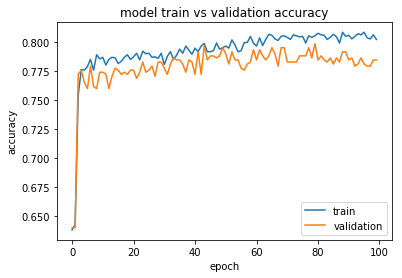

-------------------------------------------
Validate LSTM Course DDD - 2 Target Classes
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.75      0.60      0.67       204
          1       0.80      0.89      0.84       363

avg / total       0.78      0.78      0.78       567

Accuracy score: 0.784832451499
-------------------------------------------
Test LSTM Course DDD - 2 Target Classes
-------------------------------------------
Confusion Matrix for LSTM predictions:
[[223 135]
 [ 97 695]]
-------------------------------------------
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.70      0.62      0.66       358
          1       0.84      0.88      0.86       792

avg / total       0.79      0.80      0.79      1150

Accuracy score: 0.798260869565


In [80]:
# Split train & validation set
X_train, X_val, y_train, y_val = train_test_split(DDD_Train_Decile3, DDD_Train_Targets_1D, test_size=0.20, random_state=7)
X_train = X_train.astype('float32')
X_val = X_val.astype('float32')

DDD_model = Sequential()
DDD_model.add(Masking(mask_value=-1, input_shape =(DDD_Train_Decile3.shape[1],3) ))
DDD_model.add(LSTM(32, activation='sigmoid', return_sequences = True))
DDD_model.add(LSTM(32, activation='sigmoid', return_sequences = True))
DDD_model.add(LSTM(32, activation='sigmoid'))
DDD_model.add(Dense(1, activation='sigmoid'))

DDD_model.compile(optimizer=Adam(lr=0.005), loss='binary_crossentropy',metrics = ['accuracy'])
    
# Fit model for each timestep
ES = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=3, verbose=1, mode='auto')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5,
                              patience=10, verbose = 1, min_lr=0.000001, mode = "min", min_delta=0.001)
print('Fit LSTM Course DDD - 2 Target Classes')
    
history = DDD_model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1,
                       validation_data = (X_val, y_val), callbacks = [reduce_lr])

# plot train vs validation accuracy
pyplot.plot(history.history['acc'])
pyplot.plot(history.history['val_acc'])
pyplot.title('model train vs validation accuracy')
pyplot.ylabel('accuracy')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='lower right')
pyplot.show()
    
# Validate model
y_pred_DDD_val = DDD_model.predict(X_val)
y_classes_DDD_val = np.round(y_pred_DDD_val)
    
print('-------------------------------------------')
print('Validate LSTM Course DDD - 2 Target Classes')
print('Classification Report for LSTM predictions:')
print('-------------------------------------------')
print(classification_report(y_pred=y_classes_DDD_val, y_true=y_val))
print("Accuracy score: " + str(accuracy_score(y_pred=y_classes_DDD_val, y_true=y_val)))


# Test model
y_pred_DDD = DDD_model.predict(DDD_Test_Decile3)
y_classes_DDD = np.round(y_pred_DDD)
    
print('-------------------------------------------')
print('Test LSTM Course DDD - 2 Target Classes')
print('-------------------------------------------')
print('Confusion Matrix for LSTM predictions:')
print(confusion_matrix(y_pred=y_classes_DDD, y_true=DDD_Test_Targets_1D))
print('-------------------------------------------')
print('Classification Report for LSTM predictions:')
print('-------------------------------------------')
print(classification_report(y_pred=y_classes_DDD, y_true=DDD_Test_Targets_1D))
print("Accuracy score: " + str(accuracy_score(y_pred=y_classes_DDD, y_true=DDD_Test_Targets_1D)))

### DDD Decile 4

Fit LSTM Course DDD - 2 Target Classes
Train on 2264 samples, validate on 567 samples
Epoch 1/100
2264/2264 [==============================] - 11s 5ms/step - loss: 0.6575 - acc: 0.6427 - val_loss: 0.6551 - val_acc: 0.6402
Epoch 2/100
2264/2264 [==============================] - 9s 4ms/step - loss: 0.6530 - acc: 0.6427 - val_loss: 0.6478 - val_acc: 0.6402
Epoch 3/100
2264/2264 [==============================] - 9s 4ms/step - loss: 0.5335 - acc: 0.7328 - val_loss: 0.4829 - val_acc: 0.7619
Epoch 4/100
2264/2264 [==============================] - 9s 4ms/step - loss: 0.4507 - acc: 0.7937 - val_loss: 0.4705 - val_acc: 0.7795
Epoch 5/100
2264/2264 [==============================] - 9s 4ms/step - loss: 0.4585 - acc: 0.7809 - val_loss: 0.4454 - val_acc: 0.7954
Epoch 6/100
2264/2264 [==============================] - 9s 4ms/step - loss: 0.4554 - acc: 0.7845 - val_loss: 0.4522 - val_acc: 0.7901
Epoch 7/100
2264/2264 [==============================] - 9s 4ms/step - loss: 0.4449 - acc: 0.8030 - val

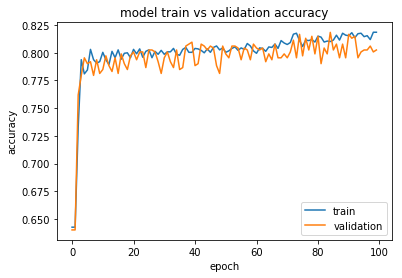

-------------------------------------------
Validate LSTM Course DDD - 2 Target Classes
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.79      0.61      0.69       204
          1       0.81      0.91      0.85       363

avg / total       0.80      0.80      0.80       567

Accuracy score: 0.802469135802
-------------------------------------------
Test LSTM Course DDD - 2 Target Classes
-------------------------------------------
Confusion Matrix for LSTM predictions:
[[253 105]
 [114 678]]
-------------------------------------------
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.69      0.71      0.70       358
          1       0.87      0.86      0.86       792

avg / total       0.81      0.81      0.81      1150

Accuracy score: 0.809565217391


In [81]:
# Split train & validation set
X_train, X_val, y_train, y_val = train_test_split(DDD_Train_Decile4, DDD_Train_Targets_1D, test_size=0.20, random_state=7)
X_train = X_train.astype('float32')
X_val = X_val.astype('float32')

DDD_model = Sequential()
DDD_model.add(Masking(mask_value=-1, input_shape =(DDD_Train_Decile4.shape[1],3) ))
DDD_model.add(LSTM(32, activation='sigmoid', return_sequences = True))
DDD_model.add(LSTM(32, activation='sigmoid', return_sequences = True))
DDD_model.add(LSTM(32, activation='sigmoid'))
DDD_model.add(Dense(1, activation='sigmoid'))

DDD_model.compile(optimizer=Adam(lr=0.005), loss='binary_crossentropy',metrics = ['accuracy'])
    
# Fit model for each timestep
ES = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=3, verbose=1, mode='auto')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5,
                              patience=10, verbose = 1, min_lr=0.000001, mode = "min", min_delta=0.001)
print('Fit LSTM Course DDD - 2 Target Classes')
    
history = DDD_model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1,
                       validation_data = (X_val, y_val), callbacks = [reduce_lr])

# plot train vs validation accuracy
pyplot.plot(history.history['acc'])
pyplot.plot(history.history['val_acc'])
pyplot.title('model train vs validation accuracy')
pyplot.ylabel('accuracy')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='lower right')
pyplot.show()
    
# Validate model
y_pred_DDD_val = DDD_model.predict(X_val)
y_classes_DDD_val = np.round(y_pred_DDD_val)
    
print('-------------------------------------------')
print('Validate LSTM Course DDD - 2 Target Classes')
print('Classification Report for LSTM predictions:')
print('-------------------------------------------')
print(classification_report(y_pred=y_classes_DDD_val, y_true=y_val))
print("Accuracy score: " + str(accuracy_score(y_pred=y_classes_DDD_val, y_true=y_val)))


# Test model
y_pred_DDD = DDD_model.predict(DDD_Test_Decile4)
y_classes_DDD = np.round(y_pred_DDD)
    
print('-------------------------------------------')
print('Test LSTM Course DDD - 2 Target Classes')
print('-------------------------------------------')
print('Confusion Matrix for LSTM predictions:')
print(confusion_matrix(y_pred=y_classes_DDD, y_true=DDD_Test_Targets_1D))
print('-------------------------------------------')
print('Classification Report for LSTM predictions:')
print('-------------------------------------------')
print(classification_report(y_pred=y_classes_DDD, y_true=DDD_Test_Targets_1D))
print("Accuracy score: " + str(accuracy_score(y_pred=y_classes_DDD, y_true=DDD_Test_Targets_1D)))

### DDD Decile 5

Fit LSTM Course DDD - 2 Target Classes
Train on 2264 samples, validate on 567 samples
Epoch 1/100
2264/2264 [==============================] - 13s 6ms/step - loss: 0.6559 - acc: 0.6347 - val_loss: 0.6508 - val_acc: 0.6402
Epoch 2/100
2264/2264 [==============================] - 9s 4ms/step - loss: 0.6012 - acc: 0.6943 - val_loss: 0.5264 - val_acc: 0.7584
Epoch 3/100
2264/2264 [==============================] - 10s 4ms/step - loss: 0.4438 - acc: 0.8043 - val_loss: 0.4198 - val_acc: 0.7954
Epoch 4/100
2264/2264 [==============================] - 10s 4ms/step - loss: 0.4225 - acc: 0.8092 - val_loss: 0.4052 - val_acc: 0.8095
Epoch 5/100
2264/2264 [==============================] - 10s 5ms/step - loss: 0.4240 - acc: 0.8057 - val_loss: 0.4707 - val_acc: 0.7672
Epoch 6/100
2264/2264 [==============================] - 10s 5ms/step - loss: 0.4225 - acc: 0.8110 - val_loss: 0.4068 - val_acc: 0.8131
Epoch 7/100
2264/2264 [==============================] - 10s 4ms/step - loss: 0.4187 - acc: 0.8096 

Epoch 60/100
2264/2264 [==============================] - 9s 4ms/step - loss: 0.3683 - acc: 0.8379 - val_loss: 0.3441 - val_acc: 0.8377
Epoch 61/100
2264/2264 [==============================] - 9s 4ms/step - loss: 0.3684 - acc: 0.8326 - val_loss: 0.3468 - val_acc: 0.8342
Epoch 62/100
2264/2264 [==============================] - 9s 4ms/step - loss: 0.3626 - acc: 0.8322 - val_loss: 0.3596 - val_acc: 0.8377
Epoch 63/100
2264/2264 [==============================] - 10s 5ms/step - loss: 0.3634 - acc: 0.8352 - val_loss: 0.3447 - val_acc: 0.8377
Epoch 64/100
2264/2264 [==============================] - 11s 5ms/step - loss: 0.3666 - acc: 0.8308 - val_loss: 0.3439 - val_acc: 0.8430
Epoch 65/100
2264/2264 [==============================] - 12s 5ms/step - loss: 0.3625 - acc: 0.8277 - val_loss: 0.3453 - val_acc: 0.8377
Epoch 66/100
2264/2264 [==============================] - 10s 5ms/step - loss: 0.3653 - acc: 0.8330 - val_loss: 0.3416 - val_acc: 0.8395
Epoch 67/100
2264/2264 [====================

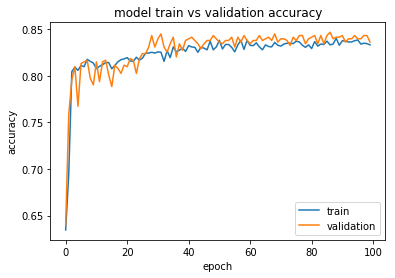

-------------------------------------------
Validate LSTM Course DDD - 2 Target Classes
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.88      0.63      0.74       204
          1       0.82      0.95      0.88       363

avg / total       0.84      0.84      0.83       567

Accuracy score: 0.835978835979
-------------------------------------------
Test LSTM Course DDD - 2 Target Classes
-------------------------------------------
Confusion Matrix for LSTM predictions:
[[233 125]
 [ 69 723]]
-------------------------------------------
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.77      0.65      0.71       358
          1       0.85      0.91      0.88       792

avg / total       0.83      0.83      0.83      1150

Accuracy score: 0.831304347826


In [82]:
# Split train & validation set
X_train, X_val, y_train, y_val = train_test_split(DDD_Train_Decile5, DDD_Train_Targets_1D, test_size=0.20, random_state=7)
X_train = X_train.astype('float32')
X_val = X_val.astype('float32')

DDD_model = Sequential()
DDD_model.add(Masking(mask_value=-1, input_shape =(DDD_Train_Decile5.shape[1],3) ))
DDD_model.add(LSTM(32, activation='sigmoid', return_sequences = True))
DDD_model.add(LSTM(32, activation='sigmoid', return_sequences = True))
DDD_model.add(LSTM(32, activation='sigmoid'))
DDD_model.add(Dense(1, activation='sigmoid'))

DDD_model.compile(optimizer=Adam(lr=0.005), loss='binary_crossentropy',metrics = ['accuracy'])
    
# Fit model for each timestep
ES = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=3, verbose=1, mode='auto')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5,
                              patience=10, verbose = 1, min_lr=0.000001, mode = "min", min_delta=0.001)
print('Fit LSTM Course DDD - 2 Target Classes')
    
history = DDD_model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1,
                       validation_data = (X_val, y_val), callbacks = [reduce_lr])

# plot train vs validation accuracy
pyplot.plot(history.history['acc'])
pyplot.plot(history.history['val_acc'])
pyplot.title('model train vs validation accuracy')
pyplot.ylabel('accuracy')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='lower right')
pyplot.show()
    
# Validate model
y_pred_DDD_val = DDD_model.predict(X_val)
y_classes_DDD_val = np.round(y_pred_DDD_val)
    
print('-------------------------------------------')
print('Validate LSTM Course DDD - 2 Target Classes')
print('Classification Report for LSTM predictions:')
print('-------------------------------------------')
print(classification_report(y_pred=y_classes_DDD_val, y_true=y_val))
print("Accuracy score: " + str(accuracy_score(y_pred=y_classes_DDD_val, y_true=y_val)))


# Test model
y_pred_DDD = DDD_model.predict(DDD_Test_Decile5)
y_classes_DDD = np.round(y_pred_DDD)
    
print('-------------------------------------------')
print('Test LSTM Course DDD - 2 Target Classes')
print('-------------------------------------------')
print('Confusion Matrix for LSTM predictions:')
print(confusion_matrix(y_pred=y_classes_DDD, y_true=DDD_Test_Targets_1D))
print('-------------------------------------------')
print('Classification Report for LSTM predictions:')
print('-------------------------------------------')
print(classification_report(y_pred=y_classes_DDD, y_true=DDD_Test_Targets_1D))
print("Accuracy score: " + str(accuracy_score(y_pred=y_classes_DDD, y_true=DDD_Test_Targets_1D)))

### DDD Decile 6

Fit LSTM Course DDD - 2 Target Classes
Train on 2264 samples, validate on 567 samples
Epoch 1/100
2264/2264 [==============================] - 13s 6ms/step - loss: 0.6558 - acc: 0.6427 - val_loss: 0.6531 - val_acc: 0.6402
Epoch 2/100
2264/2264 [==============================] - 10s 5ms/step - loss: 0.6429 - acc: 0.6515 - val_loss: 0.6528 - val_acc: 0.6402
Epoch 3/100
2264/2264 [==============================] - 11s 5ms/step - loss: 0.6248 - acc: 0.6665 - val_loss: 0.6701 - val_acc: 0.6402
Epoch 4/100
2264/2264 [==============================] - 10s 5ms/step - loss: 0.6552 - acc: 0.6427 - val_loss: 0.6527 - val_acc: 0.6402
Epoch 5/100
2264/2264 [==============================] - 10s 5ms/step - loss: 0.6519 - acc: 0.6427 - val_loss: 0.6518 - val_acc: 0.6402
Epoch 6/100
2264/2264 [==============================] - 10s 5ms/step - loss: 0.6481 - acc: 0.6427 - val_loss: 0.6467 - val_acc: 0.6402
Epoch 7/100
2264/2264 [==============================] - 10s 4ms/step - loss: 0.5657 - acc: 0.6952

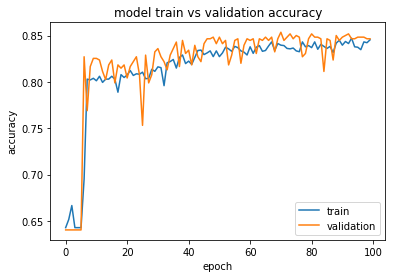

-------------------------------------------
Validate LSTM Course DDD - 2 Target Classes
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.87      0.67      0.76       204
          1       0.84      0.94      0.89       363

avg / total       0.85      0.85      0.84       567

Accuracy score: 0.846560846561
-------------------------------------------
Test LSTM Course DDD - 2 Target Classes
-------------------------------------------
Confusion Matrix for LSTM predictions:
[[209 149]
 [ 50 742]]
-------------------------------------------
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.81      0.58      0.68       358
          1       0.83      0.94      0.88       792

avg / total       0.82      0.83      0.82      1150

Accuracy score: 0.826956521739


In [83]:
# Split train & validation set
X_train, X_val, y_train, y_val = train_test_split(DDD_Train_Decile6, DDD_Train_Targets_1D, test_size=0.20, random_state=7)
X_train = X_train.astype('float32')
X_val = X_val.astype('float32')

DDD_model = Sequential()
DDD_model.add(Masking(mask_value=-1, input_shape =(DDD_Train_Decile6.shape[1],3) ))
DDD_model.add(LSTM(32, activation='sigmoid', return_sequences = True))
DDD_model.add(LSTM(32, activation='sigmoid', return_sequences = True))
DDD_model.add(LSTM(32, activation='sigmoid'))
DDD_model.add(Dense(1, activation='sigmoid'))

DDD_model.compile(optimizer=Adam(lr=0.005), loss='binary_crossentropy',metrics = ['accuracy'])
    
# Fit model for each timestep
ES = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=3, verbose=1, mode='auto')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5,
                              patience=10, verbose = 1, min_lr=0.000001, mode = "min", min_delta=0.001)
print('Fit LSTM Course DDD - 2 Target Classes')
    
history = DDD_model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1,
                       validation_data = (X_val, y_val), callbacks = [reduce_lr])

# plot train vs validation accuracy
pyplot.plot(history.history['acc'])
pyplot.plot(history.history['val_acc'])
pyplot.title('model train vs validation accuracy')
pyplot.ylabel('accuracy')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='lower right')
pyplot.show()
    
# Validate model
y_pred_DDD_val = DDD_model.predict(X_val)
y_classes_DDD_val = np.round(y_pred_DDD_val)
    
print('-------------------------------------------')
print('Validate LSTM Course DDD - 2 Target Classes')
print('Classification Report for LSTM predictions:')
print('-------------------------------------------')
print(classification_report(y_pred=y_classes_DDD_val, y_true=y_val))
print("Accuracy score: " + str(accuracy_score(y_pred=y_classes_DDD_val, y_true=y_val)))


# Test model
y_pred_DDD = DDD_model.predict(DDD_Test_Decile6)
y_classes_DDD = np.round(y_pred_DDD)
    
print('-------------------------------------------')
print('Test LSTM Course DDD - 2 Target Classes')
print('-------------------------------------------')
print('Confusion Matrix for LSTM predictions:')
print(confusion_matrix(y_pred=y_classes_DDD, y_true=DDD_Test_Targets_1D))
print('-------------------------------------------')
print('Classification Report for LSTM predictions:')
print('-------------------------------------------')
print(classification_report(y_pred=y_classes_DDD, y_true=DDD_Test_Targets_1D))
print("Accuracy score: " + str(accuracy_score(y_pred=y_classes_DDD, y_true=DDD_Test_Targets_1D)))

### DDD Decile 7

Fit LSTM Course DDD - 2 Target Classes
Train on 2264 samples, validate on 567 samples
Epoch 1/100
2264/2264 [==============================] - 14s 6ms/step - loss: 0.6558 - acc: 0.6365 - val_loss: 0.6552 - val_acc: 0.6402
Epoch 2/100
2264/2264 [==============================] - 12s 5ms/step - loss: 0.5763 - acc: 0.6864 - val_loss: 0.5477 - val_acc: 0.7637
Epoch 3/100
2264/2264 [==============================] - 12s 5ms/step - loss: 0.4203 - acc: 0.8057 - val_loss: 0.4301 - val_acc: 0.7778
Epoch 4/100
2264/2264 [==============================] - 12s 5ms/step - loss: 0.4149 - acc: 0.8105 - val_loss: 0.3885 - val_acc: 0.8183
Epoch 5/100
2264/2264 [==============================] - 12s 5ms/step - loss: 0.3992 - acc: 0.8048 - val_loss: 0.3709 - val_acc: 0.8413
Epoch 6/100
2264/2264 [==============================] - 12s 5ms/step - loss: 0.4037 - acc: 0.8110 - val_loss: 0.3952 - val_acc: 0.8078
Epoch 7/100
2264/2264 [==============================] - 12s 5ms/step - loss: 0.4103 - acc: 0.8079

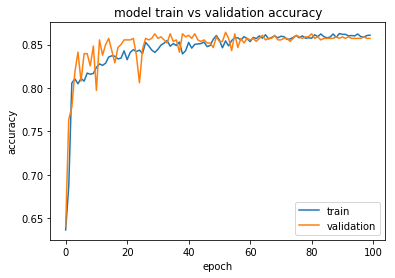

-------------------------------------------
Validate LSTM Course DDD - 2 Target Classes
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.90      0.68      0.77       204
          1       0.84      0.96      0.90       363

avg / total       0.86      0.86      0.85       567

Accuracy score: 0.857142857143
-------------------------------------------
Test LSTM Course DDD - 2 Target Classes
-------------------------------------------
Confusion Matrix for LSTM predictions:
[[226 132]
 [ 70 722]]
-------------------------------------------
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.76      0.63      0.69       358
          1       0.85      0.91      0.88       792

avg / total       0.82      0.82      0.82      1150

Accuracy score: 0.824347826087


In [ ]:
# Split train & validation set
X_train, X_val, y_train, y_val = train_test_split(DDD_Train_Decile7, DDD_Train_Targets_1D, test_size=0.20, random_state=7)
X_train = X_train.astype('float32')
X_val = X_val.astype('float32')

DDD_model = Sequential()
DDD_model.add(Masking(mask_value=-1, input_shape =(DDD_Train_Decile7.shape[1],3) ))
DDD_model.add(LSTM(32, activation='sigmoid', return_sequences = True))
DDD_model.add(LSTM(32, activation='sigmoid', return_sequences = True))
DDD_model.add(LSTM(32, activation='sigmoid'))
DDD_model.add(Dense(1, activation='sigmoid'))

DDD_model.compile(optimizer=Adam(lr=0.005), loss='binary_crossentropy',metrics = ['accuracy'])
    
# Fit model for each timestep
ES = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=3, verbose=1, mode='auto')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5,
                              patience=10, verbose = 1, min_lr=0.000001, mode = "min", min_delta=0.001)
print('Fit LSTM Course DDD - 2 Target Classes')
    
history = DDD_model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1,
                       validation_data = (X_val, y_val), callbacks = [reduce_lr])

# plot train vs validation accuracy
pyplot.plot(history.history['acc'])
pyplot.plot(history.history['val_acc'])
pyplot.title('model train vs validation accuracy')
pyplot.ylabel('accuracy')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='lower right')
pyplot.show()
    
# Validate model
y_pred_DDD_val = DDD_model.predict(X_val)
y_classes_DDD_val = np.round(y_pred_DDD_val)
    
print('-------------------------------------------')
print('Validate LSTM Course DDD - 2 Target Classes')
print('Classification Report for LSTM predictions:')
print('-------------------------------------------')
print(classification_report(y_pred=y_classes_DDD_val, y_true=y_val))
print("Accuracy score: " + str(accuracy_score(y_pred=y_classes_DDD_val, y_true=y_val)))


# Test model
y_pred_DDD = DDD_model.predict(DDD_Test_Decile7)
y_classes_DDD = np.round(y_pred_DDD)
    
print('-------------------------------------------')
print('Test LSTM Course DDD - 2 Target Classes')
print('-------------------------------------------')
print('Confusion Matrix for LSTM predictions:')
print(confusion_matrix(y_pred=y_classes_DDD, y_true=DDD_Test_Targets_1D))
print('-------------------------------------------')
print('Classification Report for LSTM predictions:')
print('-------------------------------------------')
print(classification_report(y_pred=y_classes_DDD, y_true=DDD_Test_Targets_1D))
print("Accuracy score: " + str(accuracy_score(y_pred=y_classes_DDD, y_true=DDD_Test_Targets_1D)))

### DDD Decile 8

Fit LSTM Course DDD - 2 Target Classes
Train on 2264 samples, validate on 567 samples
Epoch 1/100
2264/2264 [==============================] - 17s 7ms/step - loss: 0.6604 - acc: 0.6347 - val_loss: 0.6533 - val_acc: 0.6402
Epoch 2/100
2264/2264 [==============================] - 14s 6ms/step - loss: 0.6457 - acc: 0.6427 - val_loss: 0.5958 - val_acc: 0.6402
Epoch 3/100
2264/2264 [==============================] - 13s 6ms/step - loss: 0.4813 - acc: 0.7619 - val_loss: 0.3684 - val_acc: 0.8377
Epoch 4/100
2264/2264 [==============================] - 13s 6ms/step - loss: 0.3970 - acc: 0.8132 - val_loss: 0.3567 - val_acc: 0.8413
Epoch 5/100
2264/2264 [==============================] - 13s 6ms/step - loss: 0.3964 - acc: 0.8163 - val_loss: 0.3497 - val_acc: 0.8554
Epoch 6/100
2264/2264 [==============================] - 13s 6ms/step - loss: 0.3863 - acc: 0.8193 - val_loss: 0.3955 - val_acc: 0.8042
Epoch 7/100
2264/2264 [==============================] - 13s 6ms/step - loss: 0.3982 - acc: 0.8110

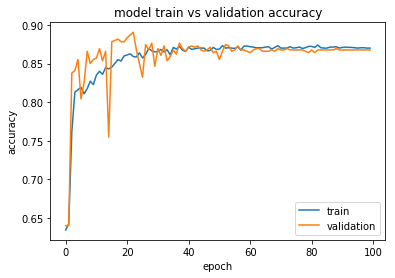

-------------------------------------------
Validate LSTM Course DDD - 2 Target Classes
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.91      0.70      0.79       204
          1       0.85      0.96      0.90       363

avg / total       0.87      0.87      0.86       567

Accuracy score: 0.867724867725
-------------------------------------------
Test LSTM Course DDD - 2 Target Classes
-------------------------------------------
Confusion Matrix for LSTM predictions:
[[190 168]
 [ 25 767]]
-------------------------------------------
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.88      0.53      0.66       358
          1       0.82      0.97      0.89       792

avg / total       0.84      0.83      0.82      1150

Accuracy score: 0.832173913043


In [39]:
# Split train & validation set
X_train, X_val, y_train, y_val = train_test_split(DDD_Train_Decile8, DDD_Train_Targets_1D, test_size=0.20, random_state=7)
X_train = X_train.astype('float32')
X_val = X_val.astype('float32')

DDD_model = Sequential()
DDD_model.add(Masking(mask_value=-1, input_shape =(DDD_Train_Decile8.shape[1],3) ))
DDD_model.add(LSTM(32, activation='sigmoid', return_sequences = True))
DDD_model.add(LSTM(32, activation='sigmoid', return_sequences = True))
DDD_model.add(LSTM(32, activation='sigmoid'))
DDD_model.add(Dense(1, activation='sigmoid'))

DDD_model.compile(optimizer=Adam(lr=0.005), loss='binary_crossentropy',metrics = ['accuracy'])
    
# Fit model for each timestep
ES = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=3, verbose=1, mode='auto')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5,
                              patience=10, verbose = 1, min_lr=0.000001, mode = "min", min_delta=0.001)
print('Fit LSTM Course DDD - 2 Target Classes')
    
history = DDD_model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1,
                       validation_data = (X_val, y_val), callbacks = [reduce_lr])

# plot train vs validation accuracy
pyplot.plot(history.history['acc'])
pyplot.plot(history.history['val_acc'])
pyplot.title('model train vs validation accuracy')
pyplot.ylabel('accuracy')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='lower right')
pyplot.show()
    
# Validate model
y_pred_DDD_val = DDD_model.predict(X_val)
y_classes_DDD_val = np.round(y_pred_DDD_val)
    
print('-------------------------------------------')
print('Validate LSTM Course DDD - 2 Target Classes')
print('Classification Report for LSTM predictions:')
print('-------------------------------------------')
print(classification_report(y_pred=y_classes_DDD_val, y_true=y_val))
print("Accuracy score: " + str(accuracy_score(y_pred=y_classes_DDD_val, y_true=y_val)))


# Test model
y_pred_DDD = DDD_model.predict(DDD_Test_Decile8)
y_classes_DDD = np.round(y_pred_DDD)
    
print('-------------------------------------------')
print('Test LSTM Course DDD - 2 Target Classes')
print('-------------------------------------------')
print('Confusion Matrix for LSTM predictions:')
print(confusion_matrix(y_pred=y_classes_DDD, y_true=DDD_Test_Targets_1D))
print('-------------------------------------------')
print('Classification Report for LSTM predictions:')
print('-------------------------------------------')
print(classification_report(y_pred=y_classes_DDD, y_true=DDD_Test_Targets_1D))
print("Accuracy score: " + str(accuracy_score(y_pred=y_classes_DDD, y_true=DDD_Test_Targets_1D)))

### DDD Decile 9

Fit LSTM Course DDD - 2 Target Classes
Train on 2264 samples, validate on 567 samples
Epoch 1/100
2264/2264 [==============================] - 20s 9ms/step - loss: 0.6570 - acc: 0.6427 - val_loss: 0.6550 - val_acc: 0.6402
Epoch 2/100
2264/2264 [==============================] - 20s 9ms/step - loss: 0.6234 - acc: 0.6621 - val_loss: 0.5904 - val_acc: 0.7549
Epoch 3/100
2264/2264 [==============================] - 20s 9ms/step - loss: 0.4099 - acc: 0.8163 - val_loss: 0.3284 - val_acc: 0.8589
Epoch 4/100
2264/2264 [==============================] - 19s 9ms/step - loss: 0.3862 - acc: 0.8264 - val_loss: 0.3075 - val_acc: 0.8677
Epoch 5/100
2264/2264 [==============================] - 15s 7ms/step - loss: 0.3844 - acc: 0.8273 - val_loss: 0.3013 - val_acc: 0.8748
Epoch 6/100
2264/2264 [==============================] - 15s 7ms/step - loss: 0.3581 - acc: 0.8441 - val_loss: 0.3221 - val_acc: 0.8536
Epoch 7/100
2264/2264 [==============================] - 15s 7ms/step - loss: 0.3779 - acc: 0.8383

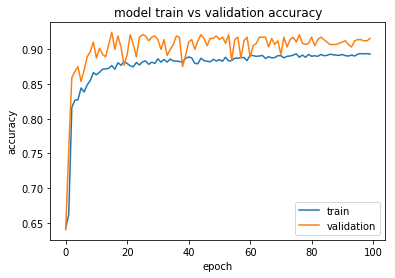

-------------------------------------------
Validate LSTM Course DDD - 2 Target Classes
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.97      0.79      0.87       204
          1       0.89      0.99      0.94       363

avg / total       0.92      0.92      0.91       567

Accuracy score: 0.915343915344
-------------------------------------------
Test LSTM Course DDD - 2 Target Classes
-------------------------------------------
Confusion Matrix for LSTM predictions:
[[260  98]
 [ 77 715]]
-------------------------------------------
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.77      0.73      0.75       358
          1       0.88      0.90      0.89       792

avg / total       0.85      0.85      0.85      1150

Accuracy score: 0.847826086957


In [ ]:
# Split train & validation set
X_train, X_val, y_train, y_val = train_test_split(DDD_Train_Decile9, DDD_Train_Targets_1D, test_size=0.20, random_state=7)
X_train = X_train.astype('float32')
X_val = X_val.astype('float32')

DDD_model = Sequential()
DDD_model.add(Masking(mask_value=-1, input_shape =(DDD_Train_Decile9.shape[1],3) ))
DDD_model.add(LSTM(32, activation='sigmoid', return_sequences = True))
DDD_model.add(LSTM(32, activation='sigmoid', return_sequences = True))
DDD_model.add(LSTM(32, activation='sigmoid'))
DDD_model.add(Dense(1, activation='sigmoid'))

DDD_model.compile(optimizer=Adam(lr=0.005), loss='binary_crossentropy',metrics = ['accuracy'])
    
# Fit model for each timestep
ES = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=3, verbose=1, mode='auto')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5,
                              patience=10, verbose = 1, min_lr=0.000001, mode = "min", min_delta=0.001)
print('Fit LSTM Course DDD - 2 Target Classes')
    
history = DDD_model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1,
                       validation_data = (X_val, y_val), callbacks = [reduce_lr])

# plot train vs validation accuracy
pyplot.plot(history.history['acc'])
pyplot.plot(history.history['val_acc'])
pyplot.title('model train vs validation accuracy')
pyplot.ylabel('accuracy')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='lower right')
pyplot.show()
    
# Validate model
y_pred_DDD_val = DDD_model.predict(X_val)
y_classes_DDD_val = np.round(y_pred_DDD_val)
    
print('-------------------------------------------')
print('Validate LSTM Course DDD - 2 Target Classes')
print('Classification Report for LSTM predictions:')
print('-------------------------------------------')
print(classification_report(y_pred=y_classes_DDD_val, y_true=y_val))
print("Accuracy score: " + str(accuracy_score(y_pred=y_classes_DDD_val, y_true=y_val)))


# Test model
y_pred_DDD = DDD_model.predict(DDD_Test_Decile9)
y_classes_DDD = np.round(y_pred_DDD)
    
print('-------------------------------------------')
print('Test LSTM Course DDD - 2 Target Classes')
print('-------------------------------------------')
print('Confusion Matrix for LSTM predictions:')
print(confusion_matrix(y_pred=y_classes_DDD, y_true=DDD_Test_Targets_1D))
print('-------------------------------------------')
print('Classification Report for LSTM predictions:')
print('-------------------------------------------')
print(classification_report(y_pred=y_classes_DDD, y_true=DDD_Test_Targets_1D))
print("Accuracy score: " + str(accuracy_score(y_pred=y_classes_DDD, y_true=DDD_Test_Targets_1D)))

### DDD Decile 10

Fit LSTM Course DDD - 2 Target Classes
Train on 2264 samples, validate on 567 samples
Epoch 1/70
2264/2264 [==============================] - 24s 11ms/step - loss: 0.6550 - acc: 0.6427 - val_loss: 0.6564 - val_acc: 0.6402
Epoch 2/70
2264/2264 [==============================] - 17s 7ms/step - loss: 0.5427 - acc: 0.7138 - val_loss: 0.3697 - val_acc: 0.8360
Epoch 3/70
2264/2264 [==============================] - 17s 7ms/step - loss: 0.3980 - acc: 0.8110 - val_loss: 0.3319 - val_acc: 0.8589
Epoch 4/70
2264/2264 [==============================] - 17s 7ms/step - loss: 0.3762 - acc: 0.8295 - val_loss: 0.3393 - val_acc: 0.8413
Epoch 5/70
2264/2264 [==============================] - 17s 7ms/step - loss: 0.3623 - acc: 0.8445 - val_loss: 0.3016 - val_acc: 0.8765
Epoch 6/70
2264/2264 [==============================] - 17s 7ms/step - loss: 0.3537 - acc: 0.8494 - val_loss: 0.2760 - val_acc: 0.8942
Epoch 7/70
2264/2264 [==============================] - 17s 7ms/step - loss: 0.3730 - acc: 0.8370 - val

2264/2264 [==============================] - 17s 7ms/step - loss: 0.2452 - acc: 0.8905 - val_loss: 0.2183 - val_acc: 0.9171
Epoch 61/70
2264/2264 [==============================] - 17s 7ms/step - loss: 0.2444 - acc: 0.8958 - val_loss: 0.2123 - val_acc: 0.9083
Epoch 62/70
2264/2264 [==============================] - 17s 7ms/step - loss: 0.2450 - acc: 0.8922 - val_loss: 0.2176 - val_acc: 0.9189
Epoch 63/70
2264/2264 [==============================] - 17s 7ms/step - loss: 0.2432 - acc: 0.8905 - val_loss: 0.2204 - val_acc: 0.9030
Epoch 64/70
2264/2264 [==============================] - 17s 7ms/step - loss: 0.2451 - acc: 0.8913 - val_loss: 0.2157 - val_acc: 0.9118

Epoch 00064: ReduceLROnPlateau reducing learning rate to 0.0012499999720603228.
Epoch 65/70
2264/2264 [==============================] - 17s 7ms/step - loss: 0.2428 - acc: 0.8927 - val_loss: 0.2161 - val_acc: 0.9048
Epoch 66/70
2264/2264 [==============================] - 17s 7ms/step - loss: 0.2403 - acc: 0.8931 - val_loss: 0.21

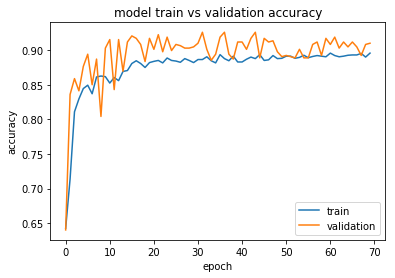

-------------------------------------------
Validate LSTM Course DDD - 2 Target Classes
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.95      0.79      0.86       204
          1       0.89      0.98      0.93       363

avg / total       0.91      0.91      0.91       567

Accuracy score: 0.910052910053
-------------------------------------------
Test LSTM Course DDD - 2 Target Classes
-------------------------------------------
Confusion Matrix for LSTM predictions:
[[252 106]
 [ 34 758]]
-------------------------------------------
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.88      0.70      0.78       358
          1       0.88      0.96      0.92       792

avg / total       0.88      0.88      0.87      1150

Accuracy score: 0.878260869565


In [72]:
# Split train & validation set
X_train, X_val, y_train, y_val = train_test_split(DDD_Train_3D, DDD_Train_Targets_1D, test_size=0.20, random_state=7)
X_train = X_train.astype('float32')
X_val = X_val.astype('float32')

DDD_model = Sequential()
DDD_model.add(Masking(mask_value=-1, input_shape =(DDD_Train_Decile10.shape[1],3) ))
DDD_model.add(LSTM(32, activation='sigmoid', return_sequences = True))
DDD_model.add(LSTM(32, activation='sigmoid', return_sequences = True))
DDD_model.add(LSTM(32, activation='sigmoid'))
DDD_model.add(Dense(1, activation='sigmoid'))

DDD_model.compile(optimizer=Adam(lr=0.005), loss='binary_crossentropy',metrics = ['accuracy'])
    
# Fit model for each timestep
ES = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=3, verbose=1, mode='auto')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5,
                              patience=10, verbose = 1, min_lr=0.000001, mode = "min", min_delta=0.001)
print('Fit LSTM Course DDD - 2 Target Classes')
    
history = DDD_model.fit(X_train, y_train, epochs=70, batch_size=32, verbose=1,
                       validation_data = (X_val, y_val), callbacks = [reduce_lr])

# plot train vs validation accuracy
pyplot.plot(history.history['acc'])
pyplot.plot(history.history['val_acc'])
pyplot.title('model train vs validation accuracy')
pyplot.ylabel('accuracy')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='lower right')
pyplot.show()
    
# Validate model
y_pred_DDD_val = DDD_model.predict(X_val)
y_classes_DDD_val = np.round(y_pred_DDD_val)
    
print('-------------------------------------------')
print('Validate LSTM Course DDD - 2 Target Classes')
print('Classification Report for LSTM predictions:')
print('-------------------------------------------')
print(classification_report(y_pred=y_classes_DDD_val, y_true=y_val))
print("Accuracy score: " + str(accuracy_score(y_pred=y_classes_DDD_val, y_true=y_val)))


# Test model
y_pred_DDD = DDD_model.predict(DDD_Test_3D)
y_classes_DDD = np.round(y_pred_DDD)
    
print('-------------------------------------------')
print('Test LSTM Course DDD - 2 Target Classes')
print('-------------------------------------------')
print('Confusion Matrix for LSTM predictions:')
print(confusion_matrix(y_pred=y_classes_DDD, y_true=DDD_Test_Targets_1D))
print('-------------------------------------------')
print('Classification Report for LSTM predictions:')
print('-------------------------------------------')
print(classification_report(y_pred=y_classes_DDD, y_true=DDD_Test_Targets_1D))
print("Accuracy score: " + str(accuracy_score(y_pred=y_classes_DDD, y_true=DDD_Test_Targets_1D)))

# FFF LSTMs for every timestep

### FFF Pre-course (Decile 0)

Fit LSTM Course FFF - 2 Target Classes
Train on 3055 samples, validate on 764 samples
Epoch 1/100
3055/3055 [==============================] - 4s 1ms/step - loss: 0.6457 - acc: 0.6573 - val_loss: 0.6248 - val_acc: 0.6846
Epoch 2/100
3055/3055 [==============================] - 2s 618us/step - loss: 0.6438 - acc: 0.6573 - val_loss: 0.6279 - val_acc: 0.6846
Epoch 3/100
3055/3055 [==============================] - 2s 610us/step - loss: 0.6378 - acc: 0.6576 - val_loss: 0.6254 - val_acc: 0.6846
Epoch 4/100
3055/3055 [==============================] - 2s 585us/step - loss: 0.6223 - acc: 0.6520 - val_loss: 0.5879 - val_acc: 0.6819
Epoch 5/100
3055/3055 [==============================] - 2s 567us/step - loss: 0.6113 - acc: 0.6638 - val_loss: 0.6074 - val_acc: 0.6453
Epoch 6/100
3055/3055 [==============================] - 2s 572us/step - loss: 0.6095 - acc: 0.6589 - val_loss: 0.5860 - val_acc: 0.6976
Epoch 7/100
3055/3055 [==============================] - 2s 569us/step - loss: 0.6056 - acc: 0

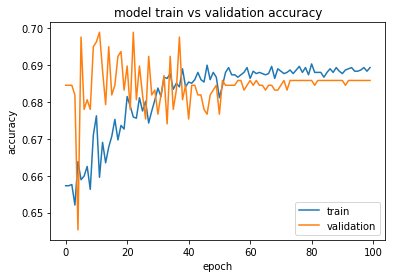

-------------------------------------------
Validate LSTM Course FFF - 2 Target Classes
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.50      0.29      0.37       241
          1       0.73      0.87      0.79       523

avg / total       0.66      0.69      0.66       764

Accuracy score: 0.685863874346
-------------------------------------------
Test LSTM Course FFF - 2 Target Classes
-------------------------------------------
Confusion Matrix for LSTM predictions:
[[124 263]
 [156 961]]
-------------------------------------------
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.44      0.32      0.37       387
          1       0.79      0.86      0.82      1117

avg / total       0.70      0.72      0.71      1504

Accuracy score: 0.721409574468


In [40]:
# Split train & validation set
X_train, X_val, y_train, y_val = train_test_split(FFF_Train_Decile0, FFF_Train_Targets_1D, test_size=0.20, random_state=7)
X_train = X_train.astype('float32')
X_val = X_val.astype('float32')

FFF_model = Sequential()
FFF_model.add(Masking(mask_value=-1, input_shape =(FFF_Train_Decile0.shape[1],3) ))
FFF_model.add(LSTM(32, activation='sigmoid', return_sequences = True))
FFF_model.add(LSTM(32, activation='sigmoid', return_sequences = True))
FFF_model.add(LSTM(32, activation='sigmoid'))
FFF_model.add(Dense(1, activation='sigmoid'))

FFF_model.compile(optimizer=Adam(lr=0.005), loss='binary_crossentropy',metrics = ['accuracy'])
    
# Fit model for each timestep
ES = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=3, verbose=1, mode='auto')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5,
                              patience=10, verbose = 1, min_lr=0.000001, mode = "min", min_delta=0.001)
print('Fit LSTM Course FFF - 2 Target Classes')
    
history = FFF_model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1,
                       validation_data = (X_val, y_val), callbacks = [reduce_lr])

# plot train vs validation accuracy
pyplot.plot(history.history['acc'])
pyplot.plot(history.history['val_acc'])
pyplot.title('model train vs validation accuracy')
pyplot.ylabel('accuracy')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='lower right')
pyplot.show()
    
# Validate model
y_pred_FFF_val = FFF_model.predict(X_val)
y_classes_FFF_val = np.round(y_pred_FFF_val)
    
print('-------------------------------------------')
print('Validate LSTM Course FFF - 2 Target Classes')
print('Classification Report for LSTM predictions:')
print('-------------------------------------------')
print(classification_report(y_pred=y_classes_FFF_val, y_true=y_val))
print("Accuracy score: " + str(accuracy_score(y_pred=y_classes_FFF_val, y_true=y_val)))


# Test model
y_pred_FFF = FFF_model.predict(FFF_Test_Decile0)
y_classes_FFF = np.round(y_pred_FFF)
    
print('-------------------------------------------')
print('Test LSTM Course FFF - 2 Target Classes')
print('-------------------------------------------')
print('Confusion Matrix for LSTM predictions:')
print(confusion_matrix(y_pred=y_classes_FFF, y_true=FFF_Test_Targets_1D))
print('-------------------------------------------')
print('Classification Report for LSTM predictions:')
print('-------------------------------------------')
print(classification_report(y_pred=y_classes_FFF, y_true=FFF_Test_Targets_1D))
print("Accuracy score: " + str(accuracy_score(y_pred=y_classes_FFF, y_true=FFF_Test_Targets_1D)))

### FFF Decile 1

Fit LSTM Course FFF - 2 Target Classes
Train on 3055 samples, validate on 764 samples
Epoch 1/100
3055/3055 [==============================] - 6s 2ms/step - loss: 0.6459 - acc: 0.6547 - val_loss: 0.6112 - val_acc: 0.6846
Epoch 2/100
3055/3055 [==============================] - 4s 1ms/step - loss: 0.5774 - acc: 0.7028 - val_loss: 0.5391 - val_acc: 0.7330
Epoch 3/100
3055/3055 [==============================] - 4s 1ms/step - loss: 0.5605 - acc: 0.7244 - val_loss: 0.5483 - val_acc: 0.7356
Epoch 4/100
3055/3055 [==============================] - 4s 1ms/step - loss: 0.5610 - acc: 0.7136 - val_loss: 0.5274 - val_acc: 0.7304
Epoch 5/100
3055/3055 [==============================] - 4s 1ms/step - loss: 0.5567 - acc: 0.7093 - val_loss: 0.5338 - val_acc: 0.7343
Epoch 6/100
3055/3055 [==============================] - 4s 1ms/step - loss: 0.5597 - acc: 0.7172 - val_loss: 0.5487 - val_acc: 0.7343
Epoch 7/100
3055/3055 [==============================] - 4s 1ms/step - loss: 0.5561 - acc: 0.7198 - val_

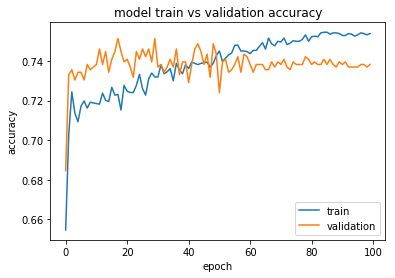

-------------------------------------------
Validate LSTM Course FFF - 2 Target Classes
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.61      0.47      0.53       241
          1       0.78      0.86      0.82       523

avg / total       0.73      0.74      0.73       764

Accuracy score: 0.738219895288
-------------------------------------------
Test LSTM Course FFF - 2 Target Classes
-------------------------------------------
Confusion Matrix for LSTM predictions:
[[212 175]
 [227 890]]
-------------------------------------------
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.48      0.55      0.51       387
          1       0.84      0.80      0.82      1117

avg / total       0.74      0.73      0.74      1504

Accuracy score: 0.732712765957


In [41]:
# Split train & validation set
X_train, X_val, y_train, y_val = train_test_split(FFF_Train_Decile1, FFF_Train_Targets_1D, test_size=0.20, random_state=7)
X_train = X_train.astype('float32')
X_val = X_val.astype('float32')

FFF_model = Sequential()
FFF_model.add(Masking(mask_value=-1, input_shape =(FFF_Train_Decile1.shape[1],3) ))
FFF_model.add(LSTM(32, activation='sigmoid', return_sequences = True))
FFF_model.add(LSTM(32, activation='sigmoid', return_sequences = True))
FFF_model.add(LSTM(32, activation='sigmoid'))
FFF_model.add(Dense(1, activation='sigmoid'))

FFF_model.compile(optimizer=Adam(lr=0.01), loss='binary_crossentropy',metrics = ['accuracy'])
    
# Fit model for each timestep
ES = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=3, verbose=1, mode='auto')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5,
                              patience=10, verbose = 1, min_lr=0.000001, mode = "min", min_delta=0.001)
print('Fit LSTM Course FFF - 2 Target Classes')
    
history = FFF_model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1,
                       validation_data = (X_val, y_val), callbacks = [reduce_lr])

# plot train vs validation accuracy
pyplot.plot(history.history['acc'])
pyplot.plot(history.history['val_acc'])
pyplot.title('model train vs validation accuracy')
pyplot.ylabel('accuracy')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='lower right')
pyplot.show()
    
# Validate model
y_pred_FFF_val = FFF_model.predict(X_val)
y_classes_FFF_val = np.round(y_pred_FFF_val)
    
print('-------------------------------------------')
print('Validate LSTM Course FFF - 2 Target Classes')
print('Classification Report for LSTM predictions:')
print('-------------------------------------------')
print(classification_report(y_pred=y_classes_FFF_val, y_true=y_val))
print("Accuracy score: " + str(accuracy_score(y_pred=y_classes_FFF_val, y_true=y_val)))


# Test model
y_pred_FFF = FFF_model.predict(FFF_Test_Decile1)
y_classes_FFF = np.round(y_pred_FFF)
    
print('-------------------------------------------')
print('Test LSTM Course FFF - 2 Target Classes')
print('-------------------------------------------')
print('Confusion Matrix for LSTM predictions:')
print(confusion_matrix(y_pred=y_classes_FFF, y_true=FFF_Test_Targets_1D))
print('-------------------------------------------')
print('Classification Report for LSTM predictions:')
print('-------------------------------------------')
print(classification_report(y_pred=y_classes_FFF, y_true=FFF_Test_Targets_1D))
print("Accuracy score: " + str(accuracy_score(y_pred=y_classes_FFF, y_true=FFF_Test_Targets_1D)))

### FFF Decile 2

Fit LSTM Course FFF - 2 Target Classes
Train on 3055 samples, validate on 764 samples
Epoch 1/100
3055/3055 [==============================] - 8s 3ms/step - loss: 0.6541 - acc: 0.6468 - val_loss: 0.6266 - val_acc: 0.6846
Epoch 2/100
3055/3055 [==============================] - 6s 2ms/step - loss: 0.6002 - acc: 0.6835 - val_loss: 0.4863 - val_acc: 0.7709
Epoch 3/100
3055/3055 [==============================] - 6s 2ms/step - loss: 0.5157 - acc: 0.7493 - val_loss: 0.5044 - val_acc: 0.7579
Epoch 4/100
3055/3055 [==============================] - 6s 2ms/step - loss: 0.5048 - acc: 0.7571 - val_loss: 0.5204 - val_acc: 0.7461
Epoch 5/100
3055/3055 [==============================] - 6s 2ms/step - loss: 0.4979 - acc: 0.7709 - val_loss: 0.4944 - val_acc: 0.7696
Epoch 6/100
3055/3055 [==============================] - 6s 2ms/step - loss: 0.4945 - acc: 0.7624 - val_loss: 0.4835 - val_acc: 0.7749
Epoch 7/100
3055/3055 [==============================] - 6s 2ms/step - loss: 0.4934 - acc: 0.7660 - val_


Epoch 00058: ReduceLROnPlateau reducing learning rate to 0.0003124999930150807.
Epoch 59/100
3055/3055 [==============================] - 6s 2ms/step - loss: 0.4700 - acc: 0.7794 - val_loss: 0.4763 - val_acc: 0.7736
Epoch 60/100
3055/3055 [==============================] - 7s 2ms/step - loss: 0.4702 - acc: 0.7748 - val_loss: 0.4779 - val_acc: 0.7866
Epoch 61/100
3055/3055 [==============================] - 6s 2ms/step - loss: 0.4699 - acc: 0.7777 - val_loss: 0.4786 - val_acc: 0.7853
Epoch 62/100
3055/3055 [==============================] - 6s 2ms/step - loss: 0.4706 - acc: 0.7735 - val_loss: 0.4805 - val_acc: 0.7814
Epoch 63/100
3055/3055 [==============================] - 6s 2ms/step - loss: 0.4697 - acc: 0.7764 - val_loss: 0.4791 - val_acc: 0.7827
Epoch 64/100
3055/3055 [==============================] - 6s 2ms/step - loss: 0.4695 - acc: 0.7771 - val_loss: 0.4775 - val_acc: 0.7866
Epoch 65/100
3055/3055 [==============================] - 6s 2ms/step - loss: 0.4693 - acc: 0.7748 - va

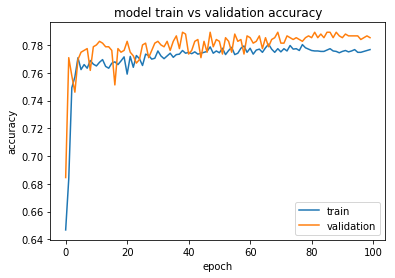

-------------------------------------------
Validate LSTM Course FFF - 2 Target Classes
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.69      0.58      0.63       241
          1       0.82      0.88      0.85       523

avg / total       0.78      0.79      0.78       764

Accuracy score: 0.785340314136
-------------------------------------------
Test LSTM Course FFF - 2 Target Classes
-------------------------------------------
Confusion Matrix for LSTM predictions:
[[249 138]
 [169 948]]
-------------------------------------------
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.60      0.64      0.62       387
          1       0.87      0.85      0.86      1117

avg / total       0.80      0.80      0.80      1504

Accuracy score: 0.795877659574


In [42]:
# Split train & validation set
X_train, X_val, y_train, y_val = train_test_split(FFF_Train_Decile2, FFF_Train_Targets_1D, test_size=0.20, random_state=7)
X_train = X_train.astype('float32')
X_val = X_val.astype('float32')

FFF_model = Sequential()
FFF_model.add(Masking(mask_value=-1, input_shape =(FFF_Train_Decile2.shape[1],3) ))
FFF_model.add(LSTM(32, activation='sigmoid', return_sequences = True))
FFF_model.add(LSTM(32, activation='sigmoid', return_sequences = True))
FFF_model.add(LSTM(32, activation='sigmoid'))
FFF_model.add(Dense(1, activation='sigmoid'))

FFF_model.compile(optimizer=Adam(lr=0.005), loss='binary_crossentropy',metrics = ['accuracy'])
    
# Fit model for each timestep
ES = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=3, verbose=1, mode='auto')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5,
                              patience=10, verbose = 1, min_lr=0.000001, mode = "min", min_delta=0.001)
print('Fit LSTM Course FFF - 2 Target Classes')
    
history = FFF_model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1,
                       validation_data = (X_val, y_val), callbacks = [reduce_lr])

# plot train vs validation accuracy
pyplot.plot(history.history['acc'])
pyplot.plot(history.history['val_acc'])
pyplot.title('model train vs validation accuracy')
pyplot.ylabel('accuracy')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='lower right')
pyplot.show()
    
# Validate model
y_pred_FFF_val = FFF_model.predict(X_val)
y_classes_FFF_val = np.round(y_pred_FFF_val)
    
print('-------------------------------------------')
print('Validate LSTM Course FFF - 2 Target Classes')
print('Classification Report for LSTM predictions:')
print('-------------------------------------------')
print(classification_report(y_pred=y_classes_FFF_val, y_true=y_val))
print("Accuracy score: " + str(accuracy_score(y_pred=y_classes_FFF_val, y_true=y_val)))


# Test model
y_pred_FFF = FFF_model.predict(FFF_Test_Decile2)
y_classes_FFF = np.round(y_pred_FFF)
    
print('-------------------------------------------')
print('Test LSTM Course FFF - 2 Target Classes')
print('-------------------------------------------')
print('Confusion Matrix for LSTM predictions:')
print(confusion_matrix(y_pred=y_classes_FFF, y_true=FFF_Test_Targets_1D))
print('-------------------------------------------')
print('Classification Report for LSTM predictions:')
print('-------------------------------------------')
print(classification_report(y_pred=y_classes_FFF, y_true=FFF_Test_Targets_1D))
print("Accuracy score: " + str(accuracy_score(y_pred=y_classes_FFF, y_true=FFF_Test_Targets_1D)))

### FFF Decile 3

Fit LSTM Course FFF - 2 Target Classes
Train on 3055 samples, validate on 764 samples
Epoch 1/100
3055/3055 [==============================] - 9s 3ms/step - loss: 0.6472 - acc: 0.6534 - val_loss: 0.6384 - val_acc: 0.6846
Epoch 2/100
3055/3055 [==============================] - 7s 2ms/step - loss: 0.5867 - acc: 0.6949 - val_loss: 0.5482 - val_acc: 0.7094
Epoch 3/100
3055/3055 [==============================] - 7s 2ms/step - loss: 0.4923 - acc: 0.7542 - val_loss: 0.4798 - val_acc: 0.7775
Epoch 4/100
3055/3055 [==============================] - 8s 3ms/step - loss: 0.4860 - acc: 0.7646 - val_loss: 0.4536 - val_acc: 0.7906
Epoch 5/100
3055/3055 [==============================] - 8s 2ms/step - loss: 0.4804 - acc: 0.7663 - val_loss: 0.4653 - val_acc: 0.7749
Epoch 6/100
3055/3055 [==============================] - 7s 2ms/step - loss: 0.4794 - acc: 0.7712 - val_loss: 0.4531 - val_acc: 0.7866
Epoch 7/100
3055/3055 [==============================] - 7s 2ms/step - loss: 0.4776 - acc: 0.7755 - val_

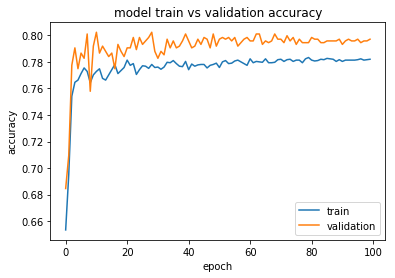

-------------------------------------------
Validate LSTM Course FFF - 2 Target Classes
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.72      0.59      0.65       241
          1       0.82      0.89      0.86       523

avg / total       0.79      0.80      0.79       764

Accuracy score: 0.797120418848
-------------------------------------------
Test LSTM Course FFF - 2 Target Classes
-------------------------------------------
Confusion Matrix for LSTM predictions:
[[ 233  154]
 [ 104 1013]]
-------------------------------------------
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.69      0.60      0.64       387
          1       0.87      0.91      0.89      1117

avg / total       0.82      0.83      0.82      1504

Accuracy score: 0.828457446809


In [43]:
# Split train & validation set
X_train, X_val, y_train, y_val = train_test_split(FFF_Train_Decile3, FFF_Train_Targets_1D, test_size=0.20, random_state=7)
X_train = X_train.astype('float32')
X_val = X_val.astype('float32')

FFF_model = Sequential()
FFF_model.add(Masking(mask_value=-1, input_shape =(FFF_Train_Decile3.shape[1],3) ))
FFF_model.add(LSTM(32, activation='sigmoid', return_sequences = True))
FFF_model.add(LSTM(32, activation='sigmoid', return_sequences = True))
FFF_model.add(LSTM(32, activation='sigmoid'))
FFF_model.add(Dense(1, activation='sigmoid'))

FFF_model.compile(optimizer=Adam(lr=0.005), loss='binary_crossentropy',metrics = ['accuracy'])
    
# Fit model for each timestep
ES = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=3, verbose=1, mode='auto')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5,
                              patience=10, verbose = 1, min_lr=0.000001, mode = "min", min_delta=0.001)
print('Fit LSTM Course FFF - 2 Target Classes')
    
history = FFF_model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1,
                       validation_data = (X_val, y_val), callbacks = [reduce_lr])

# plot train vs validation accuracy
pyplot.plot(history.history['acc'])
pyplot.plot(history.history['val_acc'])
pyplot.title('model train vs validation accuracy')
pyplot.ylabel('accuracy')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='lower right')
pyplot.show()
    
# Validate model
y_pred_FFF_val = FFF_model.predict(X_val)
y_classes_FFF_val = np.round(y_pred_FFF_val)
    
print('-------------------------------------------')
print('Validate LSTM Course FFF - 2 Target Classes')
print('Classification Report for LSTM predictions:')
print('-------------------------------------------')
print(classification_report(y_pred=y_classes_FFF_val, y_true=y_val))
print("Accuracy score: " + str(accuracy_score(y_pred=y_classes_FFF_val, y_true=y_val)))


# Test model
y_pred_FFF = FFF_model.predict(FFF_Test_Decile3)
y_classes_FFF = np.round(y_pred_FFF)
    
print('-------------------------------------------')
print('Test LSTM Course FFF - 2 Target Classes')
print('-------------------------------------------')
print('Confusion Matrix for LSTM predictions:')
print(confusion_matrix(y_pred=y_classes_FFF, y_true=FFF_Test_Targets_1D))
print('-------------------------------------------')
print('Classification Report for LSTM predictions:')
print('-------------------------------------------')
print(classification_report(y_pred=y_classes_FFF, y_true=FFF_Test_Targets_1D))
print("Accuracy score: " + str(accuracy_score(y_pred=y_classes_FFF, y_true=FFF_Test_Targets_1D)))

### FFF Decile 4

Fit LSTM Course FFF - 2 Target Classes
Train on 3055 samples, validate on 764 samples
Epoch 1/100
3055/3055 [==============================] - 11s 4ms/step - loss: 0.6464 - acc: 0.6573 - val_loss: 0.6266 - val_acc: 0.6846
Epoch 2/100
3055/3055 [==============================] - 9s 3ms/step - loss: 0.5137 - acc: 0.7434 - val_loss: 0.3977 - val_acc: 0.8285
Epoch 3/100
3055/3055 [==============================] - 10s 3ms/step - loss: 0.4567 - acc: 0.7921 - val_loss: 0.4093 - val_acc: 0.8312
Epoch 4/100
3055/3055 [==============================] - 9s 3ms/step - loss: 0.4445 - acc: 0.7987 - val_loss: 0.3980 - val_acc: 0.8272
Epoch 5/100
3055/3055 [==============================] - 9s 3ms/step - loss: 0.4332 - acc: 0.8088 - val_loss: 0.3938 - val_acc: 0.8312
Epoch 6/100
3055/3055 [==============================] - 9s 3ms/step - loss: 0.4355 - acc: 0.8092 - val_loss: 0.4095 - val_acc: 0.8259
Epoch 7/100
3055/3055 [==============================] - 9s 3ms/step - loss: 0.4326 - acc: 0.8124 - va

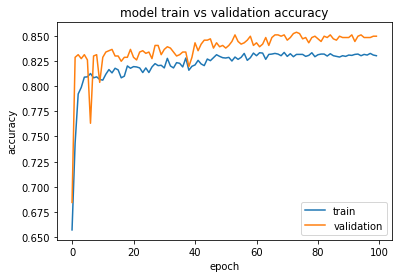

-------------------------------------------
Validate LSTM Course FFF - 2 Target Classes
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.82      0.67      0.74       241
          1       0.86      0.93      0.89       523

avg / total       0.85      0.85      0.84       764

Accuracy score: 0.849476439791
-------------------------------------------
Test LSTM Course FFF - 2 Target Classes
-------------------------------------------
Confusion Matrix for LSTM predictions:
[[ 239  148]
 [  78 1039]]
-------------------------------------------
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.75      0.62      0.68       387
          1       0.88      0.93      0.90      1117

avg / total       0.84      0.85      0.84      1504

Accuracy score: 0.849734042553


In [44]:
# Split train & validation set
X_train, X_val, y_train, y_val = train_test_split(FFF_Train_Decile4, FFF_Train_Targets_1D, test_size=0.20, random_state=7)
X_train = X_train.astype('float32')
X_val = X_val.astype('float32')

FFF_model = Sequential()
FFF_model.add(Masking(mask_value=-1, input_shape =(FFF_Train_Decile4.shape[1],3) ))
FFF_model.add(LSTM(32, activation='sigmoid', return_sequences = True))
FFF_model.add(LSTM(32, activation='sigmoid', return_sequences = True))
FFF_model.add(LSTM(32, activation='sigmoid'))
FFF_model.add(Dense(1, activation='sigmoid'))

FFF_model.compile(optimizer=Adam(lr=0.005), loss='binary_crossentropy',metrics = ['accuracy'])
    
# Fit model for each timestep
ES = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=3, verbose=1, mode='auto')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5,
                              patience=10, verbose = 1, min_lr=0.000001, mode = "min", min_delta=0.001)
print('Fit LSTM Course FFF - 2 Target Classes')
    
history = FFF_model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1,
                       validation_data = (X_val, y_val), callbacks = [reduce_lr])

# plot train vs validation accuracy
pyplot.plot(history.history['acc'])
pyplot.plot(history.history['val_acc'])
pyplot.title('model train vs validation accuracy')
pyplot.ylabel('accuracy')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='lower right')
pyplot.show()
    
# Validate model
y_pred_FFF_val = FFF_model.predict(X_val)
y_classes_FFF_val = np.round(y_pred_FFF_val)
    
print('-------------------------------------------')
print('Validate LSTM Course FFF - 2 Target Classes')
print('Classification Report for LSTM predictions:')
print('-------------------------------------------')
print(classification_report(y_pred=y_classes_FFF_val, y_true=y_val))
print("Accuracy score: " + str(accuracy_score(y_pred=y_classes_FFF_val, y_true=y_val)))


# Test model
y_pred_FFF = FFF_model.predict(FFF_Test_Decile4)
y_classes_FFF = np.round(y_pred_FFF)
    
print('-------------------------------------------')
print('Test LSTM Course FFF - 2 Target Classes')
print('-------------------------------------------')
print('Confusion Matrix for LSTM predictions:')
print(confusion_matrix(y_pred=y_classes_FFF, y_true=FFF_Test_Targets_1D))
print('-------------------------------------------')
print('Classification Report for LSTM predictions:')
print('-------------------------------------------')
print(classification_report(y_pred=y_classes_FFF, y_true=FFF_Test_Targets_1D))
print("Accuracy score: " + str(accuracy_score(y_pred=y_classes_FFF, y_true=FFF_Test_Targets_1D)))

### FFF Decile 5

Fit LSTM Course FFF - 2 Target Classes
Train on 3055 samples, validate on 764 samples
Epoch 1/100
3055/3055 [==============================] - 13s 4ms/step - loss: 0.6450 - acc: 0.6573 - val_loss: 0.6238 - val_acc: 0.6846
Epoch 2/100
3055/3055 [==============================] - 11s 4ms/step - loss: 0.5730 - acc: 0.6966 - val_loss: 0.4349 - val_acc: 0.8141
Epoch 3/100
3055/3055 [==============================] - 11s 4ms/step - loss: 0.4466 - acc: 0.8020 - val_loss: 0.4228 - val_acc: 0.8168
Epoch 4/100
3055/3055 [==============================] - 11s 4ms/step - loss: 0.4350 - acc: 0.8010 - val_loss: 0.4279 - val_acc: 0.7984
Epoch 5/100
3055/3055 [==============================] - 11s 4ms/step - loss: 0.4285 - acc: 0.8059 - val_loss: 0.4055 - val_acc: 0.8259
Epoch 6/100
3055/3055 [==============================] - 11s 4ms/step - loss: 0.4271 - acc: 0.8101 - val_loss: 0.4081 - val_acc: 0.8312
Epoch 7/100
3055/3055 [==============================] - 11s 4ms/step - loss: 0.4229 - acc: 0.8118

3055/3055 [==============================] - 11s 4ms/step - loss: 0.3389 - acc: 0.8553 - val_loss: 0.3450 - val_acc: 0.8534
Epoch 60/100
3055/3055 [==============================] - 12s 4ms/step - loss: 0.3392 - acc: 0.8514 - val_loss: 0.3407 - val_acc: 0.8639
Epoch 61/100
3055/3055 [==============================] - 12s 4ms/step - loss: 0.3379 - acc: 0.8543 - val_loss: 0.3453 - val_acc: 0.8508
Epoch 62/100
3055/3055 [==============================] - 11s 4ms/step - loss: 0.3401 - acc: 0.8507 - val_loss: 0.3393 - val_acc: 0.8573
Epoch 63/100
3055/3055 [==============================] - 11s 4ms/step - loss: 0.3378 - acc: 0.8543 - val_loss: 0.3348 - val_acc: 0.8599
Epoch 64/100
3055/3055 [==============================] - 12s 4ms/step - loss: 0.3385 - acc: 0.8527 - val_loss: 0.3449 - val_acc: 0.8560

Epoch 00064: ReduceLROnPlateau reducing learning rate to 0.0006249999860301614.
Epoch 65/100
3055/3055 [==============================] - 11s 4ms/step - loss: 0.3358 - acc: 0.8560 - val_loss

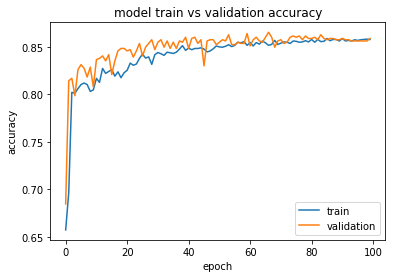

-------------------------------------------
Validate LSTM Course FFF - 2 Target Classes
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.81      0.72      0.76       241
          1       0.88      0.92      0.90       523

avg / total       0.86      0.86      0.86       764

Accuracy score: 0.858638743455
-------------------------------------------
Test LSTM Course FFF - 2 Target Classes
-------------------------------------------
Confusion Matrix for LSTM predictions:
[[ 254  133]
 [  47 1070]]
-------------------------------------------
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.84      0.66      0.74       387
          1       0.89      0.96      0.92      1117

avg / total       0.88      0.88      0.88      1504

Accuracy score: 0.880319148936


In [45]:
# Split train & validation set
X_train, X_val, y_train, y_val = train_test_split(FFF_Train_Decile5, FFF_Train_Targets_1D, test_size=0.20, random_state=7)
X_train = X_train.astype('float32')
X_val = X_val.astype('float32')

FFF_model = Sequential()
FFF_model.add(Masking(mask_value=-1, input_shape =(FFF_Train_Decile5.shape[1],3) ))
FFF_model.add(LSTM(32, activation='sigmoid', return_sequences = True))
FFF_model.add(LSTM(32, activation='sigmoid', return_sequences = True))
FFF_model.add(LSTM(32, activation='sigmoid'))
FFF_model.add(Dense(1, activation='sigmoid'))

FFF_model.compile(optimizer=Adam(lr=0.005), loss='binary_crossentropy',metrics = ['accuracy'])
    
# Fit model for each timestep
ES = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=3, verbose=1, mode='auto')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5,
                              patience=10, verbose = 1, min_lr=0.000001, mode = "min", min_delta=0.001)
print('Fit LSTM Course FFF - 2 Target Classes')
    
history = FFF_model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1,
                       validation_data = (X_val, y_val), callbacks = [reduce_lr])

# plot train vs validation accuracy
pyplot.plot(history.history['acc'])
pyplot.plot(history.history['val_acc'])
pyplot.title('model train vs validation accuracy')
pyplot.ylabel('accuracy')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='lower right')
pyplot.show()
    
# Validate model
y_pred_FFF_val = FFF_model.predict(X_val)
y_classes_FFF_val = np.round(y_pred_FFF_val)
    
print('-------------------------------------------')
print('Validate LSTM Course FFF - 2 Target Classes')
print('Classification Report for LSTM predictions:')
print('-------------------------------------------')
print(classification_report(y_pred=y_classes_FFF_val, y_true=y_val))
print("Accuracy score: " + str(accuracy_score(y_pred=y_classes_FFF_val, y_true=y_val)))


# Test model
y_pred_FFF = FFF_model.predict(FFF_Test_Decile5)
y_classes_FFF = np.round(y_pred_FFF)
    
print('-------------------------------------------')
print('Test LSTM Course FFF - 2 Target Classes')
print('-------------------------------------------')
print('Confusion Matrix for LSTM predictions:')
print(confusion_matrix(y_pred=y_classes_FFF, y_true=FFF_Test_Targets_1D))
print('-------------------------------------------')
print('Classification Report for LSTM predictions:')
print('-------------------------------------------')
print(classification_report(y_pred=y_classes_FFF, y_true=FFF_Test_Targets_1D))
print("Accuracy score: " + str(accuracy_score(y_pred=y_classes_FFF, y_true=FFF_Test_Targets_1D)))

### FFF Decile 6

Fit LSTM Course FFF - 2 Target Classes
Train on 3055 samples, validate on 764 samples
Epoch 1/100
3055/3055 [==============================] - 15s 5ms/step - loss: 0.6459 - acc: 0.6573 - val_loss: 0.6101 - val_acc: 0.6846
Epoch 2/100
3055/3055 [==============================] - 12s 4ms/step - loss: 0.4606 - acc: 0.7810 - val_loss: 0.4002 - val_acc: 0.8429
Epoch 3/100
3055/3055 [==============================] - 12s 4ms/step - loss: 0.3845 - acc: 0.8383 - val_loss: 0.4054 - val_acc: 0.8089
Epoch 4/100
3055/3055 [==============================] - 12s 4ms/step - loss: 0.3721 - acc: 0.8442 - val_loss: 0.3770 - val_acc: 0.8508
Epoch 5/100
3055/3055 [==============================] - 12s 4ms/step - loss: 0.3708 - acc: 0.8501 - val_loss: 0.3763 - val_acc: 0.8364
Epoch 6/100
3055/3055 [==============================] - 12s 4ms/step - loss: 0.3615 - acc: 0.8527 - val_loss: 0.3705 - val_acc: 0.8482
Epoch 7/100
3055/3055 [==============================] - 12s 4ms/step - loss: 0.3705 - acc: 0.8455

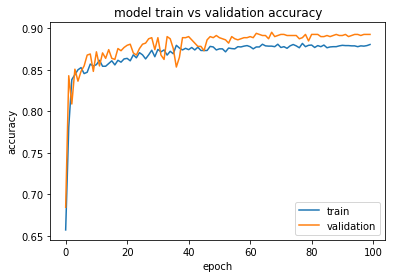

-------------------------------------------
Validate LSTM Course FFF - 2 Target Classes
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.88      0.77      0.82       241
          1       0.90      0.95      0.92       523

avg / total       0.89      0.89      0.89       764

Accuracy score: 0.892670157068
-------------------------------------------
Test LSTM Course FFF - 2 Target Classes
-------------------------------------------
Confusion Matrix for LSTM predictions:
[[ 276  111]
 [  56 1061]]
-------------------------------------------
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.83      0.71      0.77       387
          1       0.91      0.95      0.93      1117

avg / total       0.89      0.89      0.89      1504

Accuracy score: 0.888962765957


In [46]:
# Split train & validation set
X_train, X_val, y_train, y_val = train_test_split(FFF_Train_Decile6, FFF_Train_Targets_1D, test_size=0.20, random_state=7)
X_train = X_train.astype('float32')
X_val = X_val.astype('float32')

FFF_model = Sequential()
FFF_model.add(Masking(mask_value=-1, input_shape =(FFF_Train_Decile6.shape[1],3) ))
FFF_model.add(LSTM(32, activation='sigmoid', return_sequences = True))
FFF_model.add(LSTM(32, activation='sigmoid', return_sequences = True))
FFF_model.add(LSTM(32, activation='sigmoid'))
FFF_model.add(Dense(1, activation='sigmoid'))

FFF_model.compile(optimizer=Adam(lr=0.005), loss='binary_crossentropy',metrics = ['accuracy'])
    
# Fit model for each timestep
ES = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=3, verbose=1, mode='auto')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5,
                              patience=10, verbose = 1, min_lr=0.000001, mode = "min", min_delta=0.001)
print('Fit LSTM Course FFF - 2 Target Classes')
    
history = FFF_model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1,
                       validation_data = (X_val, y_val), callbacks = [reduce_lr])

# plot train vs validation accuracy
pyplot.plot(history.history['acc'])
pyplot.plot(history.history['val_acc'])
pyplot.title('model train vs validation accuracy')
pyplot.ylabel('accuracy')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='lower right')
pyplot.show()
    
# Validate model
y_pred_FFF_val = FFF_model.predict(X_val)
y_classes_FFF_val = np.round(y_pred_FFF_val)
    
print('-------------------------------------------')
print('Validate LSTM Course FFF - 2 Target Classes')
print('Classification Report for LSTM predictions:')
print('-------------------------------------------')
print(classification_report(y_pred=y_classes_FFF_val, y_true=y_val))
print("Accuracy score: " + str(accuracy_score(y_pred=y_classes_FFF_val, y_true=y_val)))


# Test model
y_pred_FFF = FFF_model.predict(FFF_Test_Decile6)
y_classes_FFF = np.round(y_pred_FFF)
    
print('-------------------------------------------')
print('Test LSTM Course FFF - 2 Target Classes')
print('-------------------------------------------')
print('Confusion Matrix for LSTM predictions:')
print(confusion_matrix(y_pred=y_classes_FFF, y_true=FFF_Test_Targets_1D))
print('-------------------------------------------')
print('Classification Report for LSTM predictions:')
print('-------------------------------------------')
print(classification_report(y_pred=y_classes_FFF, y_true=FFF_Test_Targets_1D))
print("Accuracy score: " + str(accuracy_score(y_pred=y_classes_FFF, y_true=FFF_Test_Targets_1D)))

### FFF Decile 7

Fit LSTM Course FFF - 2 Target Classes
Train on 3055 samples, validate on 764 samples
Epoch 1/100
3055/3055 [==============================] - 16s 5ms/step - loss: 0.6488 - acc: 0.6507 - val_loss: 0.6225 - val_acc: 0.6846
Epoch 2/100
3055/3055 [==============================] - 14s 5ms/step - loss: 0.5554 - acc: 0.7083 - val_loss: 0.3571 - val_acc: 0.8691
Epoch 3/100
3055/3055 [==============================] - 14s 5ms/step - loss: 0.3821 - acc: 0.8376 - val_loss: 0.3402 - val_acc: 0.8586
Epoch 4/100
3055/3055 [==============================] - 15s 5ms/step - loss: 0.3650 - acc: 0.8494 - val_loss: 0.3463 - val_acc: 0.8639
Epoch 5/100
3055/3055 [==============================] - 14s 5ms/step - loss: 0.3615 - acc: 0.8566 - val_loss: 0.3247 - val_acc: 0.8783
Epoch 6/100
3055/3055 [==============================] - 14s 5ms/step - loss: 0.3709 - acc: 0.8494 - val_loss: 0.3165 - val_acc: 0.8822
Epoch 7/100
3055/3055 [==============================] - 14s 5ms/step - loss: 0.3614 - acc: 0.8530

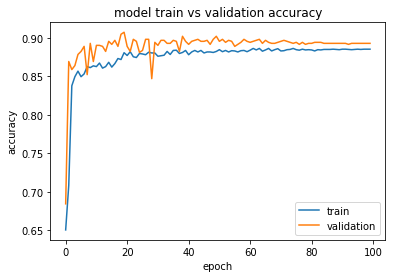

-------------------------------------------
Validate LSTM Course FFF - 2 Target Classes
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.85      0.80      0.82       241
          1       0.91      0.94      0.92       523

avg / total       0.89      0.89      0.89       764

Accuracy score: 0.892670157068
-------------------------------------------
Test LSTM Course FFF - 2 Target Classes
-------------------------------------------
Confusion Matrix for LSTM predictions:
[[ 293   94]
 [  63 1054]]
-------------------------------------------
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.82      0.76      0.79       387
          1       0.92      0.94      0.93      1117

avg / total       0.89      0.90      0.89      1504

Accuracy score: 0.895611702128


In [47]:
# Split train & validation set
X_train, X_val, y_train, y_val = train_test_split(FFF_Train_Decile7, FFF_Train_Targets_1D, test_size=0.20, random_state=7)
X_train = X_train.astype('float32')
X_val = X_val.astype('float32')

FFF_model = Sequential()
FFF_model.add(Masking(mask_value=-1, input_shape =(FFF_Train_Decile7.shape[1],3) ))
FFF_model.add(LSTM(32, activation='sigmoid', return_sequences = True))
FFF_model.add(LSTM(32, activation='sigmoid', return_sequences = True))
FFF_model.add(LSTM(32, activation='sigmoid'))
FFF_model.add(Dense(1, activation='sigmoid'))

FFF_model.compile(optimizer=Adam(lr=0.005), loss='binary_crossentropy',metrics = ['accuracy'])
    
# Fit model for each timestep
ES = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=3, verbose=1, mode='auto')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5,
                              patience=10, verbose = 1, min_lr=0.000001, mode = "min", min_delta=0.001)
print('Fit LSTM Course FFF - 2 Target Classes')
    
history = FFF_model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1,
                       validation_data = (X_val, y_val), callbacks = [reduce_lr])

# plot train vs validation accuracy
pyplot.plot(history.history['acc'])
pyplot.plot(history.history['val_acc'])
pyplot.title('model train vs validation accuracy')
pyplot.ylabel('accuracy')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='lower right')
pyplot.show()
    
# Validate model
y_pred_FFF_val = FFF_model.predict(X_val)
y_classes_FFF_val = np.round(y_pred_FFF_val)
    
print('-------------------------------------------')
print('Validate LSTM Course FFF - 2 Target Classes')
print('Classification Report for LSTM predictions:')
print('-------------------------------------------')
print(classification_report(y_pred=y_classes_FFF_val, y_true=y_val))
print("Accuracy score: " + str(accuracy_score(y_pred=y_classes_FFF_val, y_true=y_val)))


# Test model
y_pred_FFF = FFF_model.predict(FFF_Test_Decile7)
y_classes_FFF = np.round(y_pred_FFF)
    
print('-------------------------------------------')
print('Test LSTM Course FFF - 2 Target Classes')
print('-------------------------------------------')
print('Confusion Matrix for LSTM predictions:')
print(confusion_matrix(y_pred=y_classes_FFF, y_true=FFF_Test_Targets_1D))
print('-------------------------------------------')
print('Classification Report for LSTM predictions:')
print('-------------------------------------------')
print(classification_report(y_pred=y_classes_FFF, y_true=FFF_Test_Targets_1D))
print("Accuracy score: " + str(accuracy_score(y_pred=y_classes_FFF, y_true=FFF_Test_Targets_1D)))

### FFF Decile 8

Fit LSTM Course FFF - 2 Target Classes
Train on 3055 samples, validate on 764 samples
Epoch 1/100
3055/3055 [==============================] - 21s 7ms/step - loss: 0.6430 - acc: 0.6573 - val_loss: 0.5994 - val_acc: 0.6846
Epoch 2/100
3055/3055 [==============================] - 18s 6ms/step - loss: 0.6385 - acc: 0.6625 - val_loss: 0.6261 - val_acc: 0.6846
Epoch 3/100
3055/3055 [==============================] - 19s 6ms/step - loss: 0.6443 - acc: 0.6573 - val_loss: 0.6231 - val_acc: 0.6846
Epoch 4/100
3055/3055 [==============================] - 18s 6ms/step - loss: 0.6427 - acc: 0.6573 - val_loss: 0.6219 - val_acc: 0.6846
Epoch 5/100
3055/3055 [==============================] - 18s 6ms/step - loss: 0.6065 - acc: 0.6642 - val_loss: 0.5370 - val_acc: 0.7238
Epoch 6/100
3055/3055 [==============================] - 18s 6ms/step - loss: 0.3903 - acc: 0.8465 - val_loss: 0.3256 - val_acc: 0.8874
Epoch 7/100
3055/3055 [==============================] - 19s 6ms/step - loss: 0.3130 - acc: 0.8799

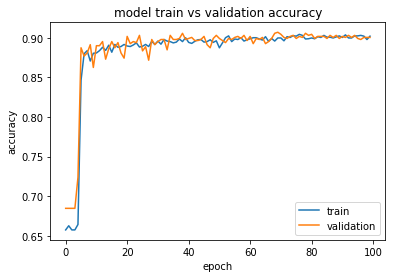

-------------------------------------------
Validate LSTM Course FFF - 2 Target Classes
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.87      0.80      0.84       241
          1       0.91      0.95      0.93       523

avg / total       0.90      0.90      0.90       764

Accuracy score: 0.900523560209
-------------------------------------------
Test LSTM Course FFF - 2 Target Classes
-------------------------------------------
Confusion Matrix for LSTM predictions:
[[329  58]
 [122 995]]
-------------------------------------------
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.73      0.85      0.79       387
          1       0.94      0.89      0.92      1117

avg / total       0.89      0.88      0.88      1504

Accuracy score: 0.880319148936


In [51]:
# Split train & validation set
X_train, X_val, y_train, y_val = train_test_split(FFF_Train_Decile8, FFF_Train_Targets_1D, test_size=0.20, random_state=7)
X_train = X_train.astype('float32')
X_val = X_val.astype('float32')

FFF_model = Sequential()
FFF_model.add(Masking(mask_value=-1, input_shape =(FFF_Train_Decile8.shape[1],3) ))
FFF_model.add(LSTM(32, activation='sigmoid', return_sequences = True))
FFF_model.add(LSTM(32, activation='sigmoid', return_sequences = True))
FFF_model.add(LSTM(32, activation='sigmoid'))
FFF_model.add(Dense(1, activation='sigmoid'))

FFF_model.compile(optimizer=Adam(lr=0.005), loss='binary_crossentropy',metrics = ['accuracy'])
    
# Fit model for each timestep
ES = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=3, verbose=1, mode='auto')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5,
                              patience=10, verbose = 1, min_lr=0.000001, mode = "min", min_delta=0.001)
print('Fit LSTM Course FFF - 2 Target Classes')
    
history = FFF_model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1,
                       validation_data = (X_val, y_val), callbacks = [reduce_lr])

# plot train vs validation accuracy
pyplot.plot(history.history['acc'])
pyplot.plot(history.history['val_acc'])
pyplot.title('model train vs validation accuracy')
pyplot.ylabel('accuracy')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='lower right')
pyplot.show()
    
# Validate model
y_pred_FFF_val = FFF_model.predict(X_val)
y_classes_FFF_val = np.round(y_pred_FFF_val)
    
print('-------------------------------------------')
print('Validate LSTM Course FFF - 2 Target Classes')
print('Classification Report for LSTM predictions:')
print('-------------------------------------------')
print(classification_report(y_pred=y_classes_FFF_val, y_true=y_val))
print("Accuracy score: " + str(accuracy_score(y_pred=y_classes_FFF_val, y_true=y_val)))


# Test model
y_pred_FFF = FFF_model.predict(FFF_Test_Decile8)
y_classes_FFF = np.round(y_pred_FFF)
    
print('-------------------------------------------')
print('Test LSTM Course FFF - 2 Target Classes')
print('-------------------------------------------')
print('Confusion Matrix for LSTM predictions:')
print(confusion_matrix(y_pred=y_classes_FFF, y_true=FFF_Test_Targets_1D))
print('-------------------------------------------')
print('Classification Report for LSTM predictions:')
print('-------------------------------------------')
print(classification_report(y_pred=y_classes_FFF, y_true=FFF_Test_Targets_1D))
print("Accuracy score: " + str(accuracy_score(y_pred=y_classes_FFF, y_true=FFF_Test_Targets_1D)))

### FFF Decile 9

Fit LSTM Course FFF - 2 Target Classes
Train on 3055 samples, validate on 764 samples
Epoch 1/100
3055/3055 [==============================] - 26s 8ms/step - loss: 0.6489 - acc: 0.6494 - val_loss: 0.6286 - val_acc: 0.6846
Epoch 2/100
3055/3055 [==============================] - 22s 7ms/step - loss: 0.5364 - acc: 0.7182 - val_loss: 0.3259 - val_acc: 0.8678
Epoch 3/100
3055/3055 [==============================] - 22s 7ms/step - loss: 0.3717 - acc: 0.8409 - val_loss: 0.3124 - val_acc: 0.8901
Epoch 4/100
3055/3055 [==============================] - 22s 7ms/step - loss: 0.3110 - acc: 0.8864 - val_loss: 0.2857 - val_acc: 0.8914
Epoch 5/100
3055/3055 [==============================] - 22s 7ms/step - loss: 0.2965 - acc: 0.8894 - val_loss: 0.3176 - val_acc: 0.8861
Epoch 6/100
3055/3055 [==============================] - 22s 7ms/step - loss: 0.3113 - acc: 0.8805 - val_loss: 0.2853 - val_acc: 0.8940
Epoch 7/100
3055/3055 [==============================] - 20s 7ms/step - loss: 0.2869 - acc: 0.8946

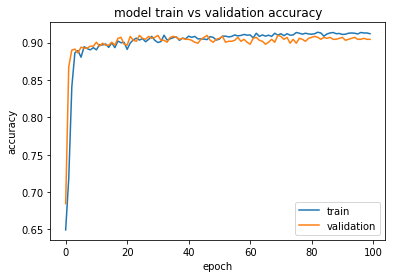

-------------------------------------------
Validate LSTM Course FFF - 2 Target Classes
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.87      0.82      0.84       241
          1       0.92      0.94      0.93       523

avg / total       0.90      0.90      0.90       764

Accuracy score: 0.90445026178
-------------------------------------------
Test LSTM Course FFF - 2 Target Classes
-------------------------------------------
Confusion Matrix for LSTM predictions:
[[ 316   71]
 [  43 1074]]
-------------------------------------------
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.88      0.82      0.85       387
          1       0.94      0.96      0.95      1117

avg / total       0.92      0.92      0.92      1504

Accuracy score: 0.92420212766


In [49]:
# Split train & validation set
X_train, X_val, y_train, y_val = train_test_split(FFF_Train_Decile9, FFF_Train_Targets_1D, test_size=0.20, random_state=7)
X_train = X_train.astype('float32')
X_val = X_val.astype('float32')

FFF_model = Sequential()
FFF_model.add(Masking(mask_value=-1, input_shape =(FFF_Train_Decile9.shape[1],3) ))
FFF_model.add(LSTM(32, activation='sigmoid', return_sequences = True))
FFF_model.add(LSTM(32, activation='sigmoid', return_sequences = True))
FFF_model.add(LSTM(32, activation='sigmoid'))
FFF_model.add(Dense(1, activation='sigmoid'))

FFF_model.compile(optimizer=Adam(lr=0.005), loss='binary_crossentropy',metrics = ['accuracy'])
    
# Fit model for each timestep
ES = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=3, verbose=1, mode='auto')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5,
                              patience=10, verbose = 1, min_lr=0.000001, mode = "min", min_delta=0.001)
print('Fit LSTM Course FFF - 2 Target Classes')
    
history = FFF_model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1,
                       validation_data = (X_val, y_val), callbacks = [reduce_lr])

# plot train vs validation accuracy
pyplot.plot(history.history['acc'])
pyplot.plot(history.history['val_acc'])
pyplot.title('model train vs validation accuracy')
pyplot.ylabel('accuracy')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='lower right')
pyplot.show()
    
# Validate model
y_pred_FFF_val = FFF_model.predict(X_val)
y_classes_FFF_val = np.round(y_pred_FFF_val)
    
print('-------------------------------------------')
print('Validate LSTM Course FFF - 2 Target Classes')
print('Classification Report for LSTM predictions:')
print('-------------------------------------------')
print(classification_report(y_pred=y_classes_FFF_val, y_true=y_val))
print("Accuracy score: " + str(accuracy_score(y_pred=y_classes_FFF_val, y_true=y_val)))


# Test model
y_pred_FFF = FFF_model.predict(FFF_Test_Decile9)
y_classes_FFF = np.round(y_pred_FFF)
    
print('-------------------------------------------')
print('Test LSTM Course FFF - 2 Target Classes')
print('-------------------------------------------')
print('Confusion Matrix for LSTM predictions:')
print(confusion_matrix(y_pred=y_classes_FFF, y_true=FFF_Test_Targets_1D))
print('-------------------------------------------')
print('Classification Report for LSTM predictions:')
print('-------------------------------------------')
print(classification_report(y_pred=y_classes_FFF, y_true=FFF_Test_Targets_1D))
print("Accuracy score: " + str(accuracy_score(y_pred=y_classes_FFF, y_true=FFF_Test_Targets_1D)))

### FFF Decile 10

Fit LSTM Course FFF - 2 Target Classes
Train on 3055 samples, validate on 764 samples
Epoch 1/70
3055/3055 [==============================] - 25s 8ms/step - loss: 0.6170 - acc: 0.6779 - val_loss: 0.3524 - val_acc: 0.8861
Epoch 2/70
3055/3055 [==============================] - 21s 7ms/step - loss: 0.4106 - acc: 0.8278 - val_loss: 0.5013 - val_acc: 0.7657
Epoch 3/70
3055/3055 [==============================] - 21s 7ms/step - loss: 0.3506 - acc: 0.8602 - val_loss: 0.2916 - val_acc: 0.8966
Epoch 4/70
3055/3055 [==============================] - 21s 7ms/step - loss: 0.3264 - acc: 0.8691 - val_loss: 0.3564 - val_acc: 0.8390
Epoch 5/70
3055/3055 [==============================] - 21s 7ms/step - loss: 0.3112 - acc: 0.8874 - val_loss: 0.2609 - val_acc: 0.8966
Epoch 6/70
3055/3055 [==============================] - 20s 6ms/step - loss: 0.3062 - acc: 0.8884 - val_loss: 0.4970 - val_acc: 0.8154
Epoch 7/70
3055/3055 [==============================] - 21s 7ms/step - loss: 0.2879 - acc: 0.8972 - val_

3055/3055 [==============================] - 22s 7ms/step - loss: 0.1994 - acc: 0.9227 - val_loss: 0.2548 - val_acc: 0.9084
Epoch 61/70
3055/3055 [==============================] - 22s 7ms/step - loss: 0.1950 - acc: 0.9188 - val_loss: 0.2072 - val_acc: 0.9149
Epoch 62/70
3055/3055 [==============================] - 22s 7ms/step - loss: 0.1937 - acc: 0.9218 - val_loss: 0.1929 - val_acc: 0.9241
Epoch 63/70
3055/3055 [==============================] - 23s 8ms/step - loss: 0.1933 - acc: 0.9224 - val_loss: 0.1921 - val_acc: 0.9254
Epoch 64/70
3055/3055 [==============================] - 22s 7ms/step - loss: 0.1956 - acc: 0.9227 - val_loss: 0.2473 - val_acc: 0.8809

Epoch 00064: ReduceLROnPlateau reducing learning rate to 0.0012499999720603228.
Epoch 65/70
3055/3055 [==============================] - 24s 8ms/step - loss: 0.1873 - acc: 0.9277 - val_loss: 0.2110 - val_acc: 0.9136
Epoch 66/70
3055/3055 [==============================] - 22s 7ms/step - loss: 0.1858 - acc: 0.9247 - val_loss: 0.19

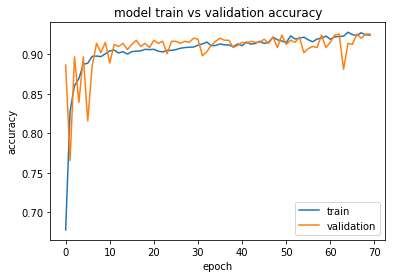

-------------------------------------------
Validate LSTM Course FFF - 2 Target Classes
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.95      0.80      0.87       241
          1       0.92      0.98      0.95       523

avg / total       0.93      0.93      0.92       764

Accuracy score: 0.925392670157
-------------------------------------------
Test LSTM Course FFF - 2 Target Classes
-------------------------------------------
Confusion Matrix for LSTM predictions:
[[ 304   83]
 [  11 1106]]
-------------------------------------------
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.97      0.79      0.87       387
          1       0.93      0.99      0.96      1117

avg / total       0.94      0.94      0.94      1504

Accuracy score: 0.9375


In [50]:
# Split train & validation set
X_train, X_val, y_train, y_val = train_test_split(FFF_Train_3D, FFF_Train_Targets_1D, test_size=0.20, random_state=7)
X_train = X_train.astype('float32')
X_val = X_val.astype('float32')

FFF_model = Sequential()
FFF_model.add(Masking(mask_value=-1, input_shape =(FFF_Train_Decile10.shape[1],3) ))
FFF_model.add(LSTM(32, activation='sigmoid', return_sequences = True))
FFF_model.add(LSTM(32, activation='sigmoid', return_sequences = True))
FFF_model.add(LSTM(32, activation='sigmoid'))
FFF_model.add(Dense(1, activation='sigmoid'))

FFF_model.compile(optimizer=RMSprop(lr=0.005), loss='binary_crossentropy',metrics = ['accuracy'])
    
# Fit model for each timestep
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5,
                              patience=10, verbose = 1, min_lr=0.00001, mode = "min", min_delta=0.001)
print('Fit LSTM Course FFF - 2 Target Classes')
    
history = FFF_model.fit(X_train, y_train, epochs=70, batch_size=32, verbose=1,
                       validation_data = (X_val, y_val), callbacks = [reduce_lr])

# plot train vs validation accuracy
pyplot.plot(history.history['acc'])
pyplot.plot(history.history['val_acc'])
pyplot.title('model train vs validation accuracy')
pyplot.ylabel('accuracy')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='lower right')
pyplot.show()
    
# Validate model
y_pred_FFF_val = FFF_model.predict(X_val)
y_classes_FFF_val = np.round(y_pred_FFF_val)
    
print('-------------------------------------------')
print('Validate LSTM Course FFF - 2 Target Classes')
print('Classification Report for LSTM predictions:')
print('-------------------------------------------')
print(classification_report(y_pred=y_classes_FFF_val, y_true=y_val))
print("Accuracy score: " + str(accuracy_score(y_pred=y_classes_FFF_val, y_true=y_val)))


# Test model
y_pred_FFF = FFF_model.predict(FFF_Test_3D)
y_classes_FFF = np.round(y_pred_FFF)
    
print('-------------------------------------------')
print('Test LSTM Course FFF - 2 Target Classes')
print('-------------------------------------------')
print('Confusion Matrix for LSTM predictions:')
print(confusion_matrix(y_pred=y_classes_FFF, y_true=FFF_Test_Targets_1D))

print('-------------------------------------------')
print('Classification Report for LSTM predictions:')
print('-------------------------------------------')
print(classification_report(y_pred=y_classes_FFF, y_true=FFF_Test_Targets_1D))
print("Accuracy score: " + str(accuracy_score(y_pred=y_classes_FFF, y_true=FFF_Test_Targets_1D)))

## LSTM Course BBB

Fit LSTM Course BBB - 2 Target Classes
Train on 3708 samples, validate on 1490 samples
Epoch 1/300
3708/3708 [==============================] - 42s 11ms/step - loss: 0.7103 - acc: 0.2983 - val_loss: 0.7273 - val_acc: 0.2268
Epoch 2/300
3708/3708 [==============================] - 41s 11ms/step - loss: 0.7028 - acc: 0.3050 - val_loss: 0.7154 - val_acc: 0.2268
Epoch 3/300
3708/3708 [==============================] - 39s 11ms/step - loss: 0.6961 - acc: 0.4029 - val_loss: 0.7046 - val_acc: 0.2403
Epoch 4/300
3708/3708 [==============================] - 39s 11ms/step - loss: 0.6899 - acc: 0.6033 - val_loss: 0.6944 - val_acc: 0.4819
Epoch 5/300
3708/3708 [==============================] - 39s 11ms/step - loss: 0.6842 - acc: 0.6855 - val_loss: 0.6844 - val_acc: 0.7242
Epoch 6/300
3708/3708 [==============================] - 39s 11ms/step - loss: 0.6783 - acc: 0.7017 - val_loss: 0.6741 - val_acc: 0.7611
Epoch 7/300
3708/3708 [==============================] - 39s 11ms/step - loss: 0.6723 - acc

Epoch 60/300
3708/3708 [==============================] - 37s 10ms/step - loss: 0.4294 - acc: 0.7996 - val_loss: 0.5921 - val_acc: 0.6208
Epoch 61/300
3708/3708 [==============================] - 37s 10ms/step - loss: 0.4259 - acc: 0.7991 - val_loss: 0.5904 - val_acc: 0.6242
Epoch 62/300
3708/3708 [==============================] - 37s 10ms/step - loss: 0.4236 - acc: 0.8034 - val_loss: 0.5902 - val_acc: 0.6282
Epoch 63/300
3708/3708 [==============================] - 38s 10ms/step - loss: 0.4209 - acc: 0.8064 - val_loss: 0.5884 - val_acc: 0.6329
Epoch 64/300
3708/3708 [==============================] - 38s 10ms/step - loss: 0.4179 - acc: 0.8088 - val_loss: 0.5762 - val_acc: 0.6463
Epoch 65/300
3708/3708 [==============================] - 38s 10ms/step - loss: 0.4166 - acc: 0.8085 - val_loss: 0.5918 - val_acc: 0.6289
Epoch 66/300
3708/3708 [==============================] - 38s 10ms/step - loss: 0.4143 - acc: 0.8099 - val_loss: 0.5928 - val_acc: 0.6302
Epoch 67/300
3708/3708 [==========

3708/3708 [==============================] - 39s 11ms/step - loss: 0.2884 - acc: 0.8897 - val_loss: 0.3670 - val_acc: 0.8611
Epoch 179/300
3708/3708 [==============================] - 39s 11ms/step - loss: 0.2882 - acc: 0.8910 - val_loss: 0.3745 - val_acc: 0.8584
Epoch 180/300
3708/3708 [==============================] - 39s 11ms/step - loss: 0.2882 - acc: 0.8916 - val_loss: 0.3688 - val_acc: 0.8604
Epoch 181/300
3708/3708 [==============================] - 39s 11ms/step - loss: 0.2875 - acc: 0.8905 - val_loss: 0.3917 - val_acc: 0.8517
Epoch 182/300
3708/3708 [==============================] - 39s 11ms/step - loss: 0.2870 - acc: 0.8913 - val_loss: 0.3652 - val_acc: 0.8611
Epoch 183/300
3708/3708 [==============================] - 39s 11ms/step - loss: 0.2871 - acc: 0.8910 - val_loss: 0.3833 - val_acc: 0.8544
Epoch 184/300
3708/3708 [==============================] - 39s 11ms/step - loss: 0.2867 - acc: 0.8913 - val_loss: 0.3720 - val_acc: 0.8597
Epoch 185/300
3708/3708 [================

3708/3708 [==============================] - 39s 10ms/step - loss: 0.2771 - acc: 0.8948 - val_loss: 0.3740 - val_acc: 0.8517
Epoch 238/300
3708/3708 [==============================] - 39s 10ms/step - loss: 0.2778 - acc: 0.8959 - val_loss: 0.4061 - val_acc: 0.8383
Epoch 239/300
3708/3708 [==============================] - 39s 10ms/step - loss: 0.2763 - acc: 0.8962 - val_loss: 0.3624 - val_acc: 0.8591
Epoch 240/300
3708/3708 [==============================] - 39s 11ms/step - loss: 0.2772 - acc: 0.8959 - val_loss: 0.3922 - val_acc: 0.8416
Epoch 241/300
3708/3708 [==============================] - 39s 11ms/step - loss: 0.2770 - acc: 0.8967 - val_loss: 0.3896 - val_acc: 0.8423
Epoch 242/300
3708/3708 [==============================] - 39s 11ms/step - loss: 0.2757 - acc: 0.8943 - val_loss: 0.3490 - val_acc: 0.8591
Epoch 243/300
3708/3708 [==============================] - 39s 11ms/step - loss: 0.2773 - acc: 0.8935 - val_loss: 0.3746 - val_acc: 0.8477
Epoch 244/300
3708/3708 [================

3708/3708 [==============================] - 39s 11ms/step - loss: 0.2688 - acc: 0.8970 - val_loss: 0.3760 - val_acc: 0.8416
Epoch 297/300
3708/3708 [==============================] - 40s 11ms/step - loss: 0.2695 - acc: 0.8972 - val_loss: 0.3906 - val_acc: 0.8416
Epoch 298/300
3708/3708 [==============================] - 41s 11ms/step - loss: 0.2683 - acc: 0.8970 - val_loss: 0.3741 - val_acc: 0.8430
Epoch 299/300
3708/3708 [==============================] - 39s 11ms/step - loss: 0.2691 - acc: 0.8970 - val_loss: 0.3788 - val_acc: 0.8423
Epoch 300/300
3708/3708 [==============================] - 39s 11ms/step - loss: 0.2688 - acc: 0.8978 - val_loss: 0.3786 - val_acc: 0.8423


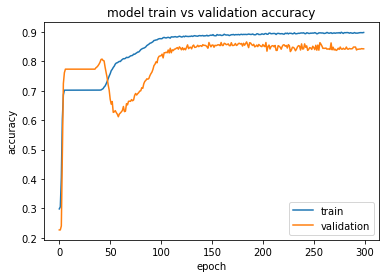

-------------------------------------------
Test LSTM Course BBB - 2 Target Classes
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.61      0.83      0.70       338
          1       0.94      0.85      0.89      1152

avg / total       0.87      0.84      0.85      1490

Accuracy score: 0.842281879195


In [44]:

LSTM_input = Input(shape=(293,3), name='LSTM_input')
Mask = Masking(mask_value=-1)(LSTM_input)
LSTM_hidden1 = LSTM(32,return_sequences=True)(Mask)
LSTM_hidden2 = LSTM(32,return_sequences=True)(LSTM_hidden1)
LSTM_hidden3 = LSTM(32,return_sequences=True)(LSTM_hidden2)
#LSTM_hidden4 = LSTM(32,return_sequences=True)(LSTM_hidden3)
LSTM_out = LSTM(32)(LSTM_hidden3)

auxiliary_input = Input(shape=(29,), name='aux_input')
auxiliary_layer = Dense(64, activation='relu')(auxiliary_input)
auxiliary_output = Dense(32, activation='relu')(auxiliary_layer)

x = keras.layers.concatenate([LSTM_out, auxiliary_output])


x = Dense(64, activation='relu')(x)
x = Dense(64, activation='relu')(x)
x = Dense(64, activation='relu')(x)

main_output = Dense(1, activation='sigmoid', name='main_output')(x)

BBB_model = Model(inputs=[LSTM_input, auxiliary_input], outputs=main_output)
BBB_model.compile(optimizer=RMSprop(lr=0.000007), loss='binary_crossentropy',metrics = ['accuracy'])
    
    # Fit model for each timestep
ES = keras.callbacks.EarlyStopping(monitor='loss', min_delta=0, patience=0, verbose=0, mode='auto')
print('Fit LSTM Course BBB - 2 Target Classes')
    
history = BBB_model.fit([BBB_Train_3D,BBB_AUX_Train], BBB_Train_Targets_1D, epochs=300, batch_size=32, verbose=1,
                       validation_data = ([BBB_Test_3D, BBB_AUX_Test], BBB_Test_Targets_1D))

# plot train vs validation accuracy
pyplot.plot(history.history['acc'])
pyplot.plot(history.history['val_acc'])
pyplot.title('model train vs validation accuracy')
pyplot.ylabel('accuracy')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='lower right')
pyplot.show()
    
    # Test model for each timestep
y_pred_BBB = BBB_model.predict([BBB_Test_3D, BBB_AUX_Test])
y_classes_BBB = np.round(y_pred_BBB)
    
print('-------------------------------------------')
print('Test LSTM Course BBB - 2 Target Classes')
print('Classification Report for LSTM predictions:')
print('-------------------------------------------')
print(classification_report(y_pred=y_classes_BBB, y_true=BBB_Test_Targets_1D))
print("Accuracy score: " + str(accuracy_score(y_pred=y_classes_BBB, y_true=BBB_Test_Targets_1D)))

Fit LSTM Course DDD - 2 Target Classes
Train on 2687 samples, validate on 1121 samples
Epoch 1/300
2687/2687 [==============================] - 29s 11ms/step - loss: 0.6983 - acc: 0.3796 - val_loss: 0.6956 - val_acc: 0.4630
Epoch 2/300
2687/2687 [==============================] - 28s 10ms/step - loss: 0.6928 - acc: 0.4968 - val_loss: 0.6893 - val_acc: 0.5968
Epoch 3/300
2687/2687 [==============================] - 28s 10ms/step - loss: 0.6871 - acc: 0.6357 - val_loss: 0.6831 - val_acc: 0.6744
Epoch 4/300
2687/2687 [==============================] - 27s 10ms/step - loss: 0.6817 - acc: 0.6758 - val_loss: 0.6771 - val_acc: 0.7065
Epoch 5/300
2687/2687 [==============================] - 27s 10ms/step - loss: 0.6766 - acc: 0.6766 - val_loss: 0.6715 - val_acc: 0.7065
Epoch 6/300
2687/2687 [==============================] - 27s 10ms/step - loss: 0.6714 - acc: 0.6766 - val_loss: 0.6660 - val_acc: 0.7065
Epoch 7/300
2687/2687 [==============================] - 27s 10ms/step - loss: 0.6661 - acc

Epoch 60/300
2687/2687 [==============================] - 28s 10ms/step - loss: 0.3896 - acc: 0.8504 - val_loss: 0.3721 - val_acc: 0.8394
Epoch 61/300
2687/2687 [==============================] - 27s 10ms/step - loss: 0.3872 - acc: 0.8485 - val_loss: 0.3704 - val_acc: 0.8394
Epoch 62/300
2687/2687 [==============================] - 27s 10ms/step - loss: 0.3848 - acc: 0.8523 - val_loss: 0.3685 - val_acc: 0.8403
Epoch 63/300
2687/2687 [==============================] - 27s 10ms/step - loss: 0.3826 - acc: 0.8508 - val_loss: 0.3669 - val_acc: 0.8412
Epoch 64/300
2687/2687 [==============================] - 27s 10ms/step - loss: 0.3806 - acc: 0.8493 - val_loss: 0.3656 - val_acc: 0.8403
Epoch 65/300
2687/2687 [==============================] - 27s 10ms/step - loss: 0.3785 - acc: 0.8515 - val_loss: 0.3645 - val_acc: 0.8412
Epoch 66/300
2687/2687 [==============================] - 27s 10ms/step - loss: 0.3767 - acc: 0.8523 - val_loss: 0.3631 - val_acc: 0.8448
Epoch 67/300
2687/2687 [==========

2687/2687 [==============================] - 28s 10ms/step - loss: 0.2635 - acc: 0.8895 - val_loss: 0.3102 - val_acc: 0.8680
Epoch 179/300
2687/2687 [==============================] - 28s 10ms/step - loss: 0.2631 - acc: 0.8884 - val_loss: 0.3096 - val_acc: 0.8698
Epoch 180/300
2687/2687 [==============================] - 28s 10ms/step - loss: 0.2627 - acc: 0.8880 - val_loss: 0.3099 - val_acc: 0.8671
Epoch 181/300
2687/2687 [==============================] - 28s 10ms/step - loss: 0.2622 - acc: 0.8872 - val_loss: 0.3122 - val_acc: 0.8689
Epoch 182/300
2687/2687 [==============================] - 28s 11ms/step - loss: 0.2625 - acc: 0.8876 - val_loss: 0.3122 - val_acc: 0.8662
Epoch 183/300
2687/2687 [==============================] - 28s 10ms/step - loss: 0.2620 - acc: 0.8887 - val_loss: 0.3131 - val_acc: 0.8680
Epoch 184/300
2687/2687 [==============================] - 28s 11ms/step - loss: 0.2614 - acc: 0.8884 - val_loss: 0.3111 - val_acc: 0.8671
Epoch 185/300
2687/2687 [================

2687/2687 [==============================] - 28s 10ms/step - loss: 0.2513 - acc: 0.8895 - val_loss: 0.3165 - val_acc: 0.8715
Epoch 238/300
2687/2687 [==============================] - 28s 10ms/step - loss: 0.2503 - acc: 0.8884 - val_loss: 0.3145 - val_acc: 0.8680
Epoch 239/300
2687/2687 [==============================] - 28s 10ms/step - loss: 0.2500 - acc: 0.8887 - val_loss: 0.3160 - val_acc: 0.8715
Epoch 240/300
2687/2687 [==============================] - 29s 11ms/step - loss: 0.2497 - acc: 0.8884 - val_loss: 0.3142 - val_acc: 0.8671
Epoch 241/300
2687/2687 [==============================] - 28s 10ms/step - loss: 0.2498 - acc: 0.8887 - val_loss: 0.3224 - val_acc: 0.8671
Epoch 242/300
2687/2687 [==============================] - 28s 10ms/step - loss: 0.2496 - acc: 0.8910 - val_loss: 0.3152 - val_acc: 0.8715
Epoch 243/300
2687/2687 [==============================] - 28s 10ms/step - loss: 0.2494 - acc: 0.8891 - val_loss: 0.3223 - val_acc: 0.8671
Epoch 244/300
2687/2687 [================

2687/2687 [==============================] - 28s 10ms/step - loss: 0.2433 - acc: 0.8898 - val_loss: 0.3175 - val_acc: 0.8698
Epoch 297/300
2687/2687 [==============================] - 28s 10ms/step - loss: 0.2437 - acc: 0.8910 - val_loss: 0.3233 - val_acc: 0.8707
Epoch 298/300
2687/2687 [==============================] - 28s 10ms/step - loss: 0.2437 - acc: 0.8910 - val_loss: 0.3178 - val_acc: 0.8724
Epoch 299/300
2687/2687 [==============================] - 28s 10ms/step - loss: 0.2431 - acc: 0.8906 - val_loss: 0.3196 - val_acc: 0.8724
Epoch 300/300
2687/2687 [==============================] - 28s 10ms/step - loss: 0.2431 - acc: 0.8910 - val_loss: 0.3145 - val_acc: 0.8715


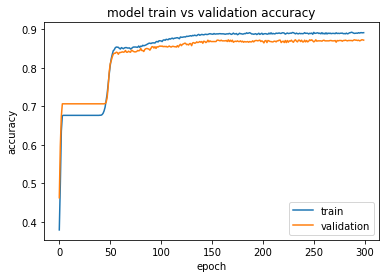

-------------------------------------------
Test LSTM Course DDD - 2 Target Classes
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.91      0.62      0.74       329
          1       0.86      0.97      0.91       792

avg / total       0.88      0.87      0.86      1121

Accuracy score: 0.871543264942


In [45]:

LSTM_input = Input(shape=(293,3), name='LSTM_input')
Mask = Masking(mask_value=-1)(LSTM_input)
LSTM_hidden1 = LSTM(32,return_sequences=True)(Mask)
LSTM_hidden2 = LSTM(32,return_sequences=True)(LSTM_hidden1)
LSTM_hidden3 = LSTM(32,return_sequences=True)(LSTM_hidden2)
#LSTM_hidden4 = LSTM(32,return_sequences=True)(LSTM_hidden3)
LSTM_out = LSTM(32)(LSTM_hidden3)

auxiliary_input = Input(shape=(29,), name='aux_input')
auxiliary_layer = Dense(64, activation='relu')(auxiliary_input)
auxiliary_output = Dense(32, activation='relu')(auxiliary_layer)

x = keras.layers.concatenate([LSTM_out, auxiliary_output])


x = Dense(64, activation='relu')(x)
x = Dense(64, activation='relu')(x)
x = Dense(64, activation='relu')(x)

main_output = Dense(1, activation='sigmoid', name='main_output')(x)

DDD_model = Model(inputs=[LSTM_input, auxiliary_input], outputs=main_output)
DDD_model.compile(optimizer=RMSprop(lr=0.000007), loss='binary_crossentropy',metrics = ['accuracy'])
    
    # Fit model for each timestep
ES = keras.callbacks.EarlyStopping(monitor='loss', min_delta=0, patience=0, verbose=0, mode='auto')
print('Fit LSTM Course DDD - 2 Target Classes')
    
history = DDD_model.fit([DDD_Train_3D,DDD_AUX_Train], DDD_Train_Targets_1D, epochs=300, batch_size=32, verbose=1,
                       validation_data = ([DDD_Test_3D, DDD_AUX_Test], DDD_Test_Targets_1D))

# plot train vs validation accuracy
pyplot.plot(history.history['acc'])
pyplot.plot(history.history['val_acc'])
pyplot.title('model train vs validation accuracy')
pyplot.ylabel('accuracy')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='lower right')
pyplot.show()
    
    # Test model for each timestep
y_pred_DDD = DDD_model.predict([DDD_Test_3D, DDD_AUX_Test])
y_classes_DDD = np.round(y_pred_DDD)
    
print('-------------------------------------------')
print('Test LSTM Course DDD - 2 Target Classes')
print('Classification Report for LSTM predictions:')
print('-------------------------------------------')
print(classification_report(y_pred=y_classes_DDD, y_true=DDD_Test_Targets_1D))
print("Accuracy score: " + str(accuracy_score(y_pred=y_classes_DDD, y_true=DDD_Test_Targets_1D)))
    

In [48]:

LSTM_input = Input(shape=(293,3), name='LSTM_input')
Mask = Masking(mask_value=-1)(LSTM_input)
LSTM_hidden1 = LSTM(32,return_sequences=True)(Mask)
LSTM_hidden2 = LSTM(32,return_sequences=True)(LSTM_hidden1)
LSTM_hidden3 = LSTM(32,return_sequences=True)(LSTM_hidden2)
#LSTM_hidden4 = LSTM(32,return_sequences=True)(LSTM_hidden3)
LSTM_out = LSTM(32)(LSTM_hidden3)

auxiliary_input = Input(shape=(29,), name='aux_input')
auxiliary_layer = Dense(64, activation='relu')(auxiliary_input)
auxiliary_output = Dense(32, activation='relu')(auxiliary_layer)

x = keras.layers.concatenate([LSTM_out, auxiliary_output])


x = Dense(64, activation='relu')(x)
x = Dense(64, activation='relu')(x)
x = Dense(64, activation='relu')(x)

main_output = Dense(1, activation='sigmoid', name='main_output')(x)

FFF_model = Model(inputs=[LSTM_input, auxiliary_input], outputs=main_output)
FFF_model.compile(optimizer=RMSprop(lr=0.000005), loss='binary_crossentropy',metrics = ['accuracy'])
    
    # Fit model for each timestep
ES = keras.callbacks.EarlyStopping(monitor='loss', min_delta=0, patience=3, verbose=0, mode='auto')
print('Fit LSTM Course FFF - 2 Target Classes')
    
history = FFF_model.fit([FFF_Train_3D,FFF_AUX_Train], FFF_Train_Targets_1D, epochs=300, batch_size=32, verbose=1,
                       validation_data = ([FFF_Test_3D, FFF_AUX_Test], FFF_Test_Targets_1D))

# plot train vs validation accuracy
pyplot.plot(history.history['acc'])
pyplot.plot(history.history['val_acc'])
pyplot.title('model train vs validation accuracy')
pyplot.ylabel('accuracy')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='lower right')
pyplot.show()
    
    # Test model for each timestep
y_pred_FFF = FFF_model.predict([FFF_Test_3D, FFF_AUX_Test])
y_classes_FFF = np.round(y_pred_FFF)
    
print('-------------------------------------------')
print('Test LSTM Course FFF - 2 Target Classes')
print('Classification Report for LSTM predictions:')
print('-------------------------------------------')
print(classification_report(y_pred=y_classes_FFF, y_true=FFF_Test_Targets_1D))
print("Accuracy score: " + str(accuracy_score(y_pred=y_classes_FFF, y_true=FFF_Test_Targets_1D)))
    

Fit LSTM Course FFF - 2 Target Classes
Train on 3659 samples, validate on 1466 samples
Epoch 1/300
3659/3659 [==============================] - 43s 12ms/step - loss: 0.6965 - acc: 0.4026 - val_loss: 0.6949 - val_acc: 0.4188
Epoch 2/300
3659/3659 [==============================] - 39s 11ms/step - loss: 0.6958 - acc: 0.4250 - val_loss: 0.6940 - val_acc: 0.4570
Epoch 3/300
3659/3659 [==============================] - 38s 10ms/step - loss: 0.6950 - acc: 0.4523 - val_loss: 0.6931 - val_acc: 0.4986
Epoch 4/300
3659/3659 [==============================] - 38s 10ms/step - loss: 0.6943 - acc: 0.4816 - val_loss: 0.6923 - val_acc: 0.5334
Epoch 5/300
3659/3659 [==============================] - 40s 11ms/step - loss: 0.6936 - acc: 0.4960 - val_loss: 0.6914 - val_acc: 0.5723
Epoch 6/300
3659/3659 [==============================] - 39s 11ms/step - loss: 0.6928 - acc: 0.5141 - val_loss: 0.6905 - val_acc: 0.6085
Epoch 7/300
3659/3659 [==============================] - 40s 11ms/step - loss: 0.6921 - acc

Epoch 60/300
3659/3659 [==============================] - 38s 10ms/step - loss: 0.6420 - acc: 0.6917 - val_loss: 0.6208 - val_acc: 0.7619
Epoch 61/300
3659/3659 [==============================] - 38s 10ms/step - loss: 0.6407 - acc: 0.6917 - val_loss: 0.6188 - val_acc: 0.7619
Epoch 62/300
3659/3659 [==============================] - 38s 10ms/step - loss: 0.6395 - acc: 0.6917 - val_loss: 0.6169 - val_acc: 0.7619
Epoch 63/300
3659/3659 [==============================] - 38s 10ms/step - loss: 0.6382 - acc: 0.6917 - val_loss: 0.6150 - val_acc: 0.7619
Epoch 64/300
3659/3659 [==============================] - 38s 10ms/step - loss: 0.6369 - acc: 0.6917 - val_loss: 0.6130 - val_acc: 0.7619
Epoch 65/300
3659/3659 [==============================] - 38s 10ms/step - loss: 0.6357 - acc: 0.6917 - val_loss: 0.6110 - val_acc: 0.7619
Epoch 66/300
3659/3659 [==============================] - 38s 10ms/step - loss: 0.6344 - acc: 0.6917 - val_loss: 0.6090 - val_acc: 0.7619
Epoch 67/300
3659/3659 [==========

KeyboardInterrupt: 